In [3]:
import torch
import torchvision.models as models

# Load the model
model_path = "../model/finetuned_BERT_epoch_2.model"
model = torch.load(model_path)

# Ensure the model is in evaluation mode
model.items()

odict_items([('bert.embeddings.word_embeddings.weight', tensor([[-0.0102, -0.0615, -0.0265,  ..., -0.0199, -0.0372, -0.0098],
        [-0.0117, -0.0600, -0.0323,  ..., -0.0168, -0.0401, -0.0107],
        [-0.0198, -0.0627, -0.0326,  ..., -0.0165, -0.0420, -0.0032],
        ...,
        [-0.0218, -0.0556, -0.0135,  ..., -0.0043, -0.0151, -0.0249],
        [-0.0462, -0.0565, -0.0019,  ...,  0.0157, -0.0139, -0.0095],
        [ 0.0025, -0.0822, -0.0159,  ..., -0.0091, -0.0476,  0.0742]],
       device='cuda:0')), ('bert.embeddings.position_embeddings.weight', tensor([[ 0.0187, -0.0257, -0.0361,  ..., -0.0021, -0.0025,  0.0164],
        [ 0.0052,  0.0021, -0.0199,  ...,  0.0255,  0.0301, -0.0049],
        [-0.0116, -0.0008, -0.0136,  ...,  0.0139,  0.0210, -0.0056],
        ...,
        [ 0.0174,  0.0035, -0.0096,  ...,  0.0030,  0.0004, -0.0269],
        [ 0.0217, -0.0060,  0.0147,  ..., -0.0056, -0.0126, -0.0281],
        [ 0.0026, -0.0233,  0.0055,  ...,  0.0175,  0.0275, -0.0777]],
   

In [7]:
model.keys()

odict_keys(['bert.embeddings.word_embeddings.weight', 'bert.embeddings.position_embeddings.weight', 'bert.embeddings.token_type_embeddings.weight', 'bert.embeddings.LayerNorm.weight', 'bert.embeddings.LayerNorm.bias', 'bert.encoder.layer.0.attention.self.query.weight', 'bert.encoder.layer.0.attention.self.query.bias', 'bert.encoder.layer.0.attention.self.key.weight', 'bert.encoder.layer.0.attention.self.key.bias', 'bert.encoder.layer.0.attention.self.value.weight', 'bert.encoder.layer.0.attention.self.value.bias', 'bert.encoder.layer.0.attention.output.dense.weight', 'bert.encoder.layer.0.attention.output.dense.bias', 'bert.encoder.layer.0.attention.output.LayerNorm.weight', 'bert.encoder.layer.0.attention.output.LayerNorm.bias', 'bert.encoder.layer.0.intermediate.dense.weight', 'bert.encoder.layer.0.intermediate.dense.bias', 'bert.encoder.layer.0.output.dense.weight', 'bert.encoder.layer.0.output.dense.bias', 'bert.encoder.layer.0.output.LayerNorm.weight', 'bert.encoder.layer.0.output

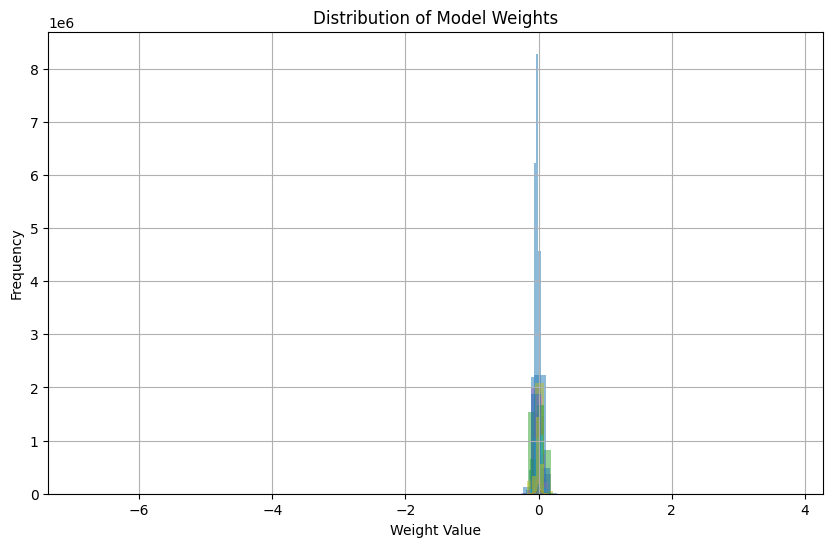

In [18]:
import matplotlib.pyplot as plt

# Extract weights for visualization
weights = [value.cpu().detach().numpy() for key, value in model.items() if 'weight' in key]

# Visualize weights distribution using a histogram
plt.figure(figsize=(10, 6))
for weight, (key, _) in zip(weights, model.items()):
    plt.hist(weight.flatten(), bins=50, alpha=0.5, label=key)
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.title('Distribution of Model Weights')
# plt.legend()
plt.grid(True)
plt.show()


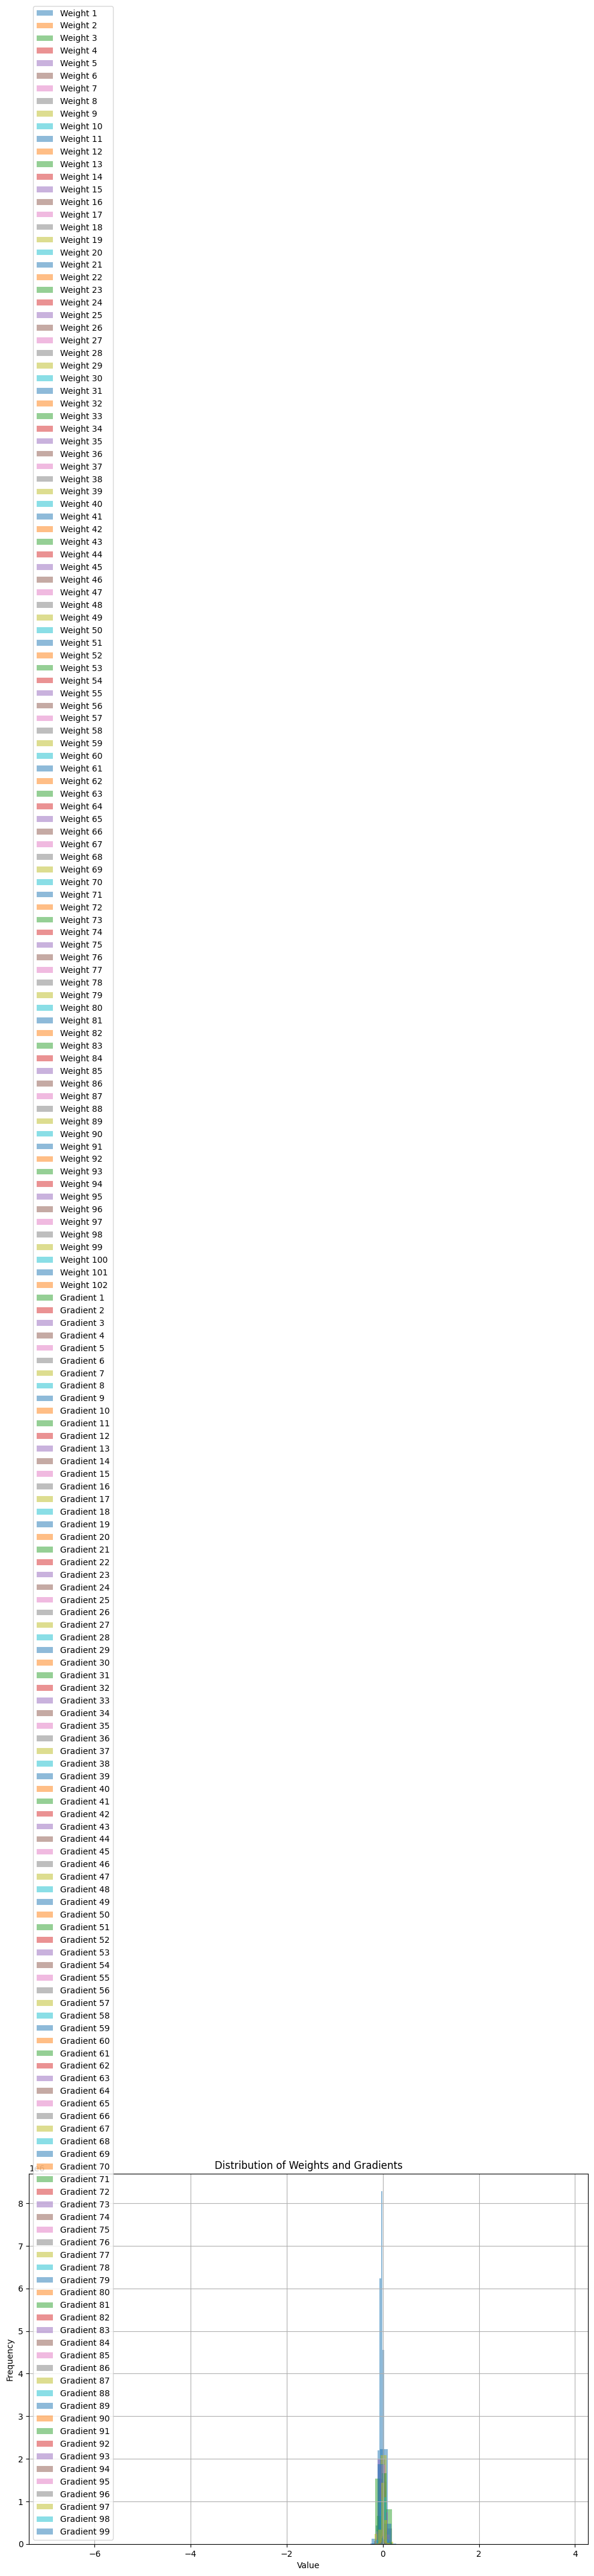

In [12]:
import matplotlib.pyplot as plt

# Function to plot histogram of weights or gradients
def plot_histogram(data, title, label):
    plt.hist(data.flatten(), bins=50, alpha=0.5, label=label)

# Extract weights and gradients for visualization
weights = []
gradients = []

for key, value in model.items():
    if 'weight' in key:
        weights.append(value.cpu().detach().numpy())
    elif 'bias' in key:
        gradients.append(value.cpu().detach().numpy())

# Create figure and axis
plt.figure(figsize=(12, 8))

# Plot histograms for weights
for i, weight in enumerate(weights):
    plot_histogram(weight, f'Distribution of Weights {i+1}', f'Weight {i+1}')

# Plot histograms for gradients
for i, gradient in enumerate(gradients):
    plot_histogram(gradient, f'Distribution of Gradients {i+1}', f'Gradient {i+1}')

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Weights and Gradients')
plt.legend()

# Display grid
plt.grid(True)

# Show plot
plt.show()


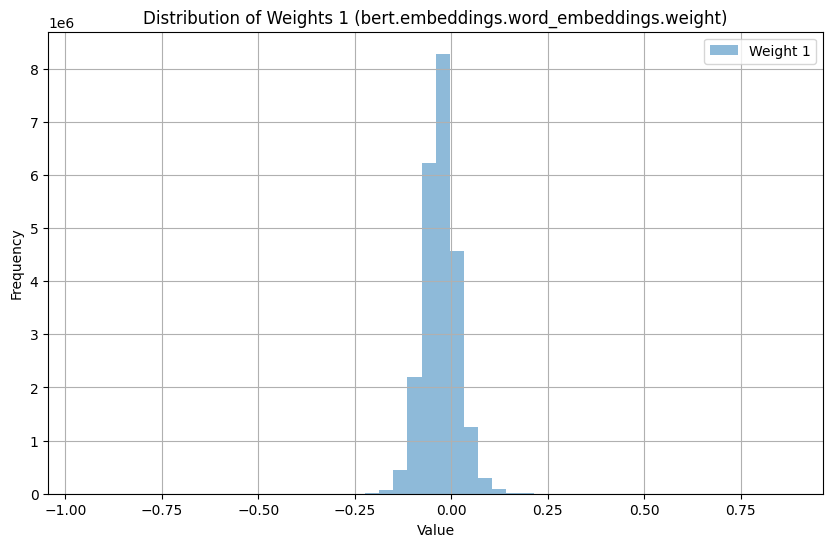

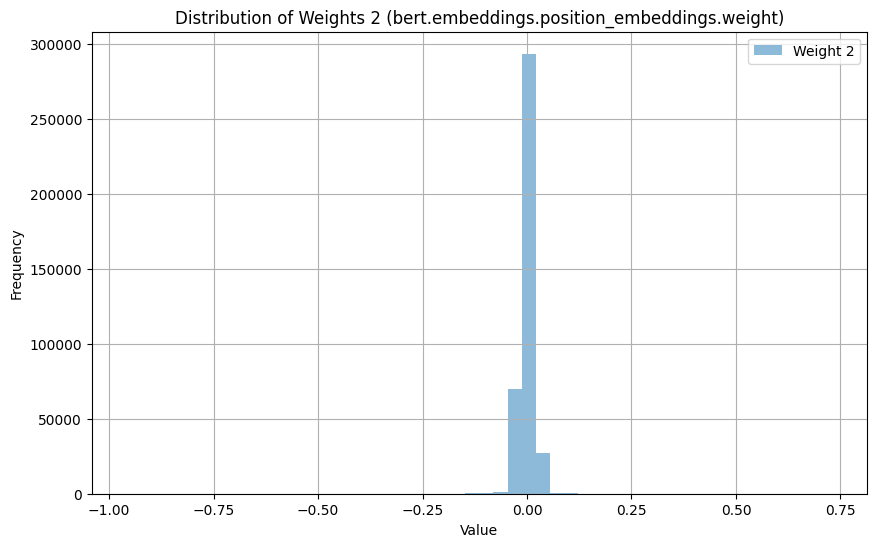

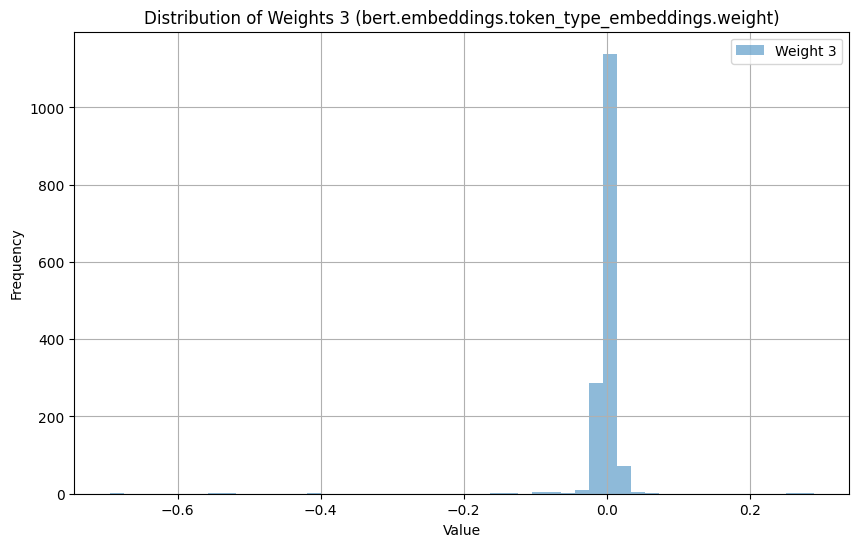

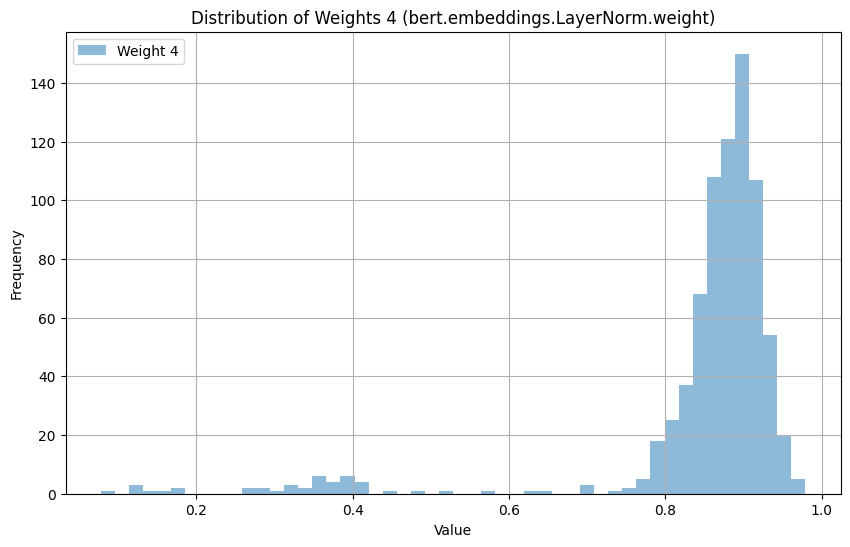

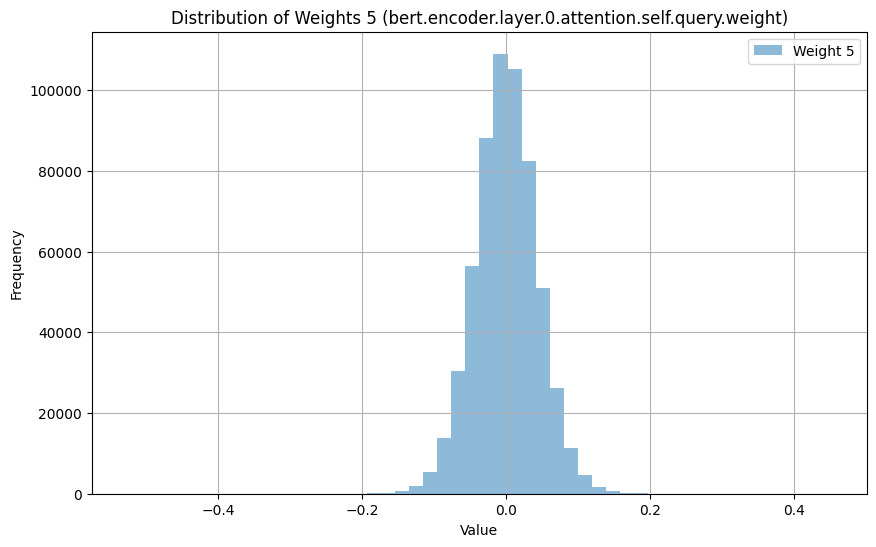

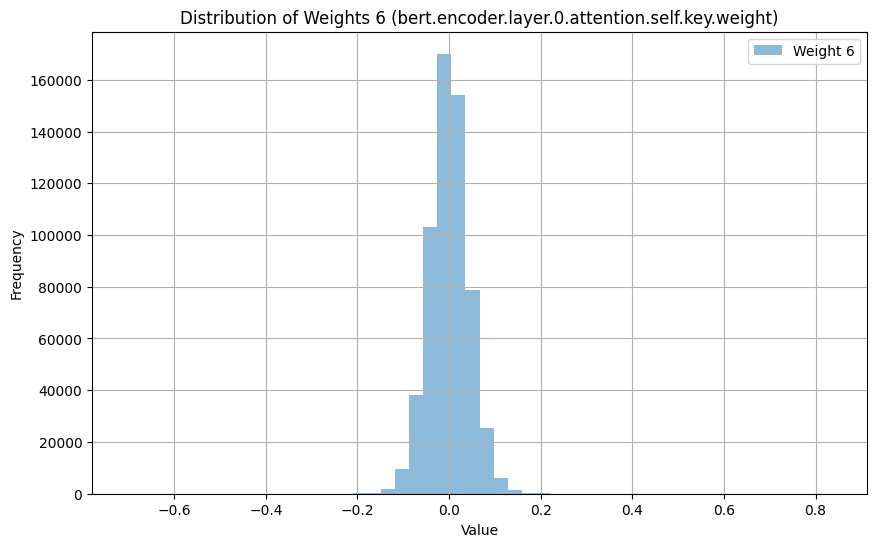

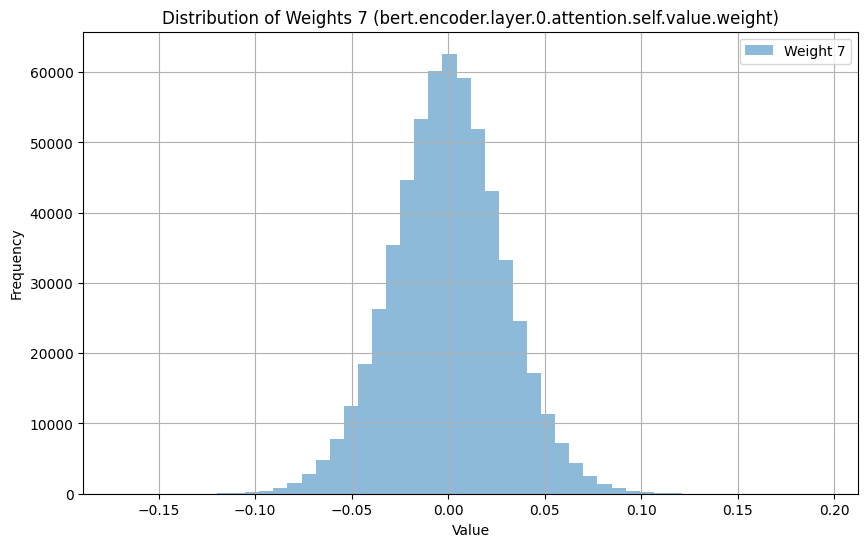

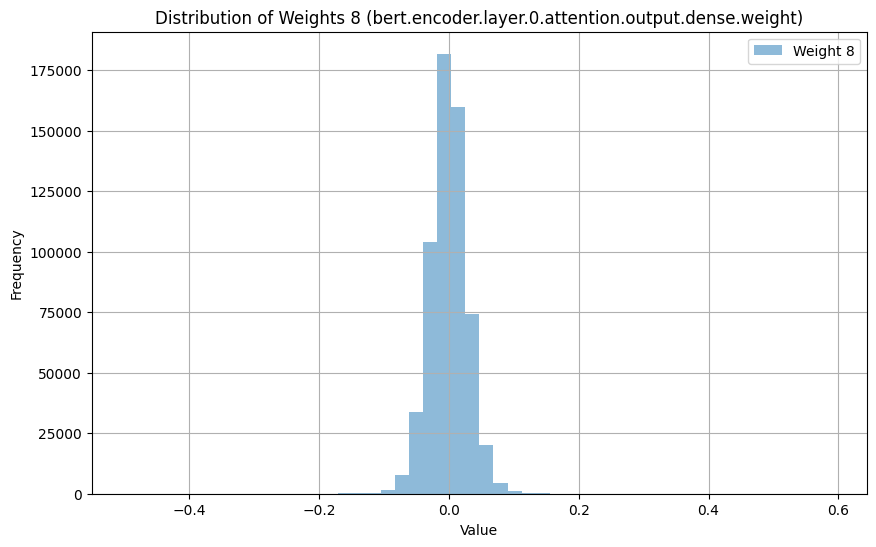

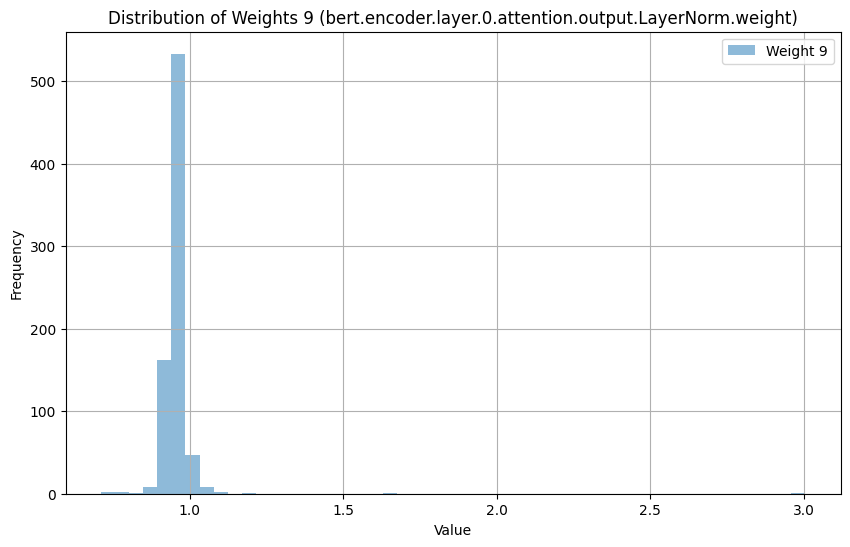

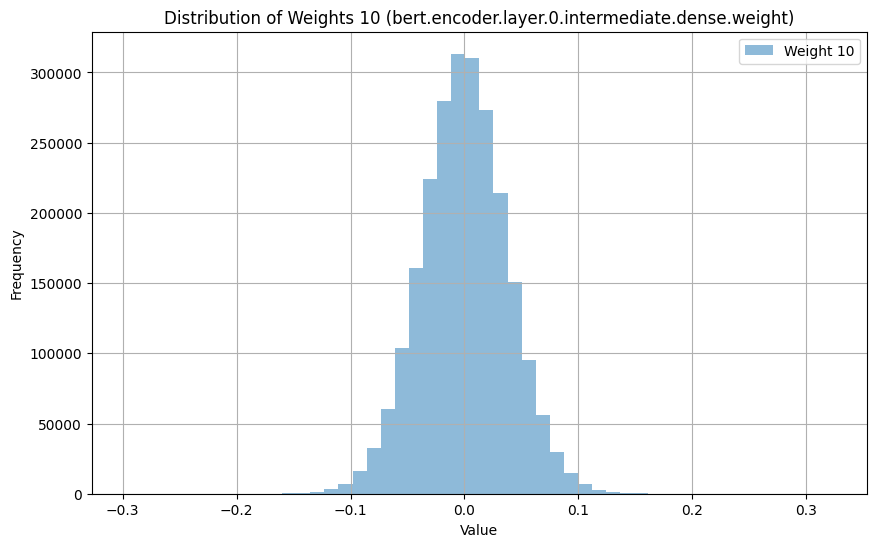

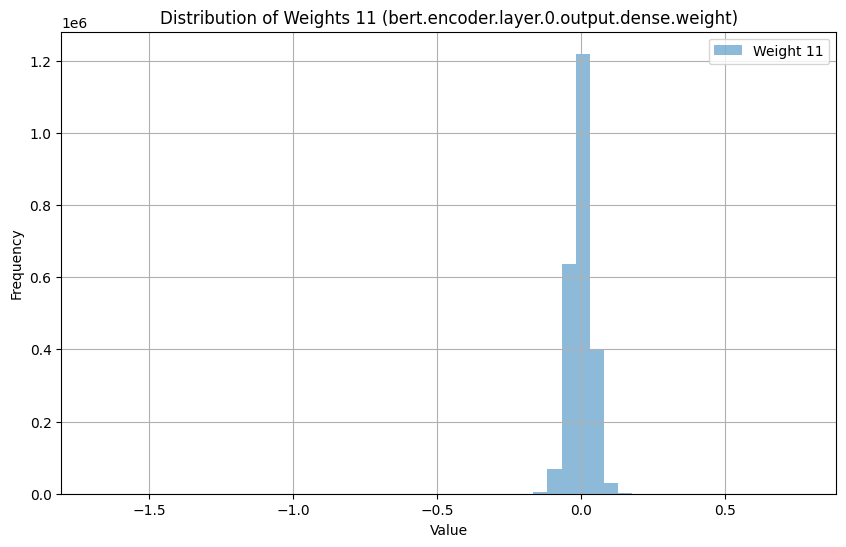

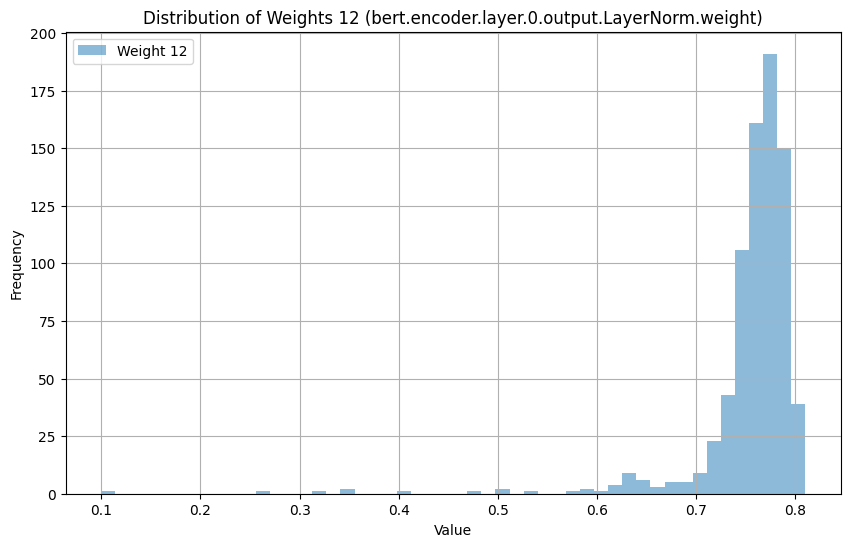

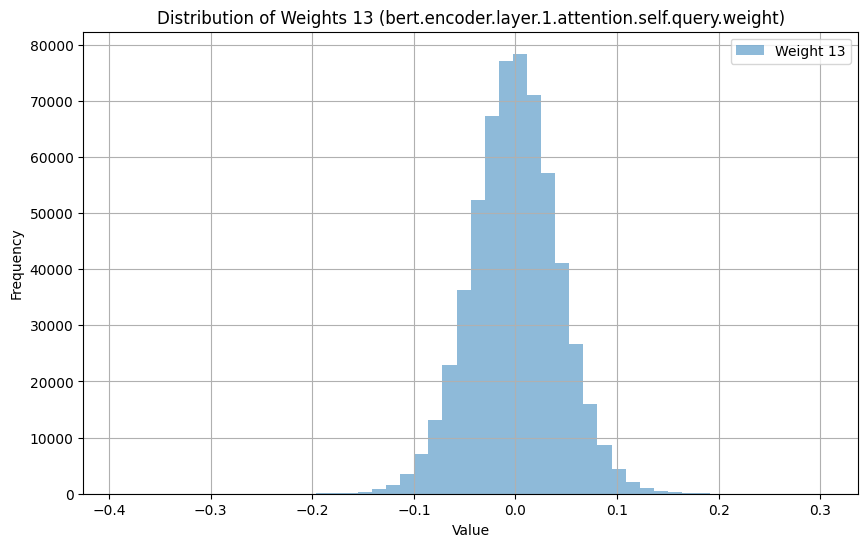

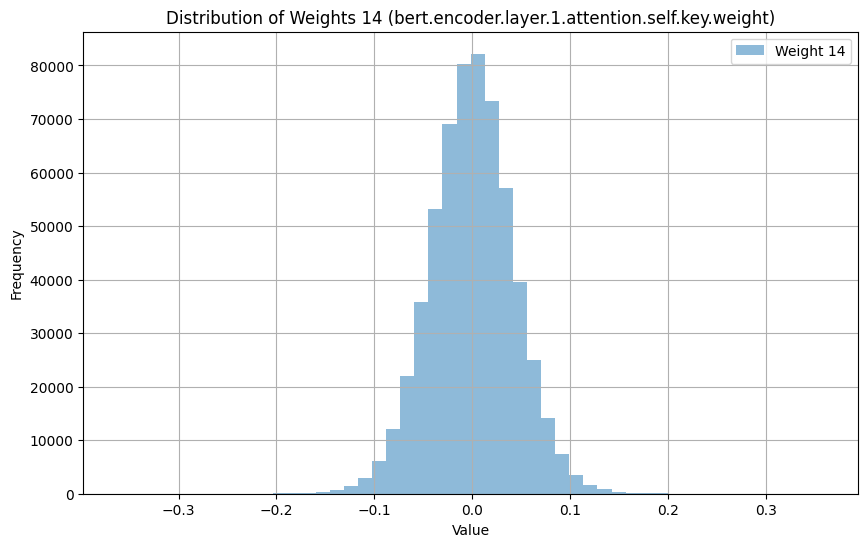

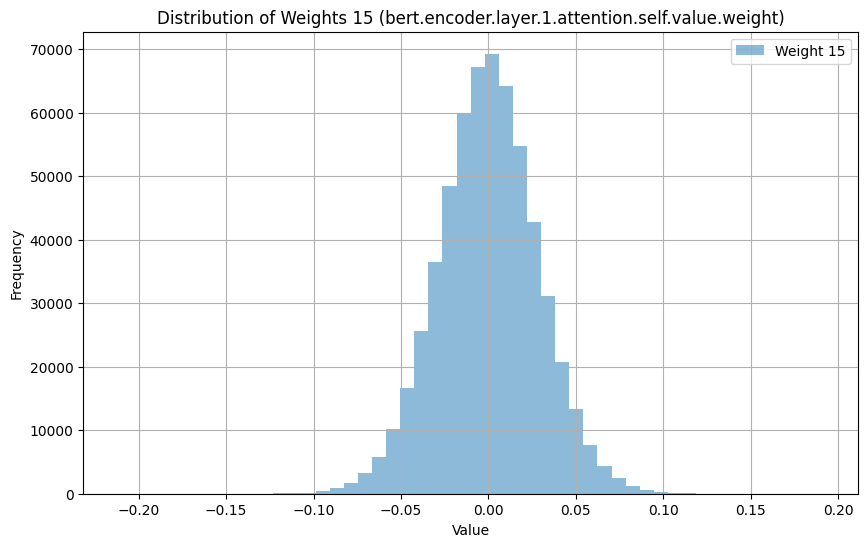

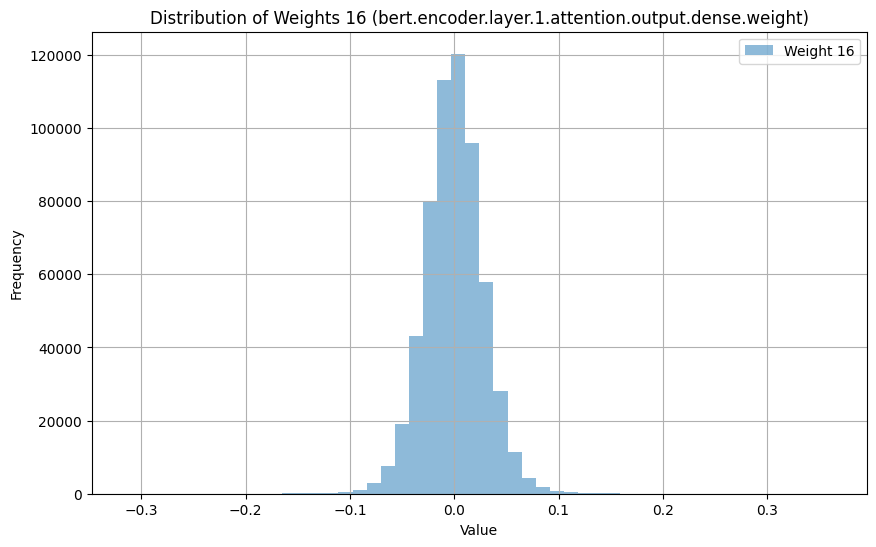

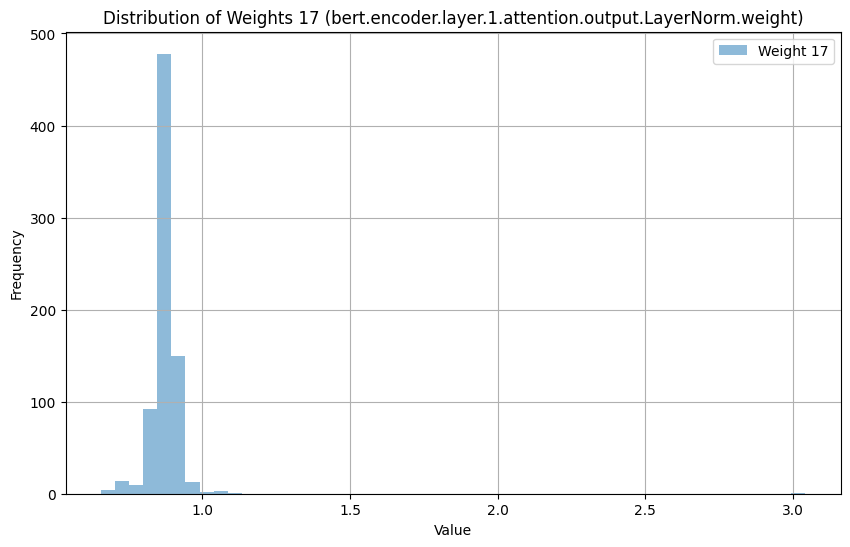

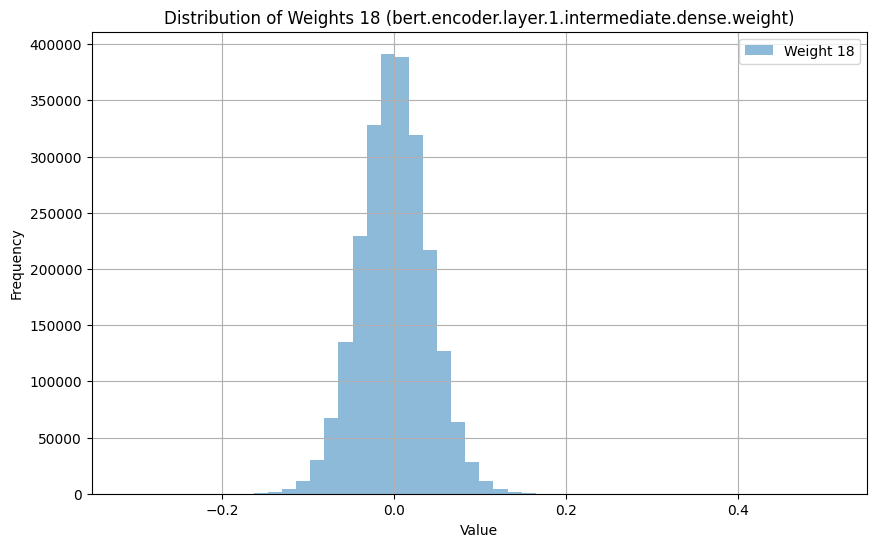

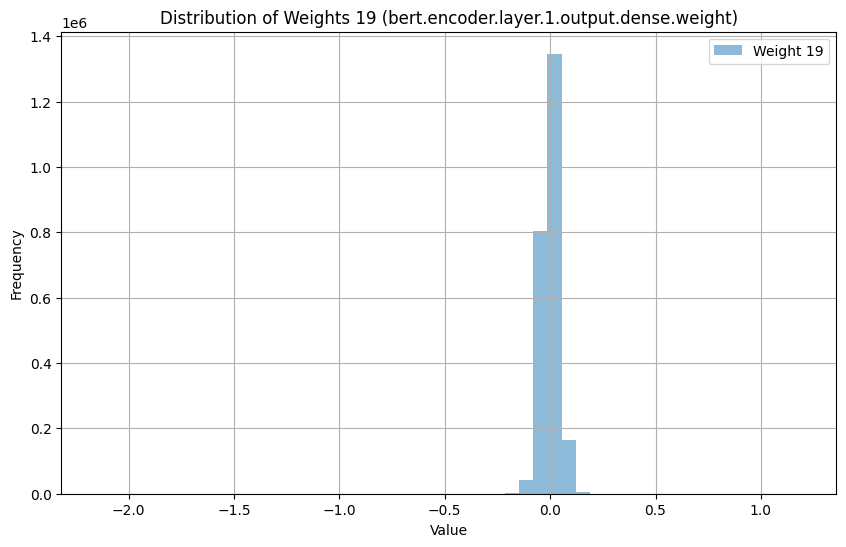

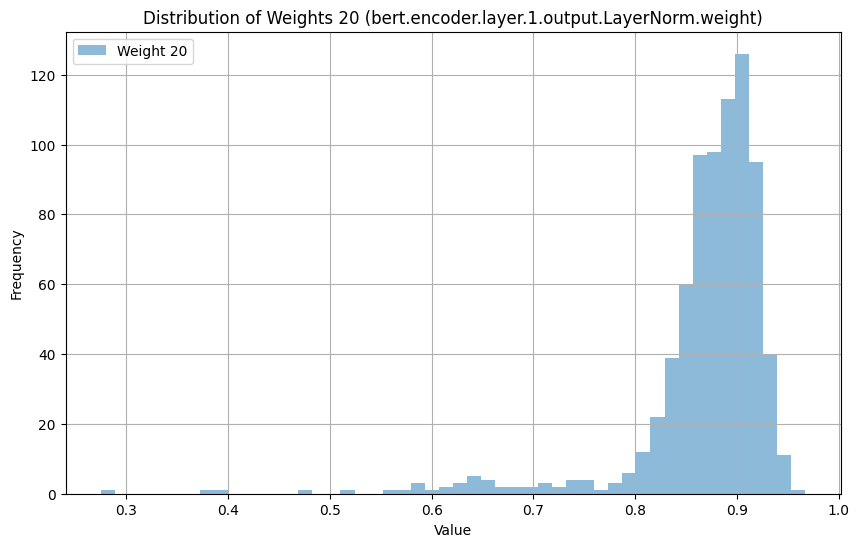

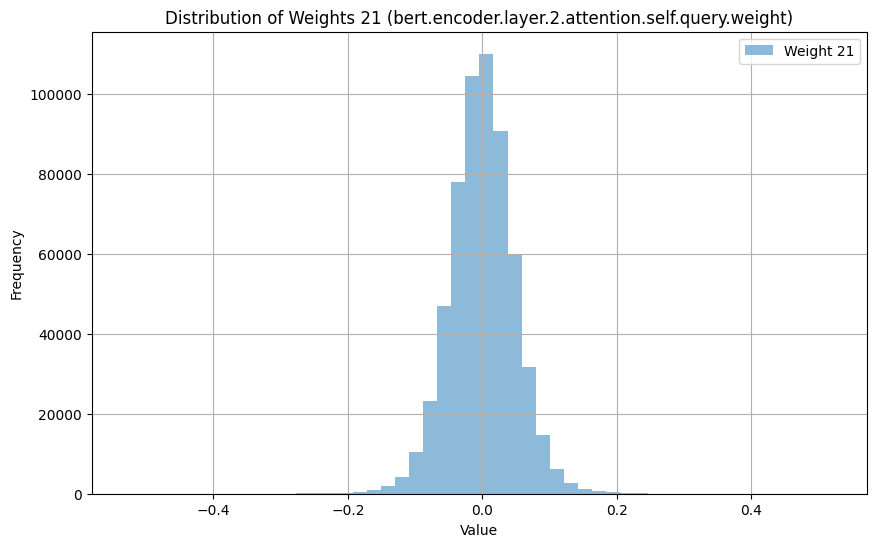

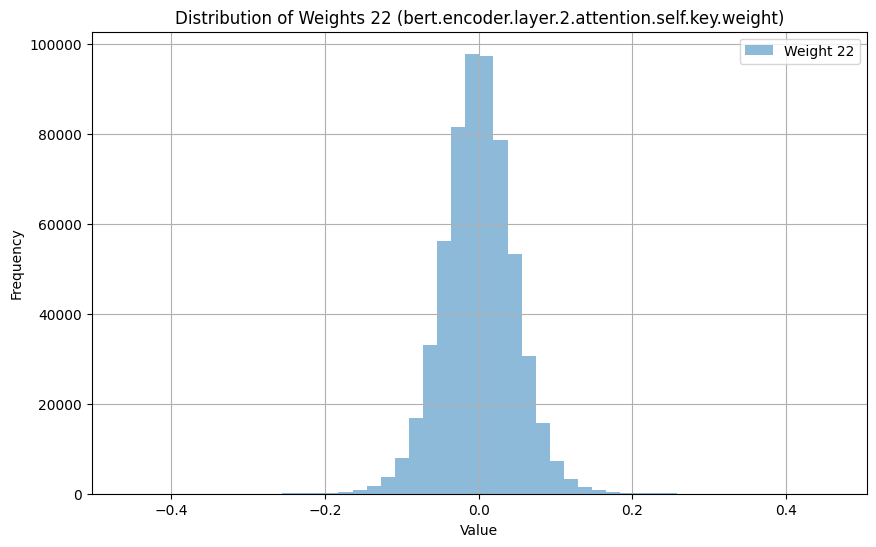

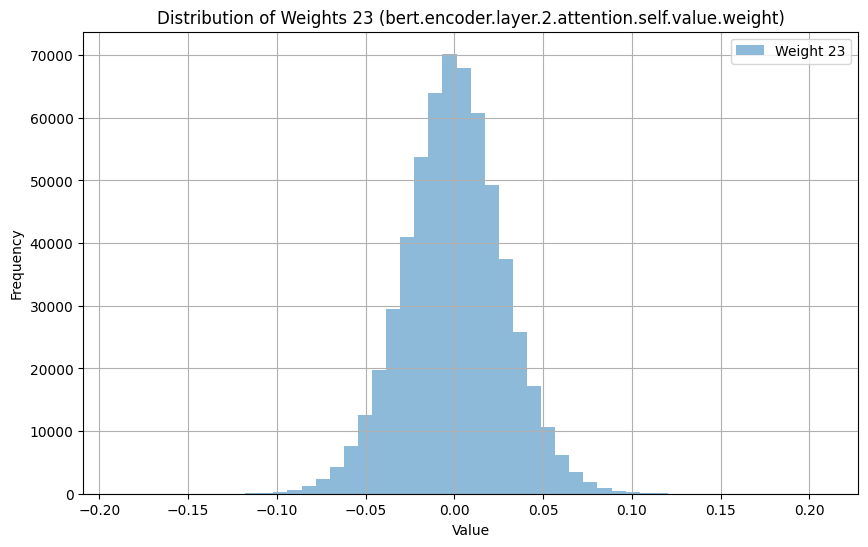

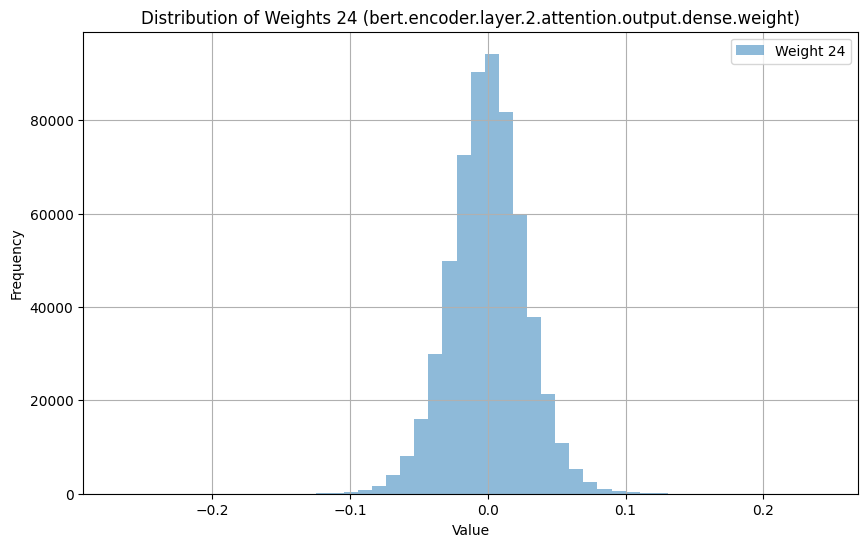

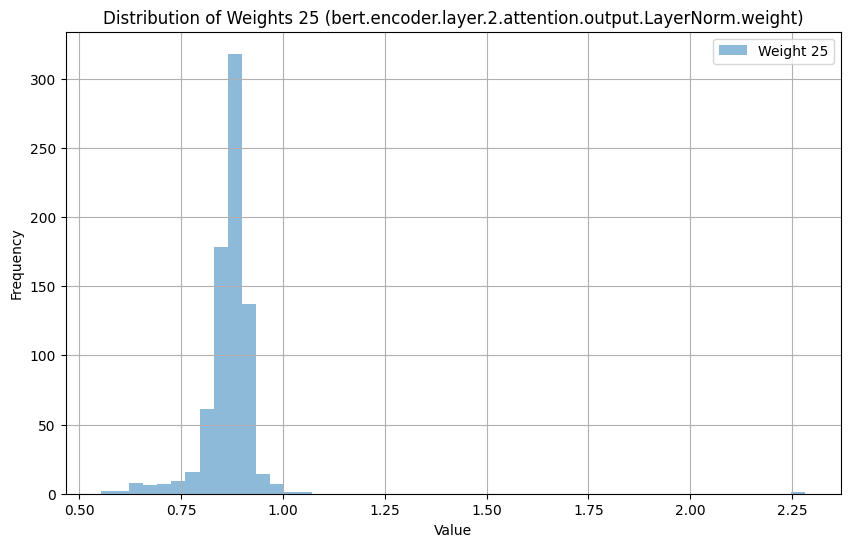

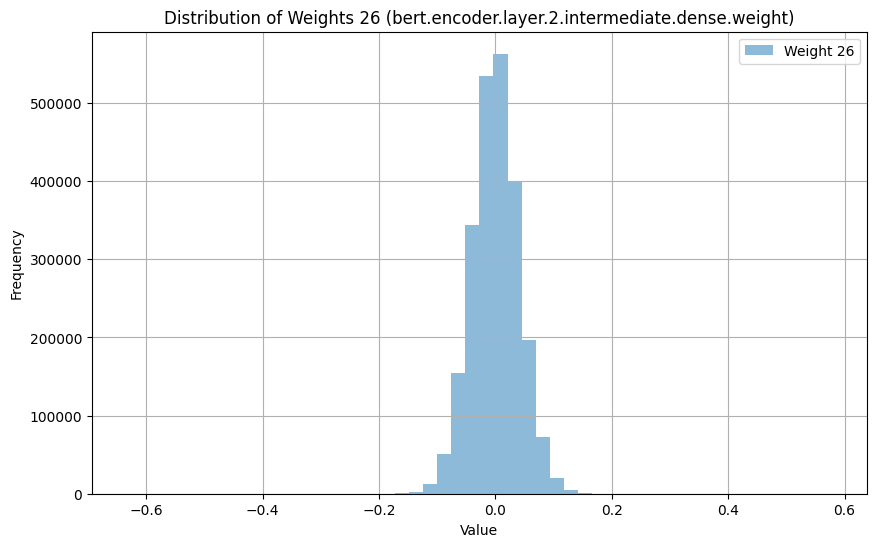

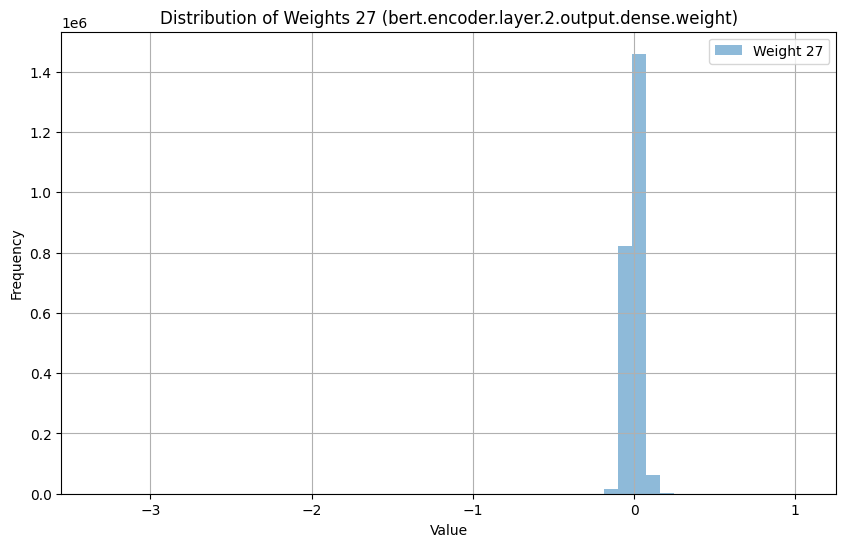

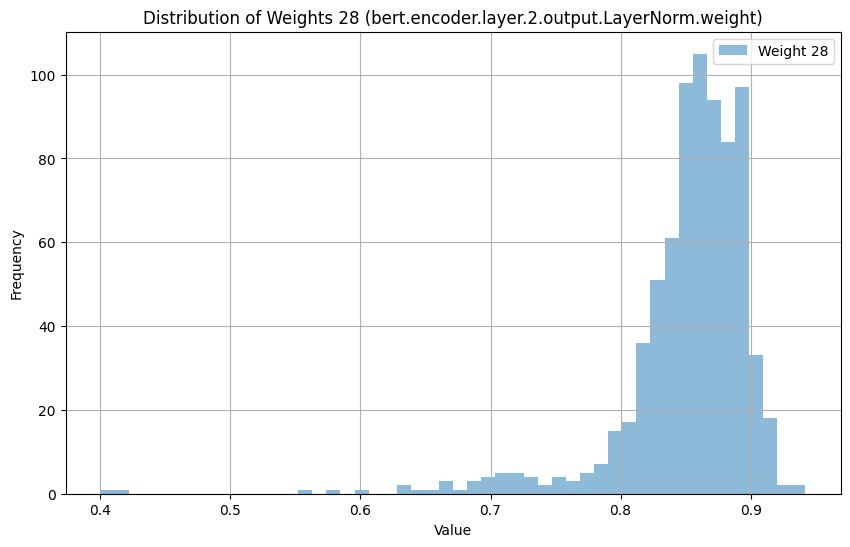

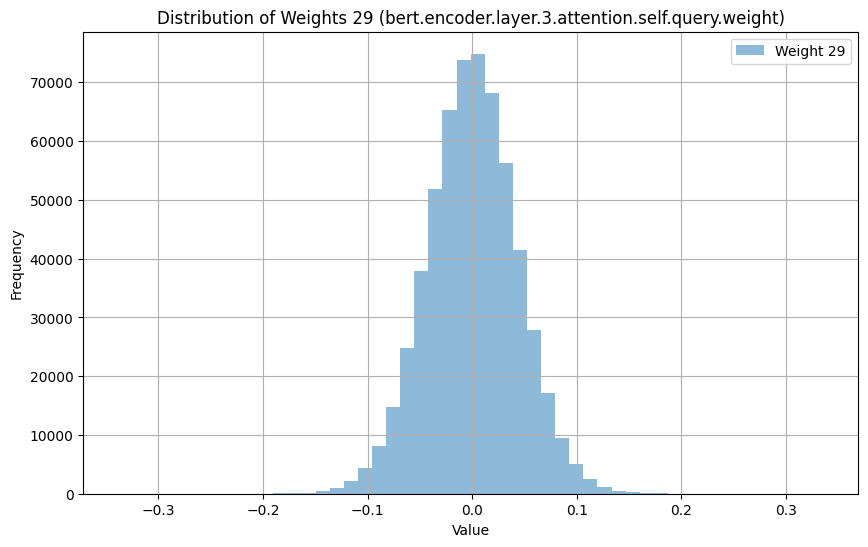

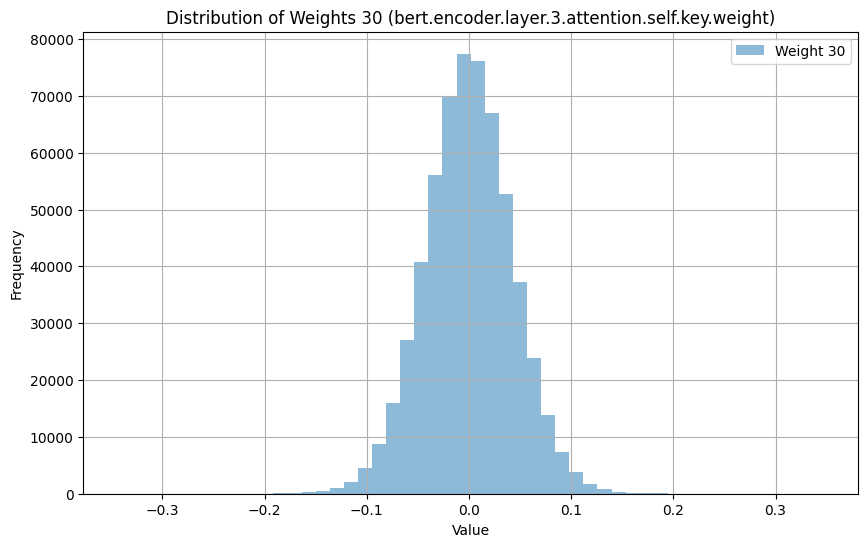

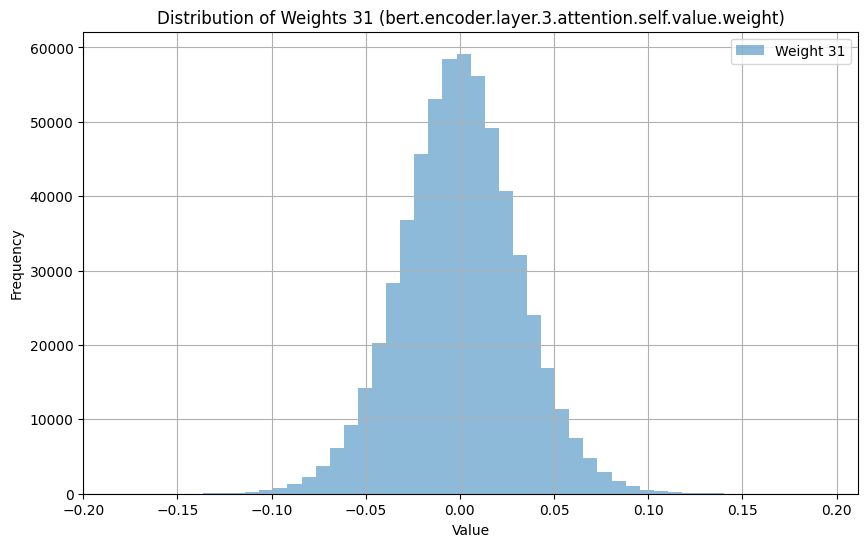

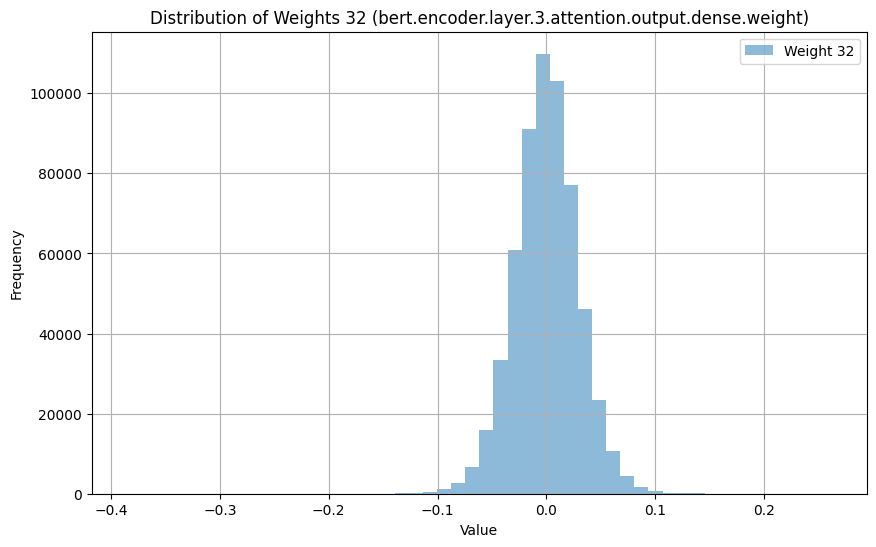

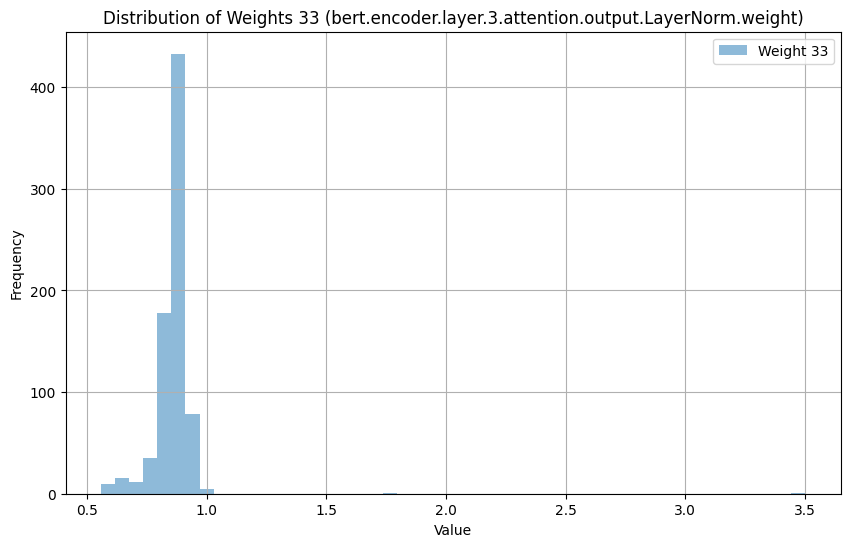

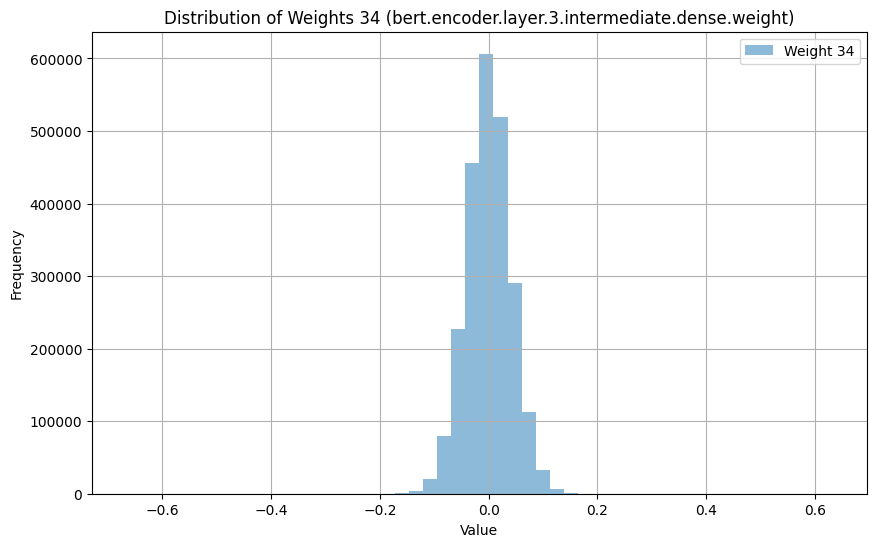

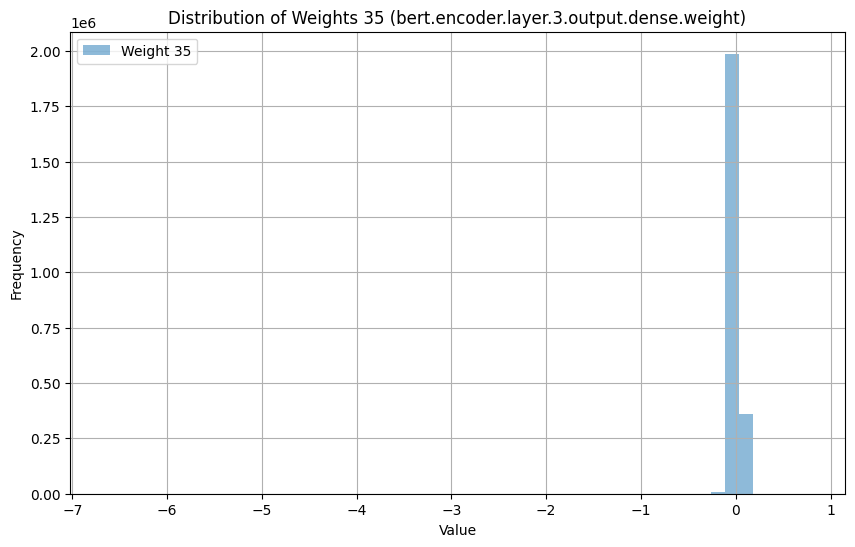

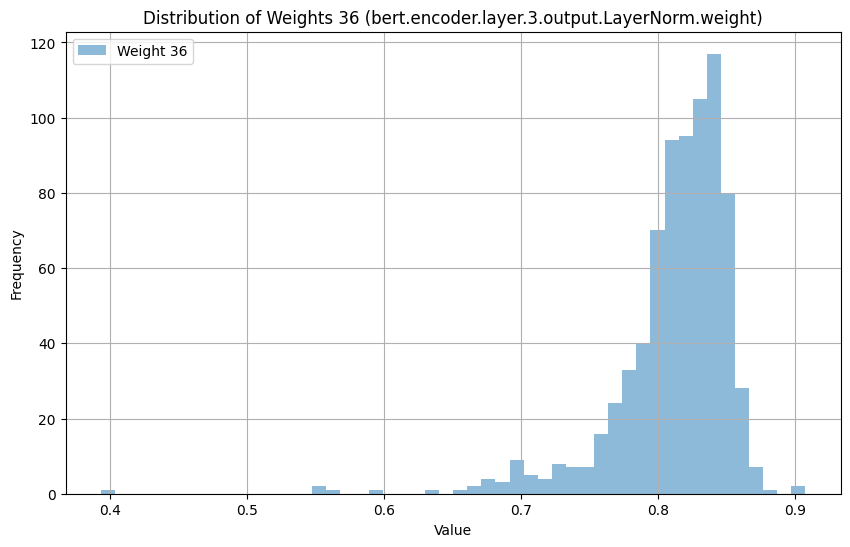

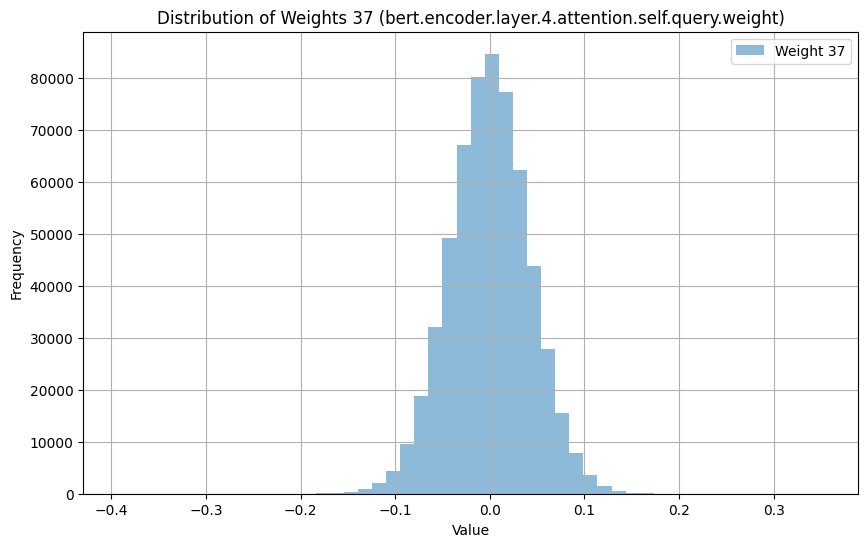

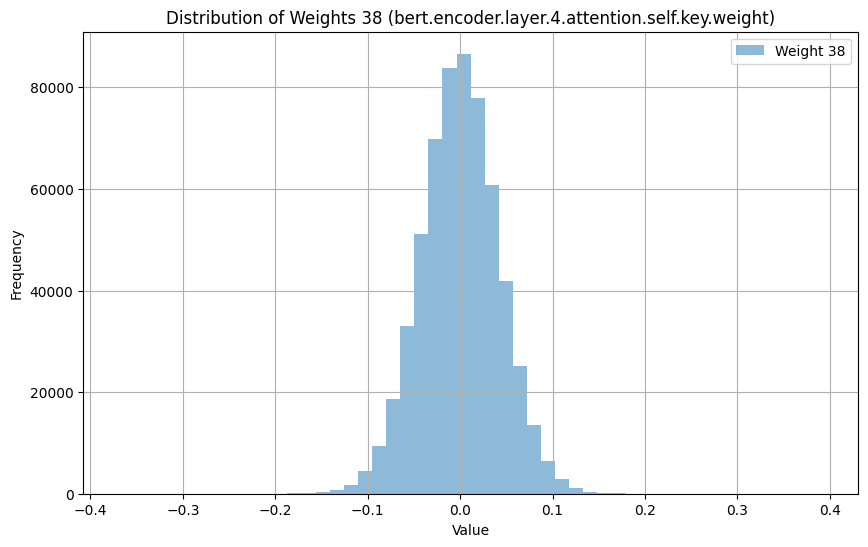

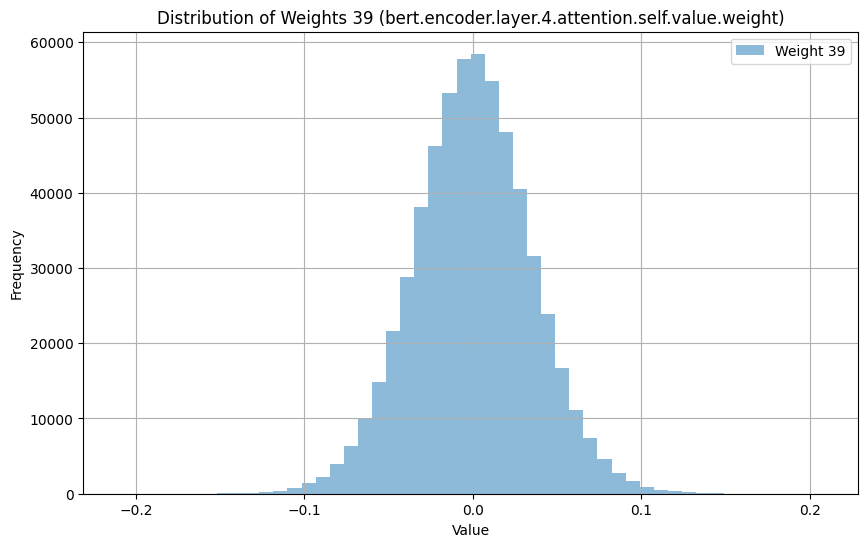

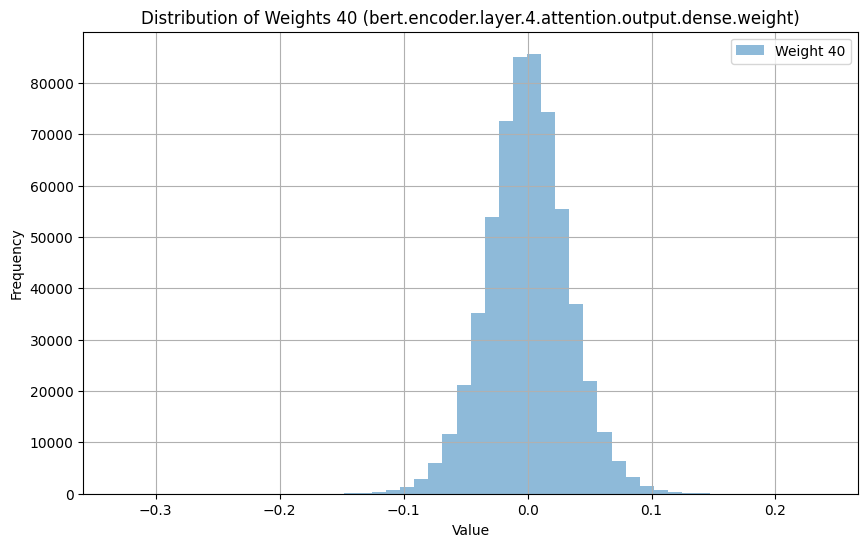

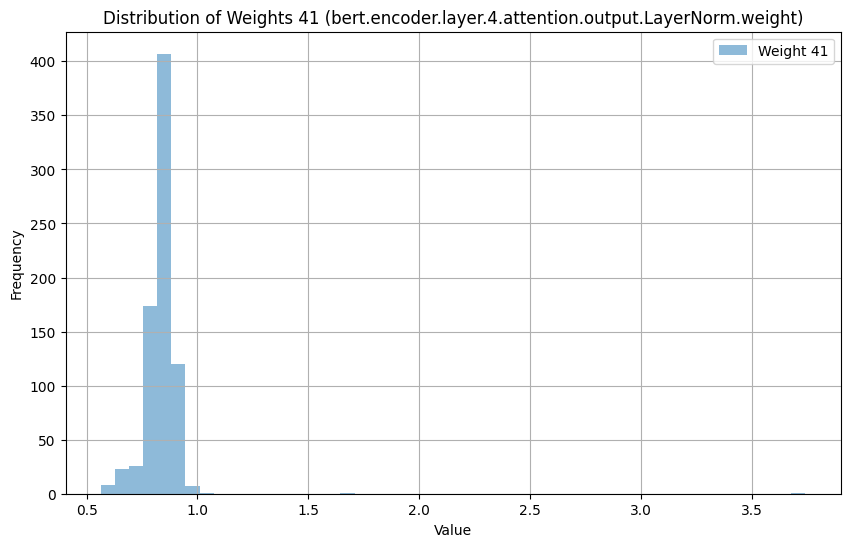

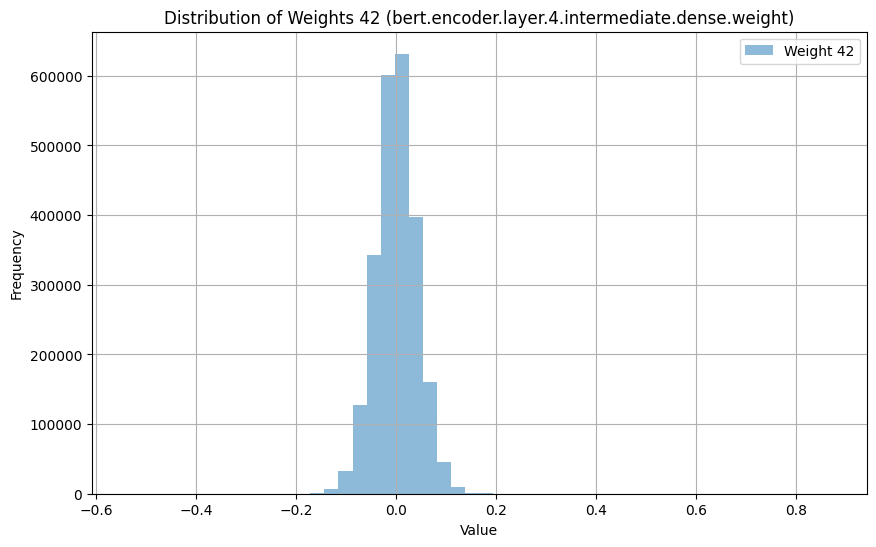

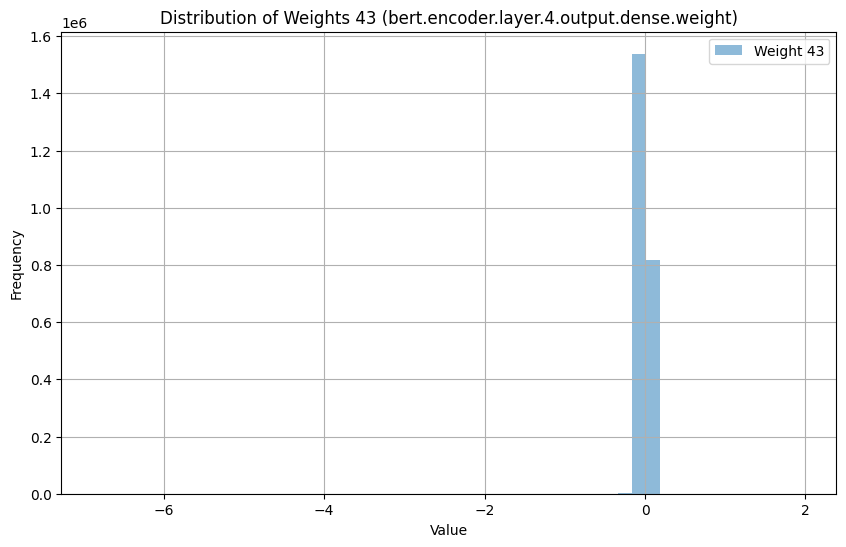

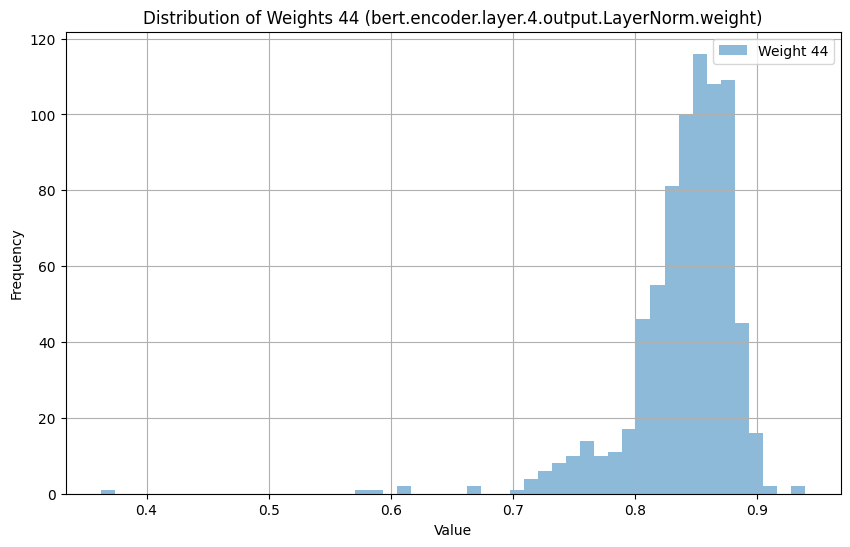

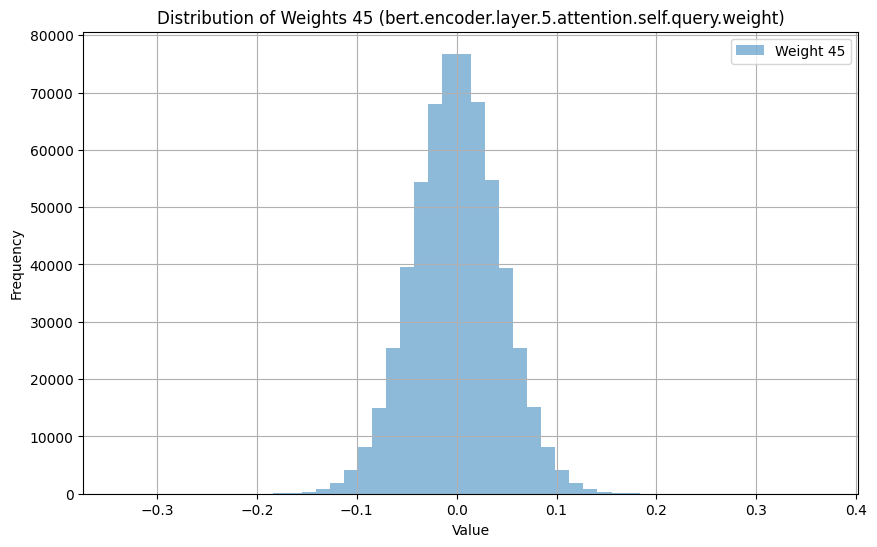

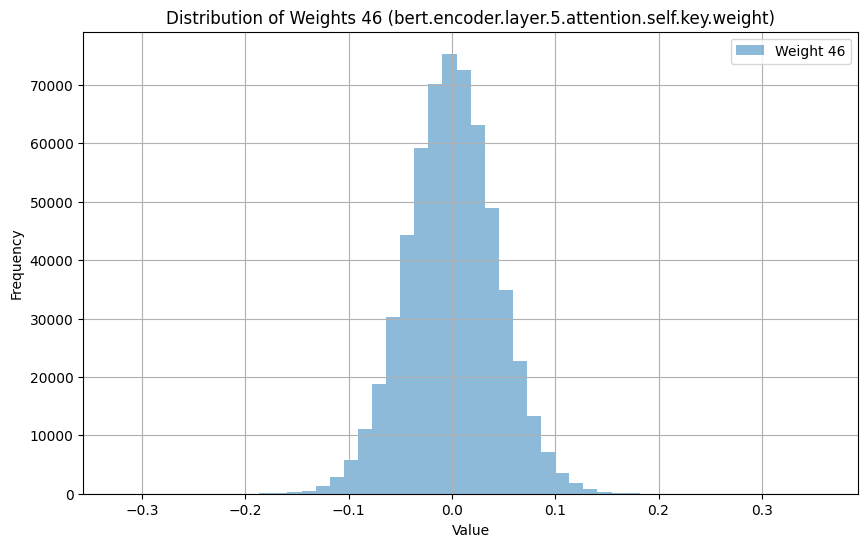

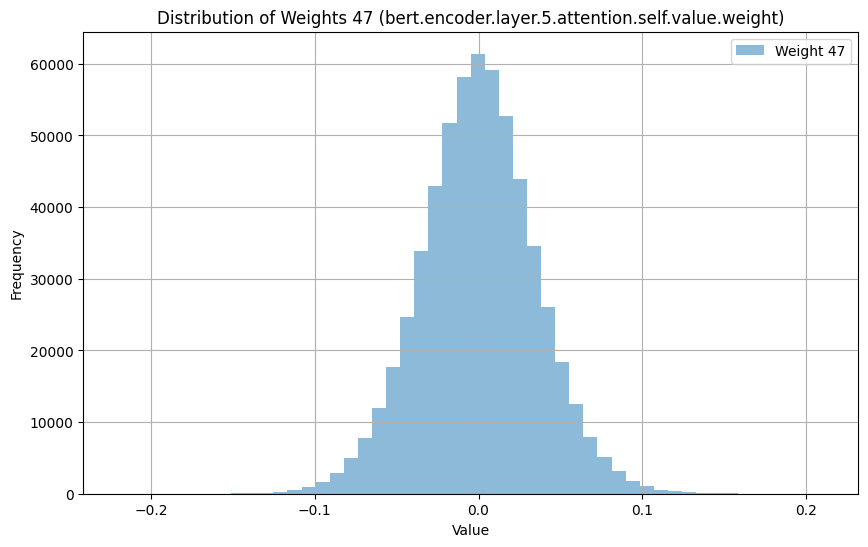

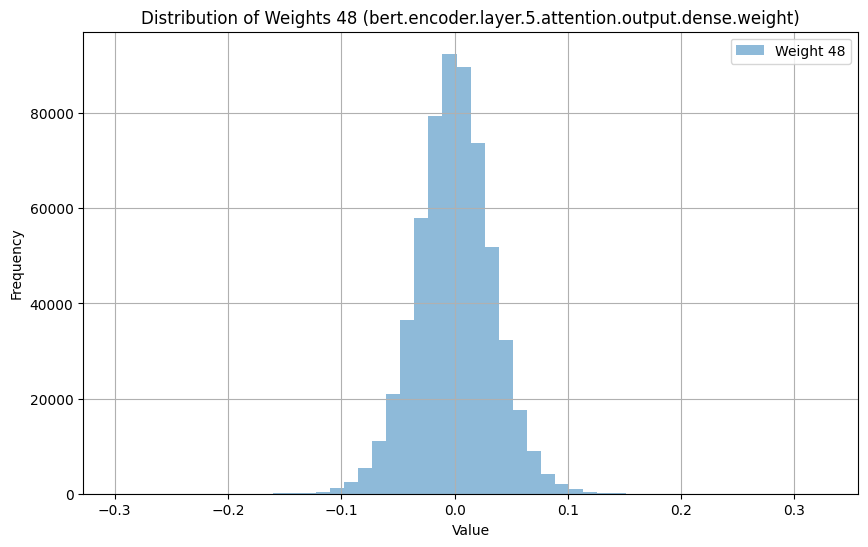

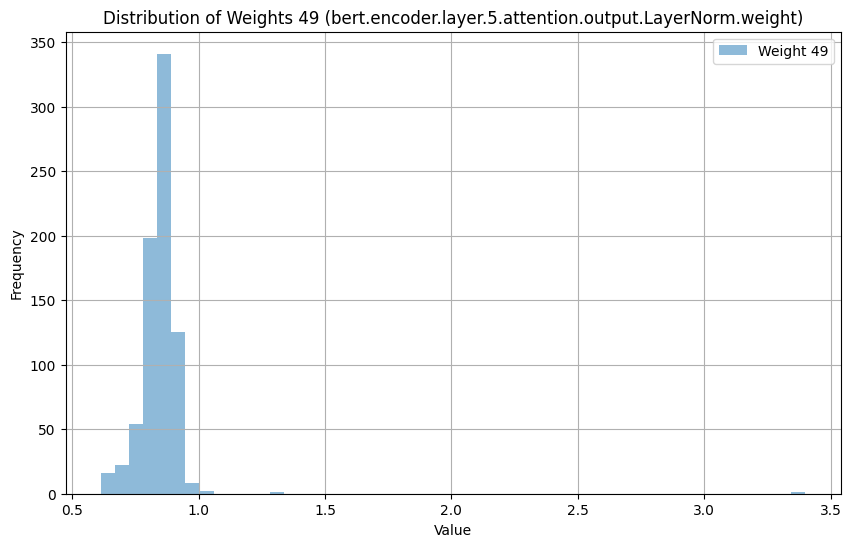

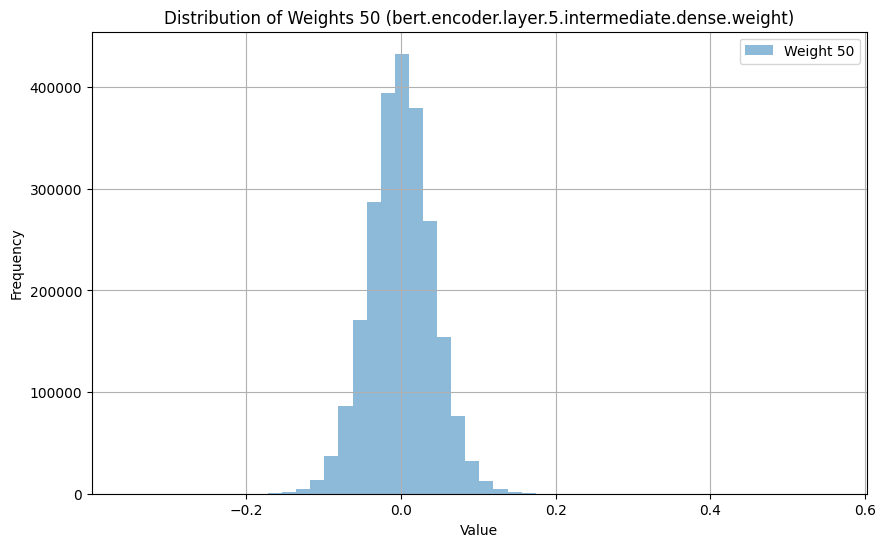

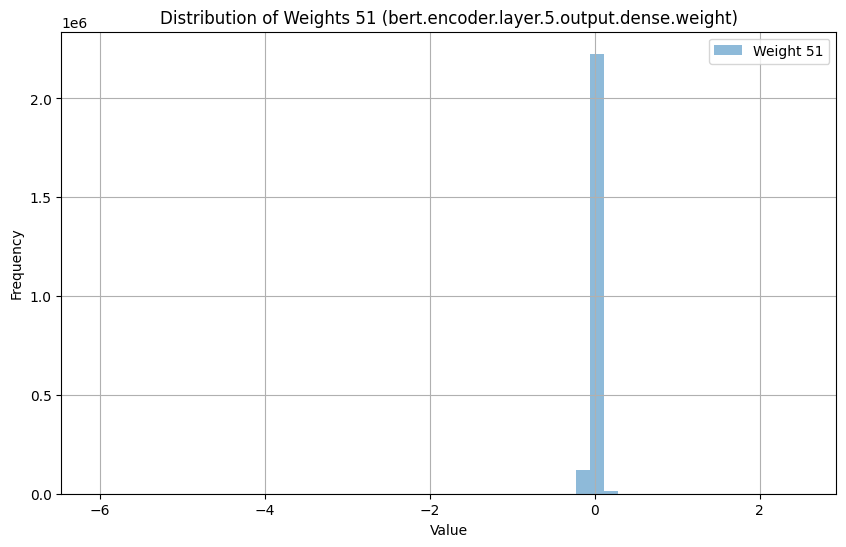

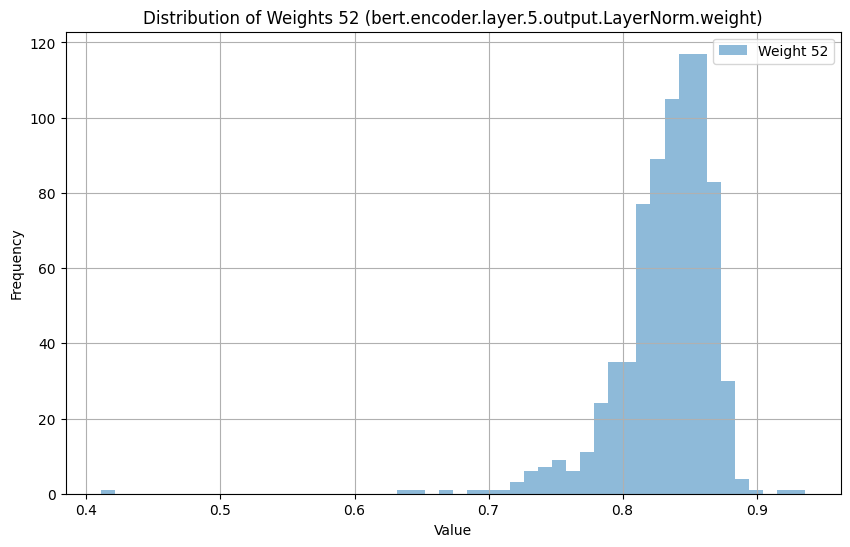

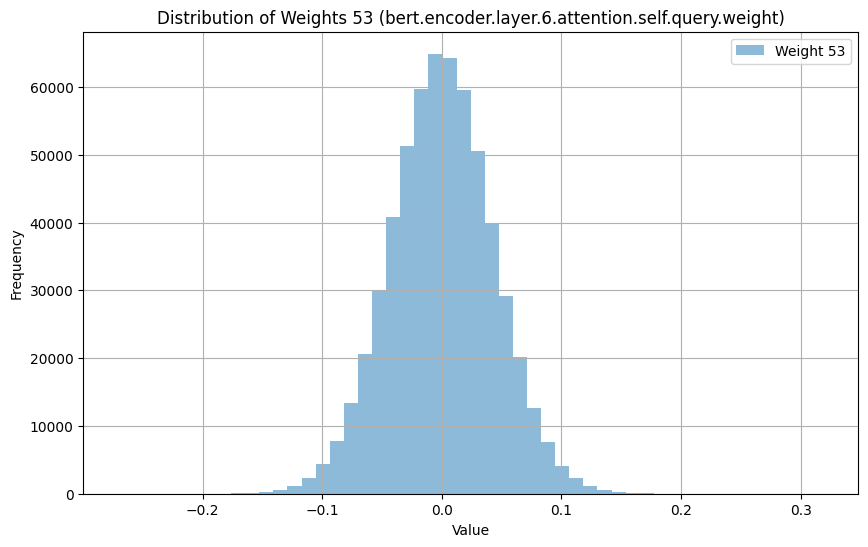

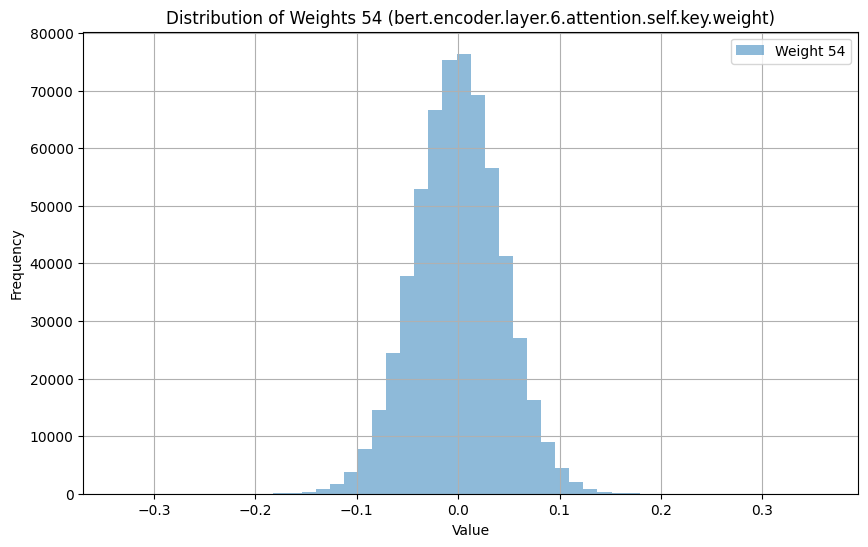

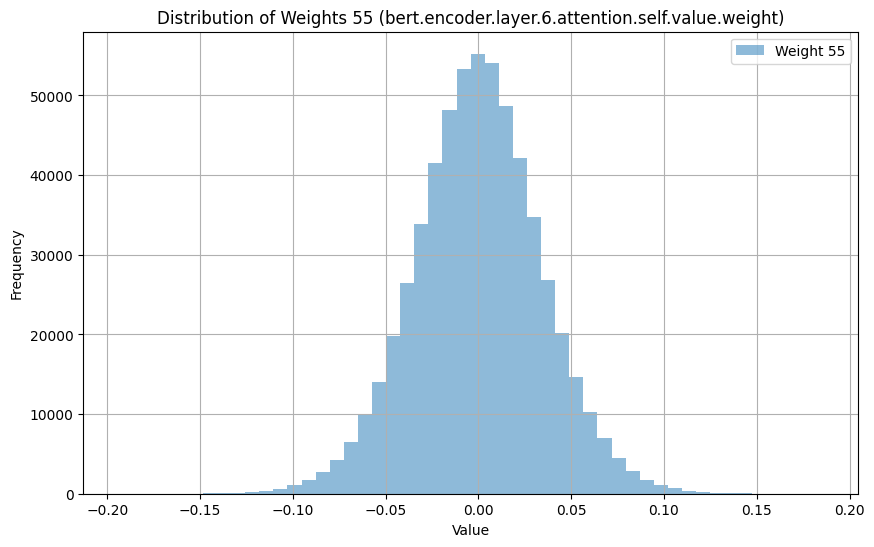

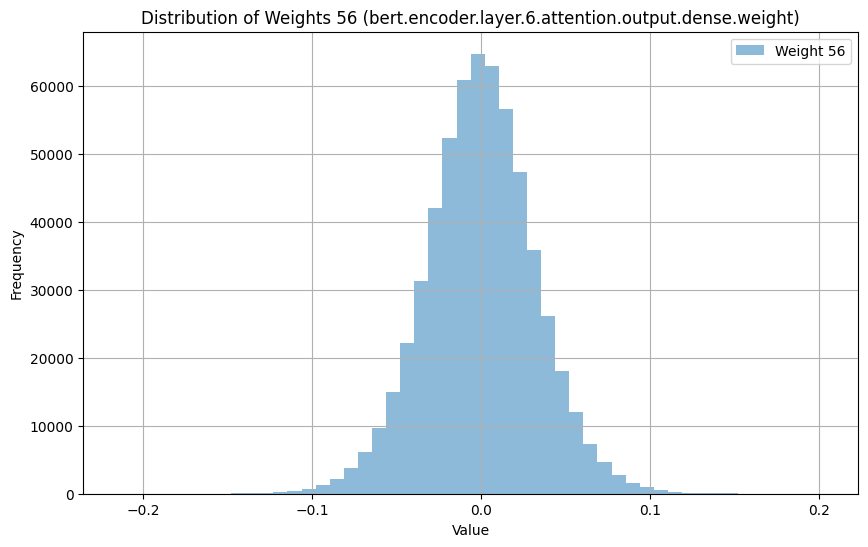

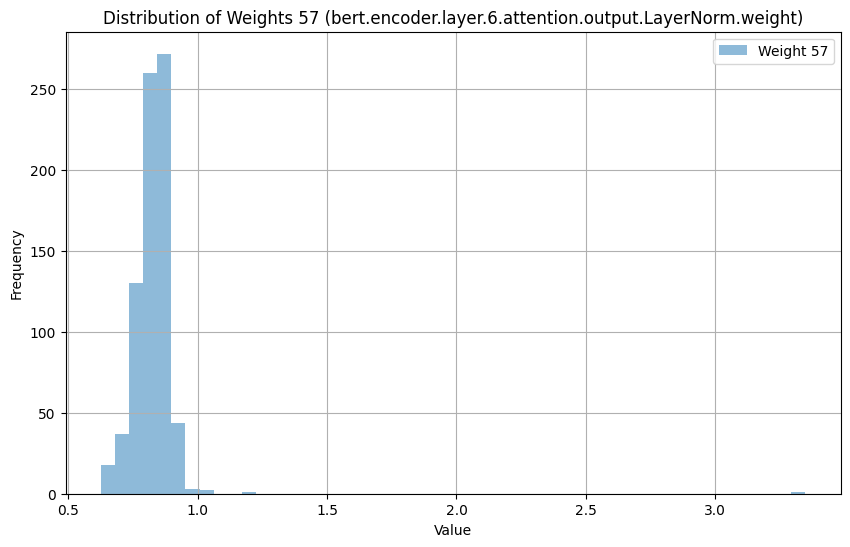

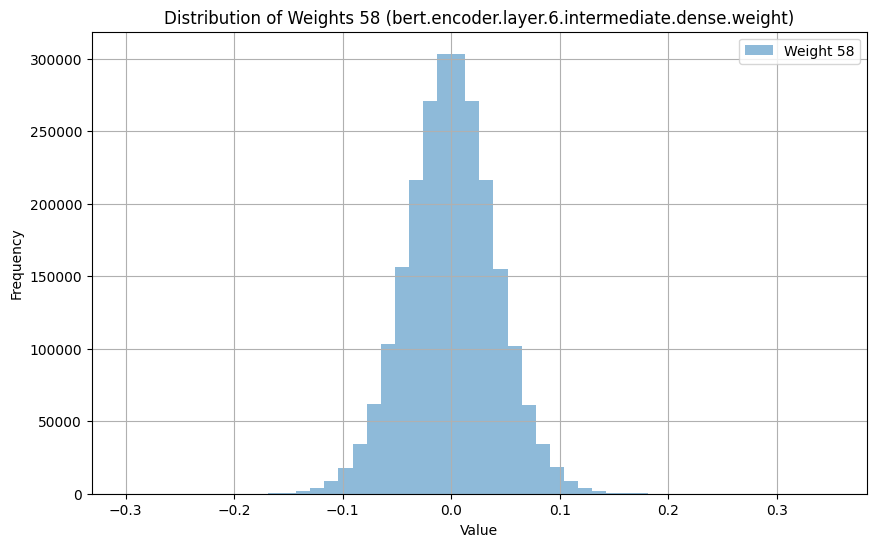

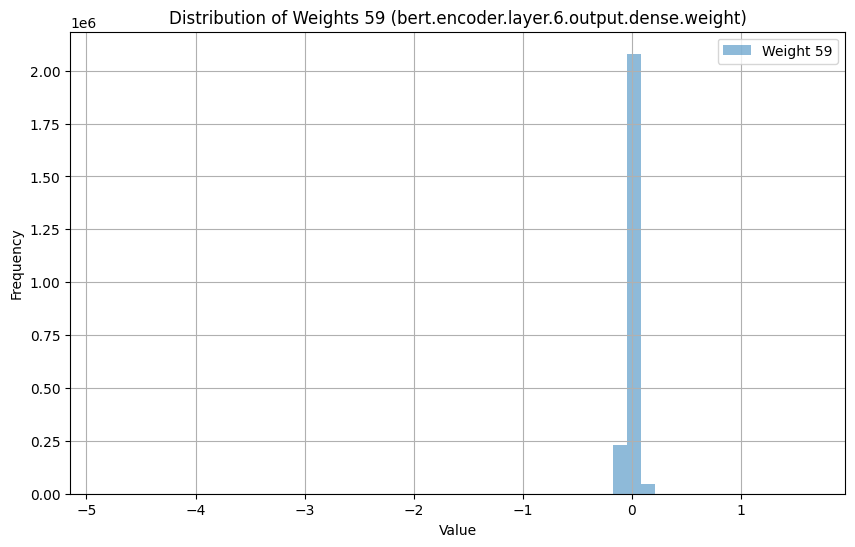

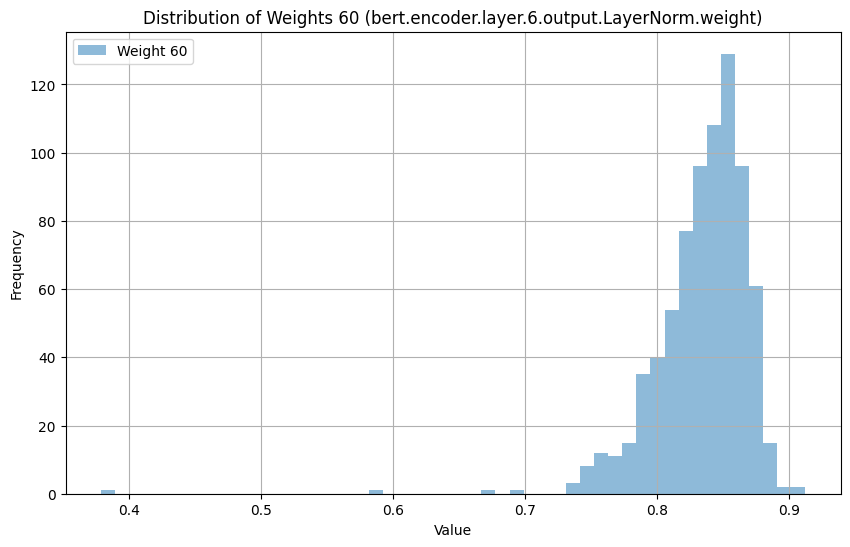

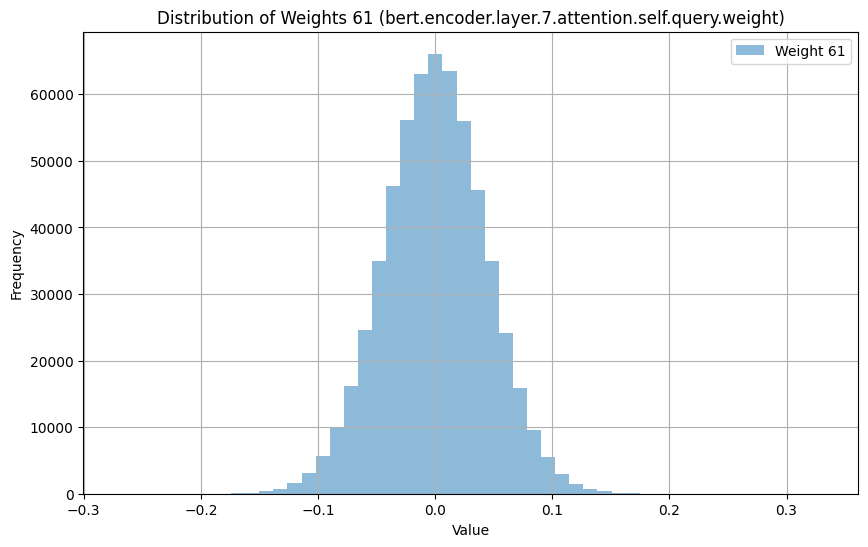

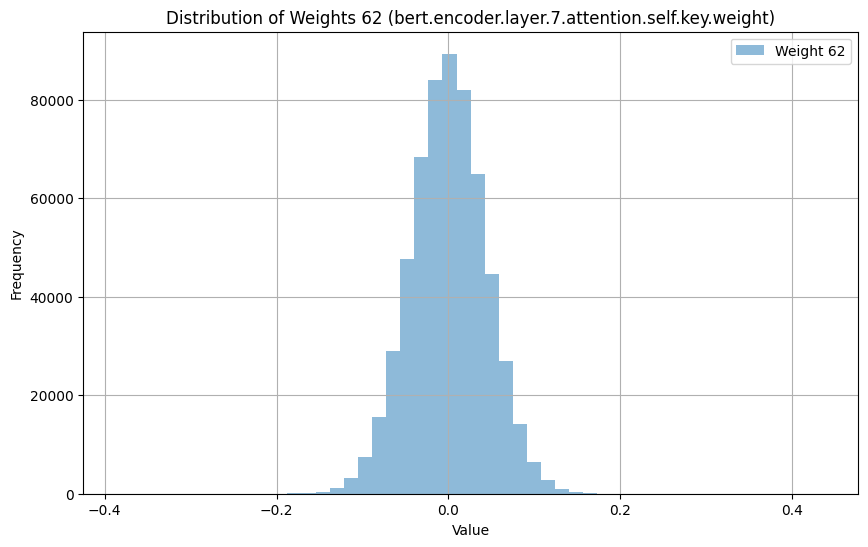

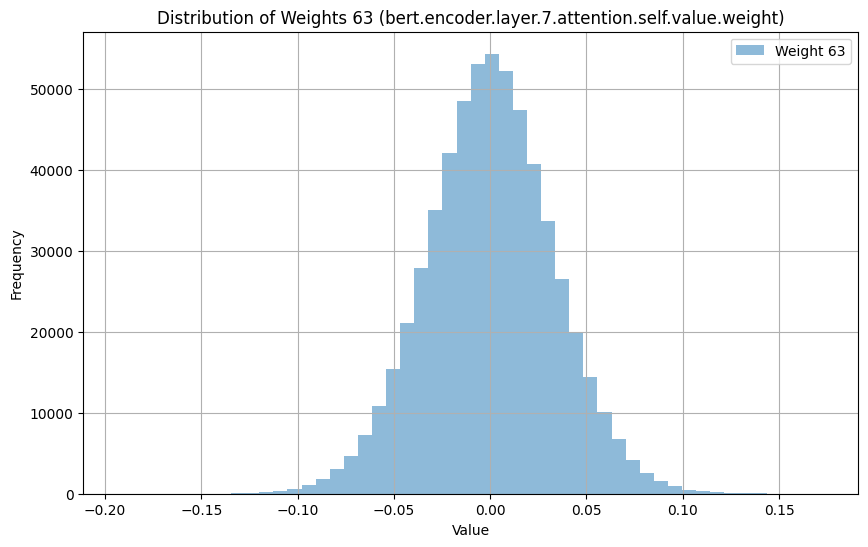

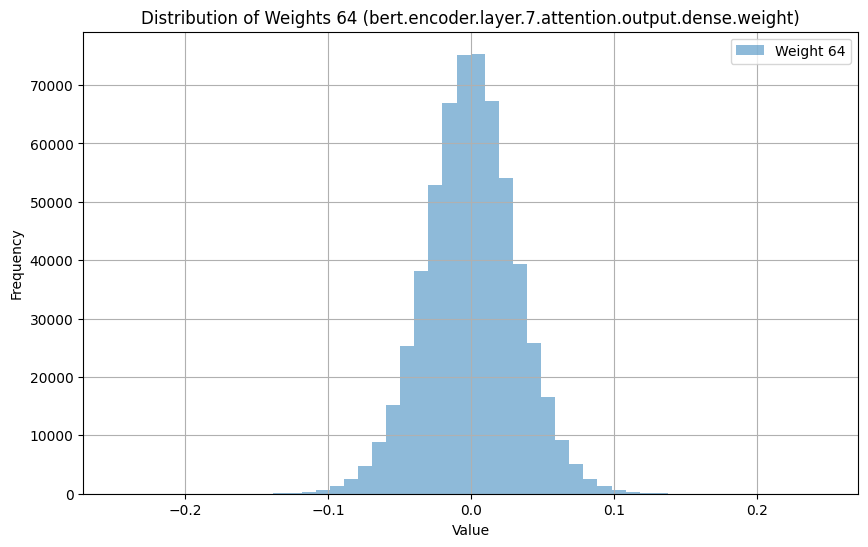

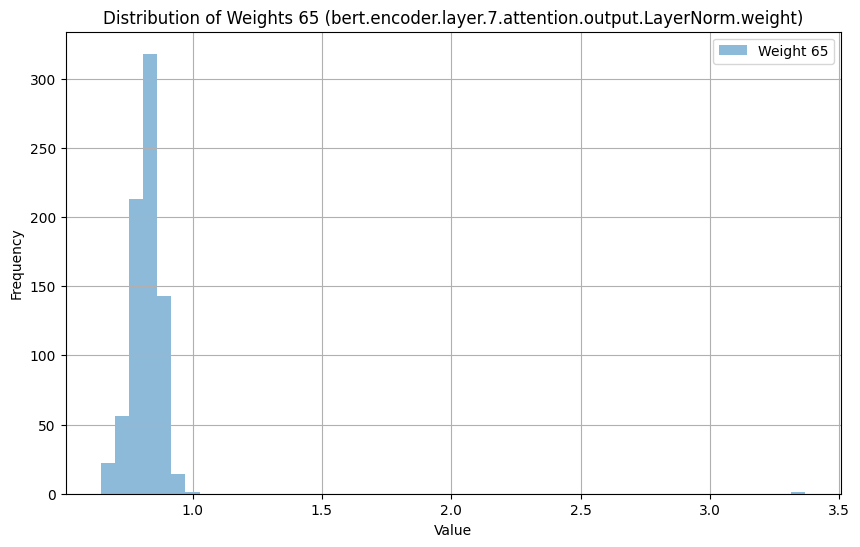

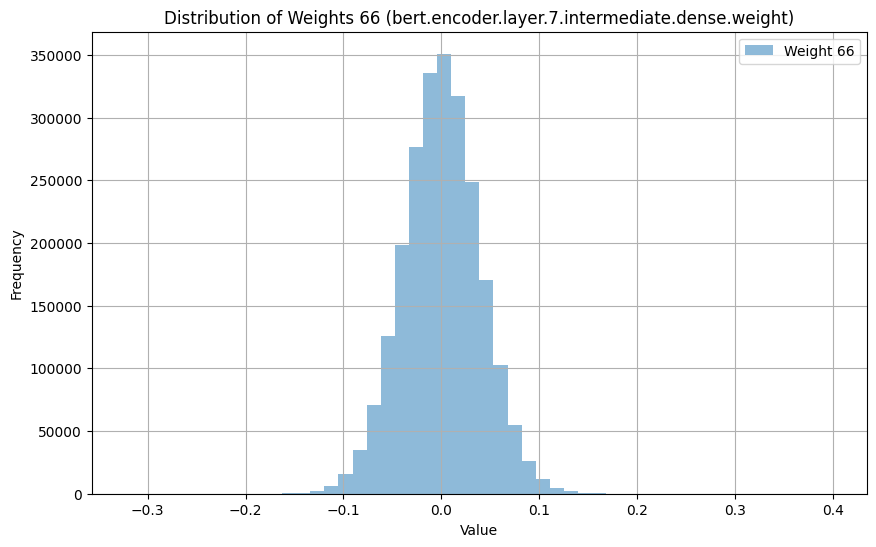

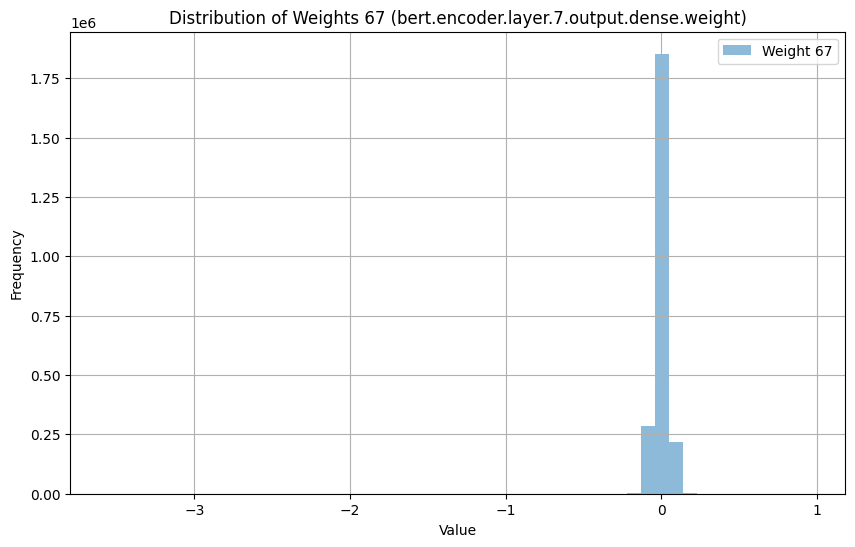

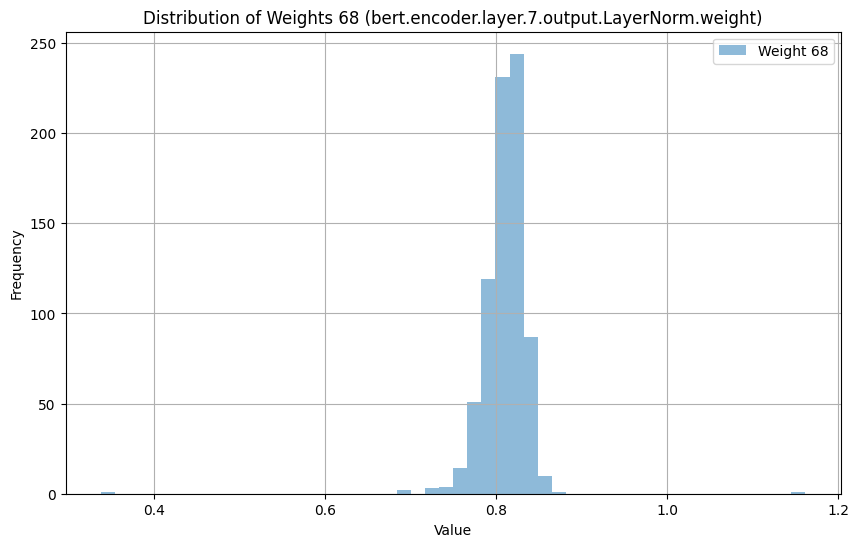

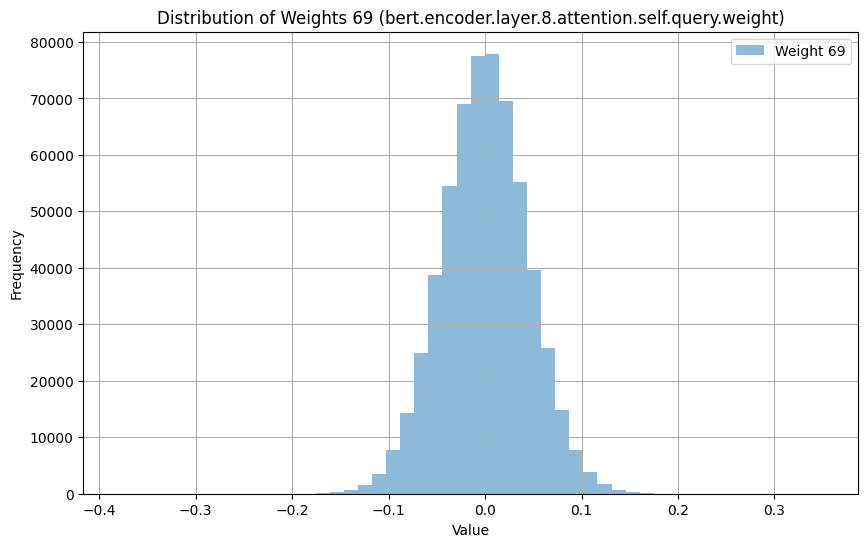

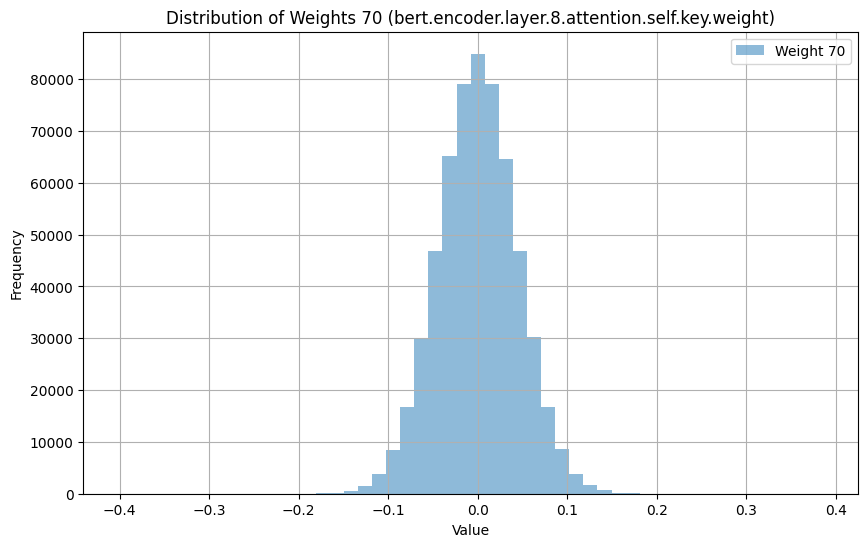

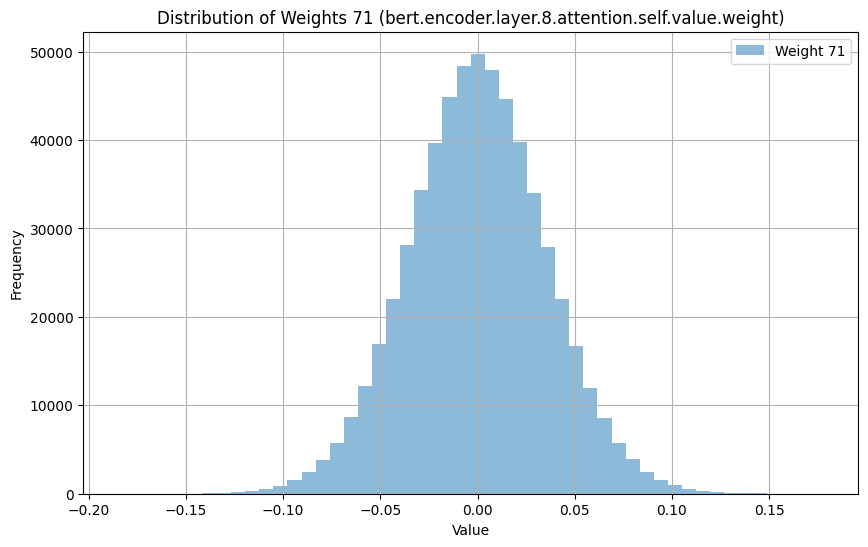

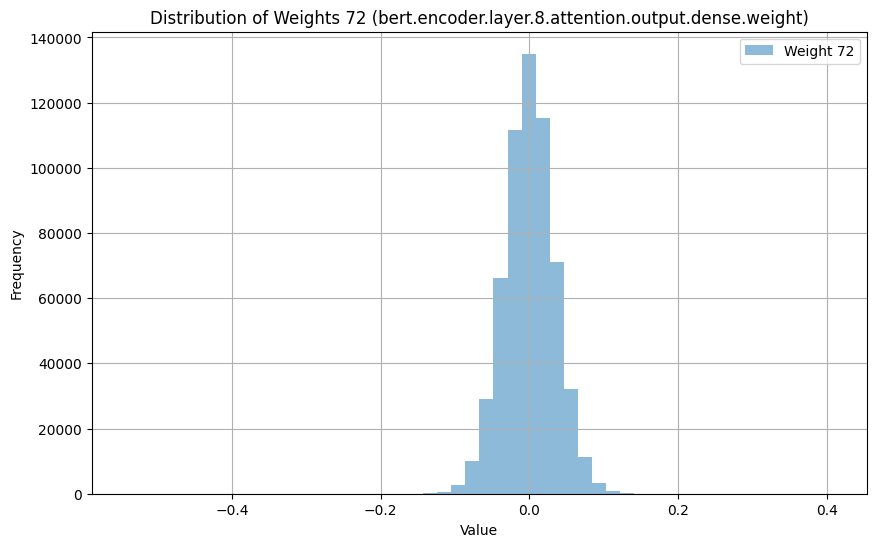

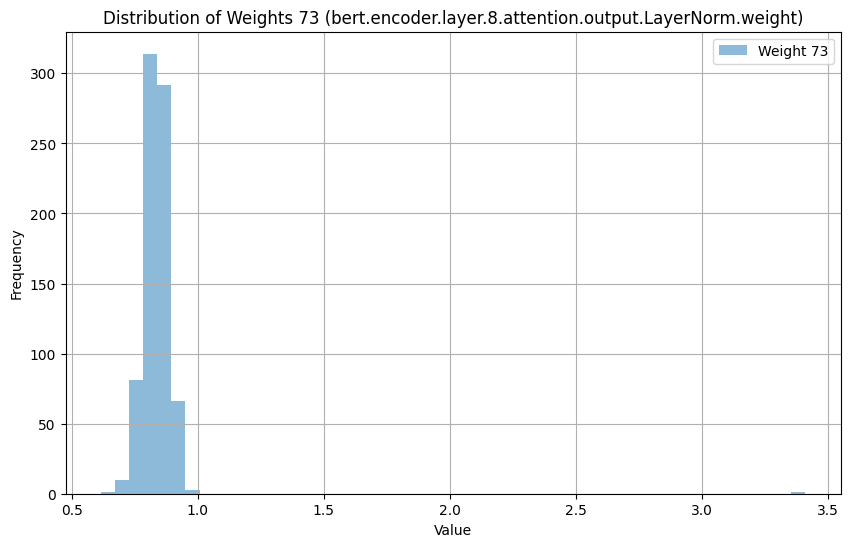

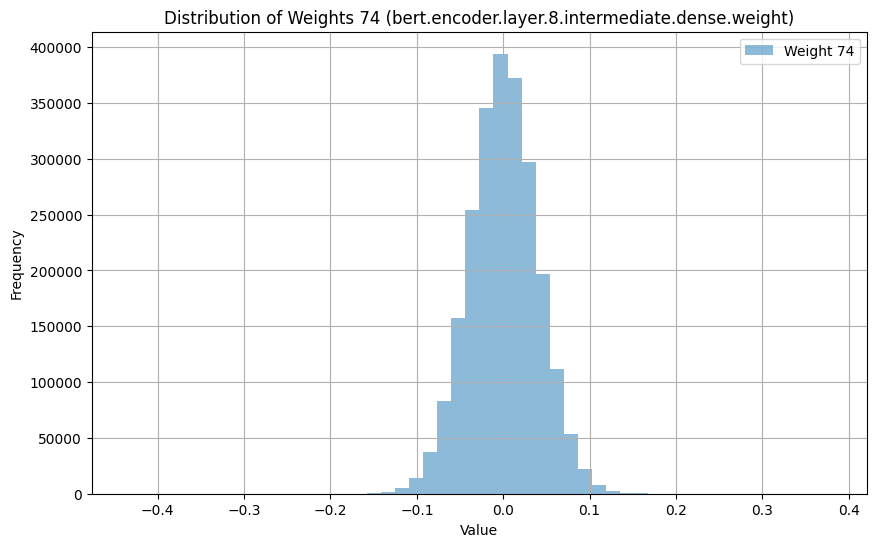

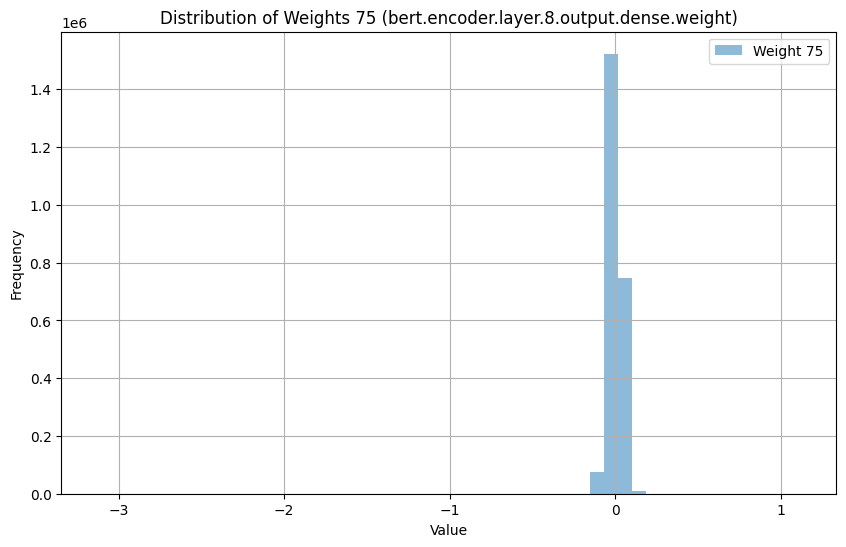

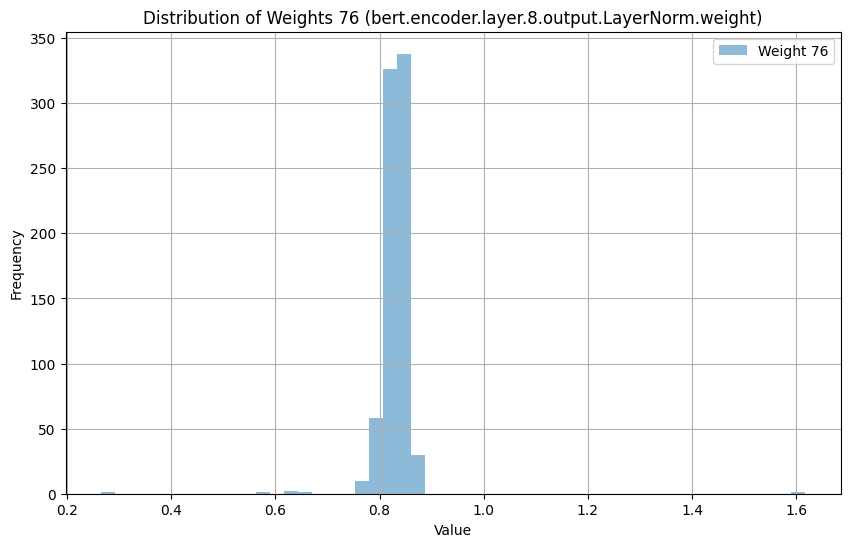

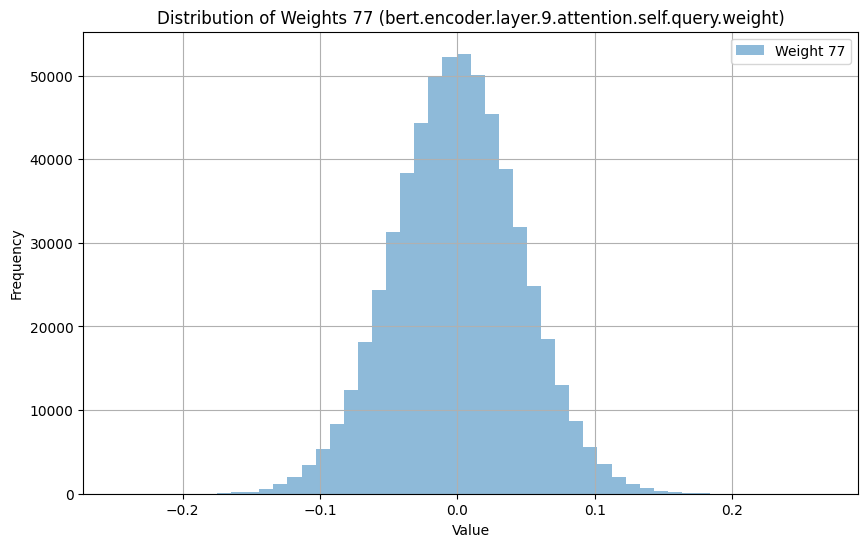

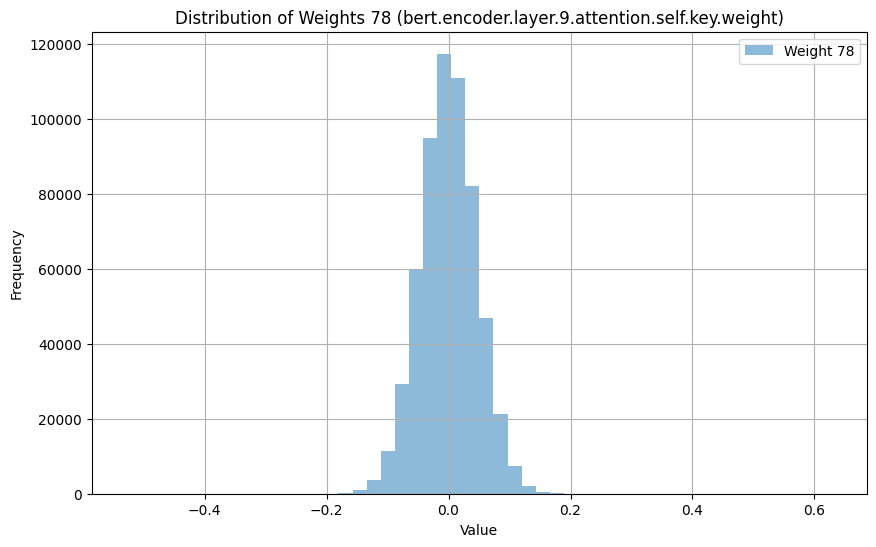

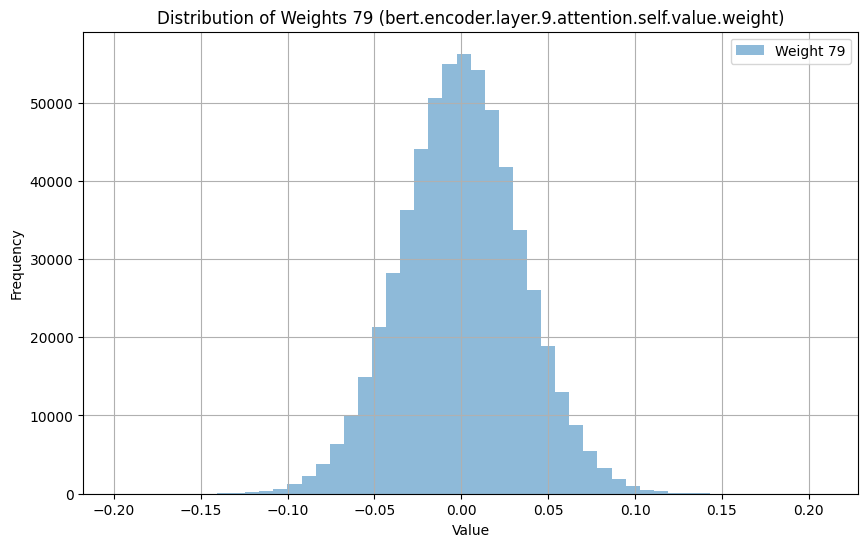

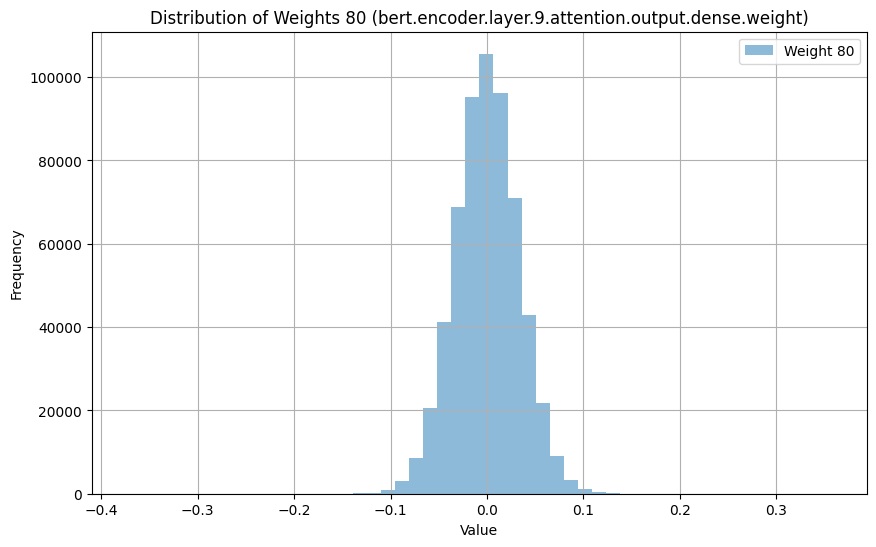

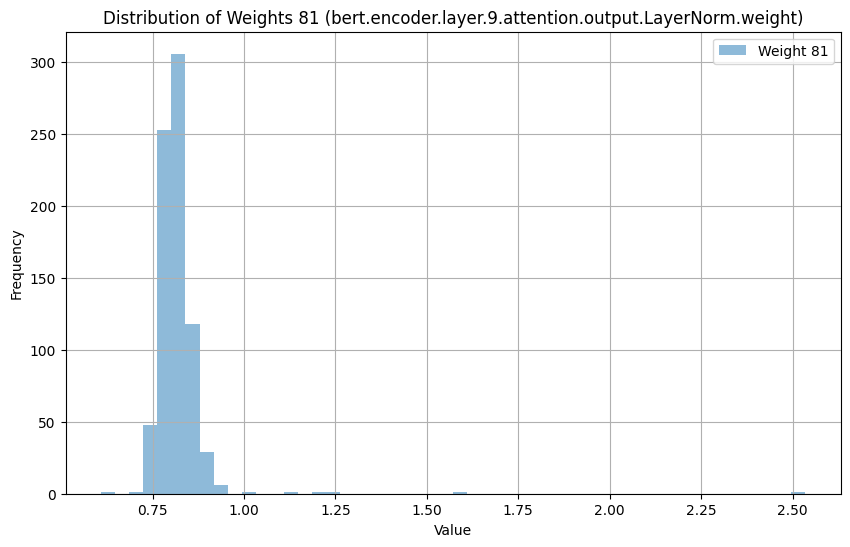

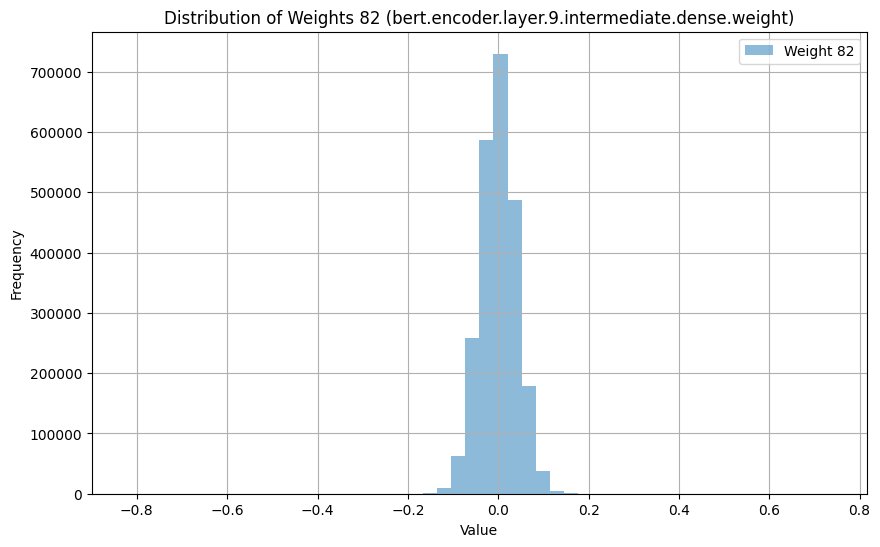

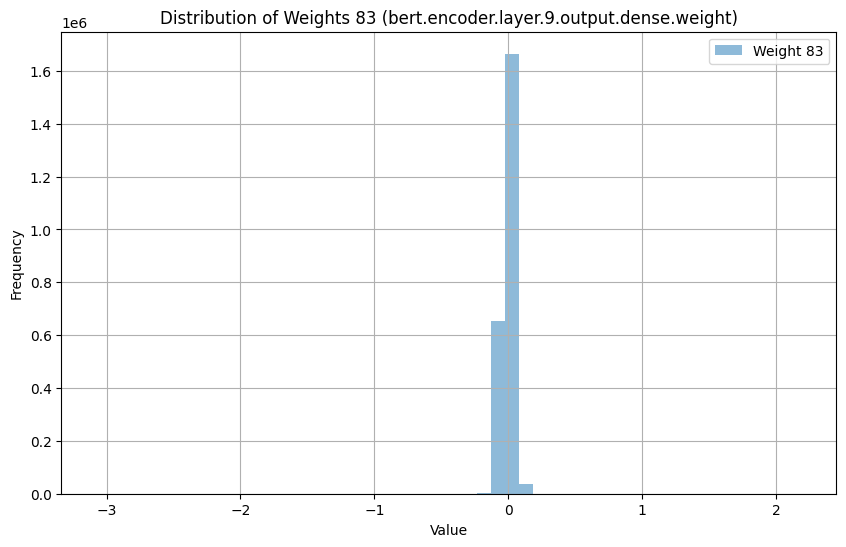

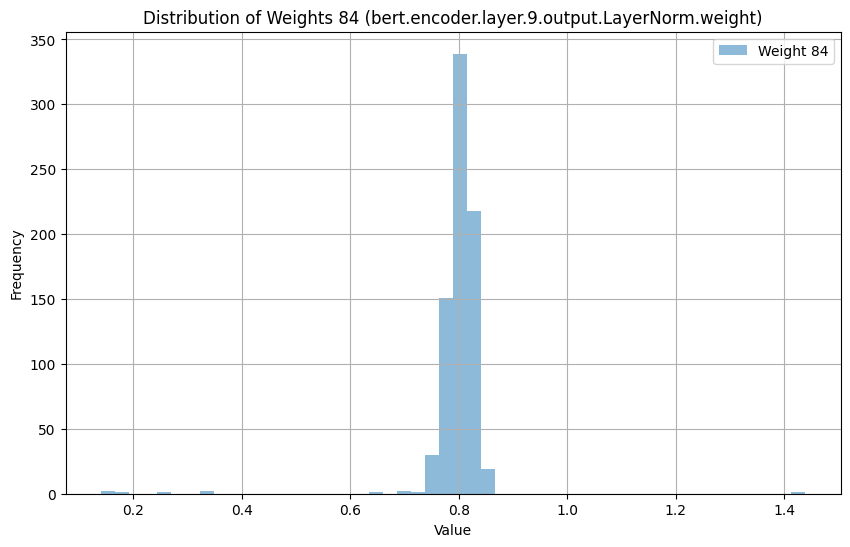

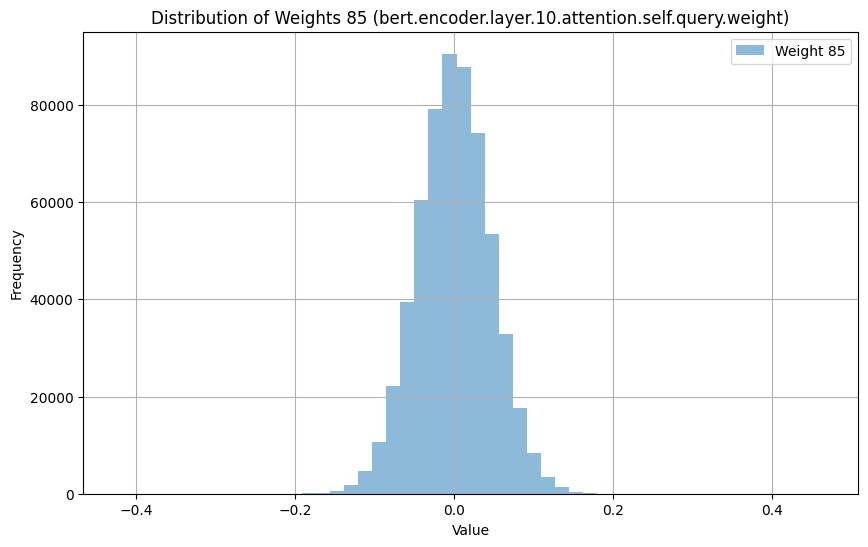

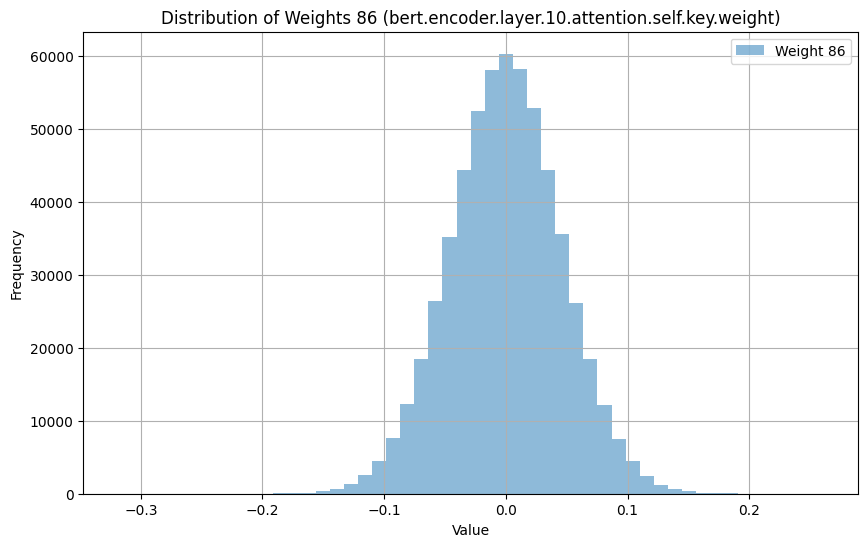

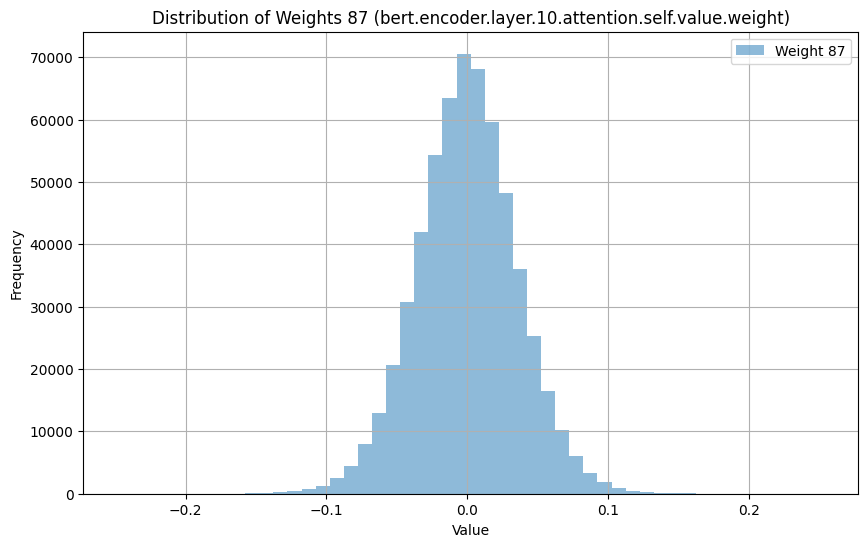

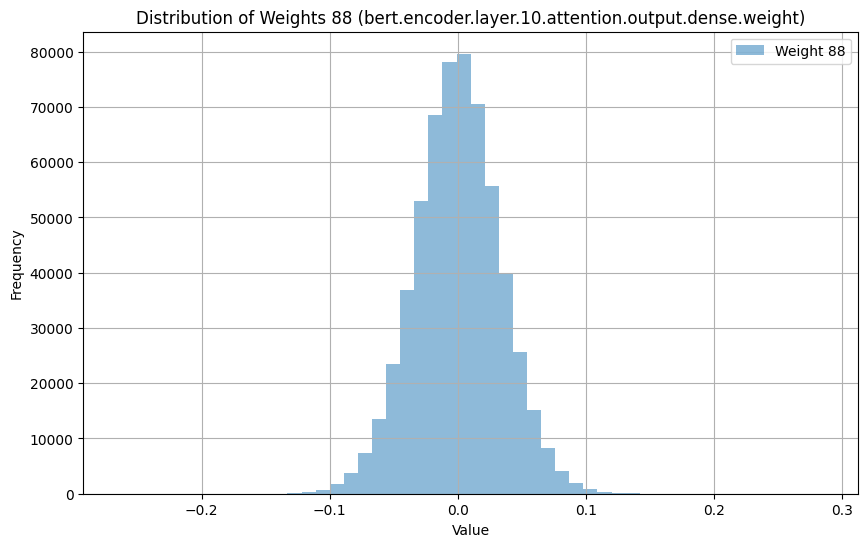

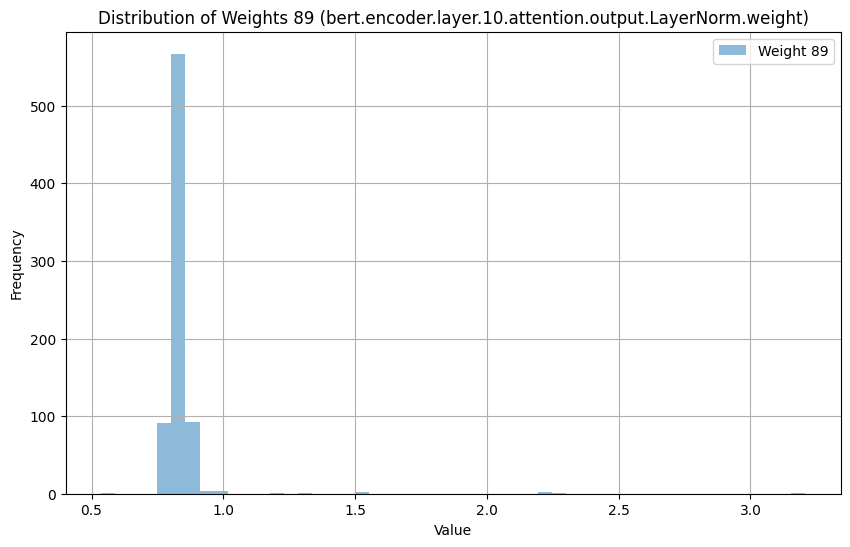

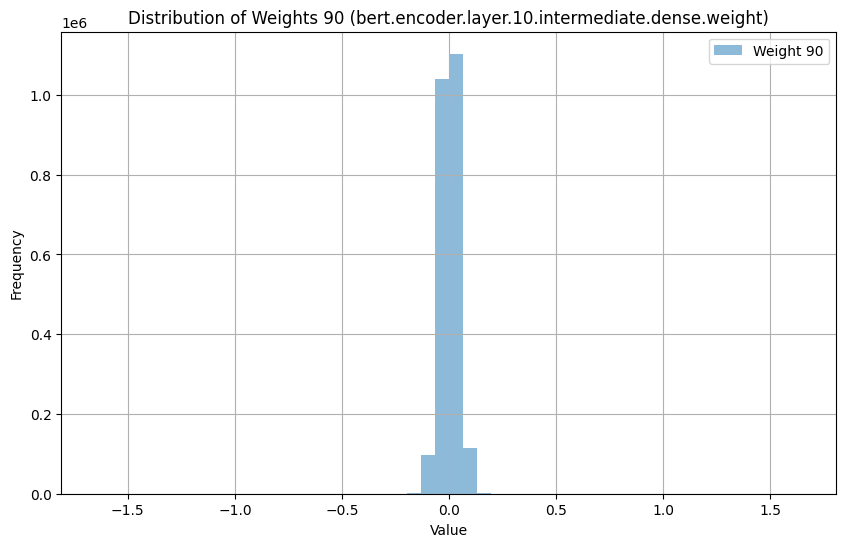

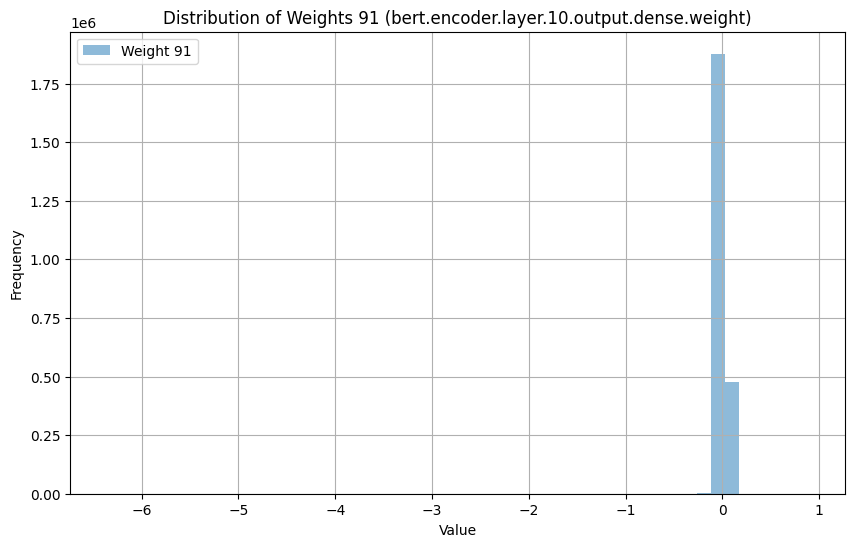

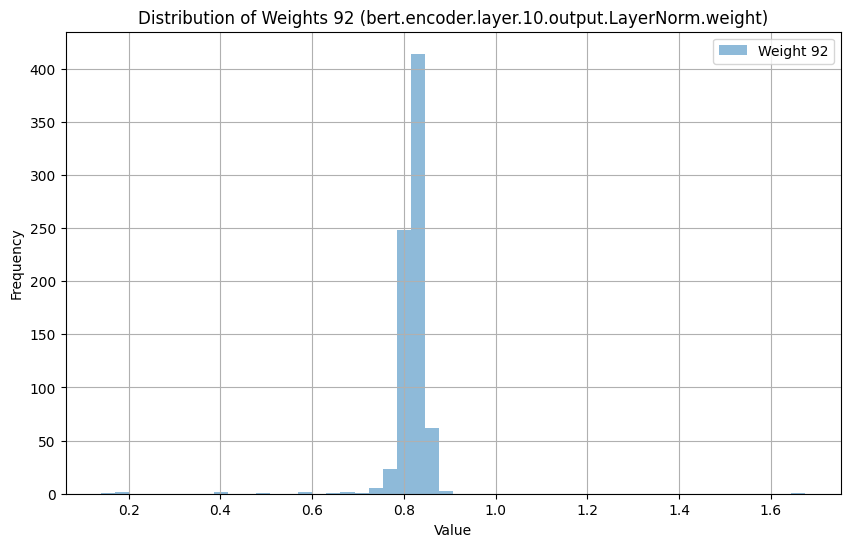

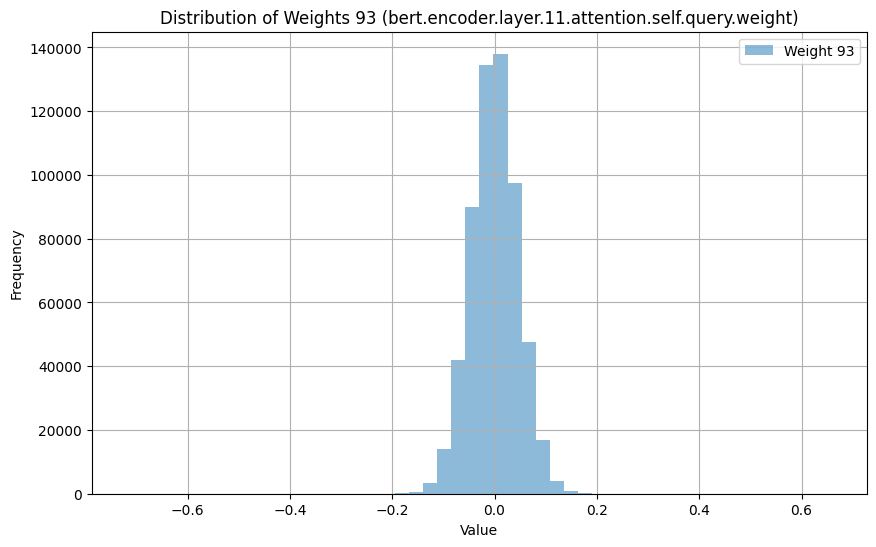

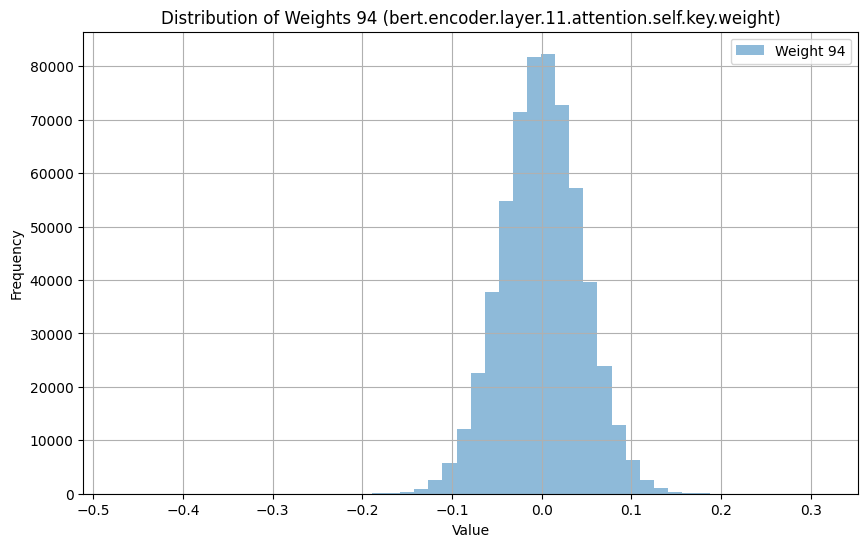

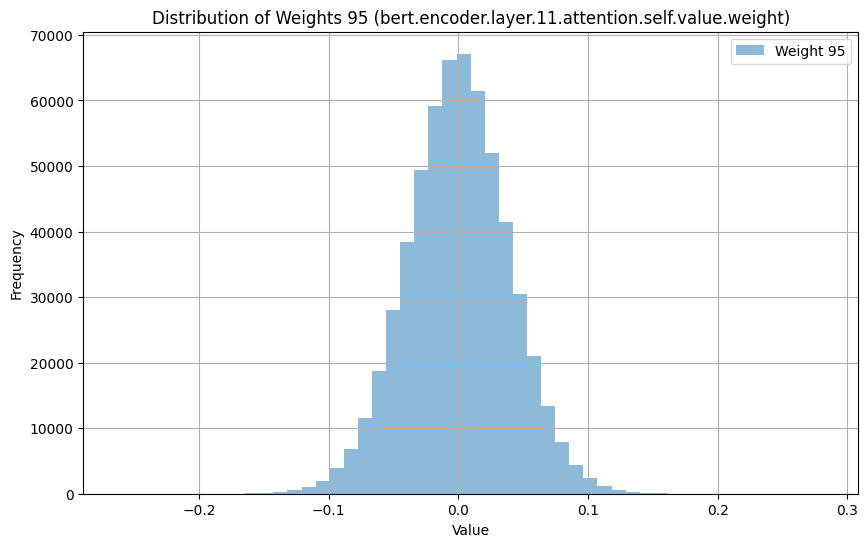

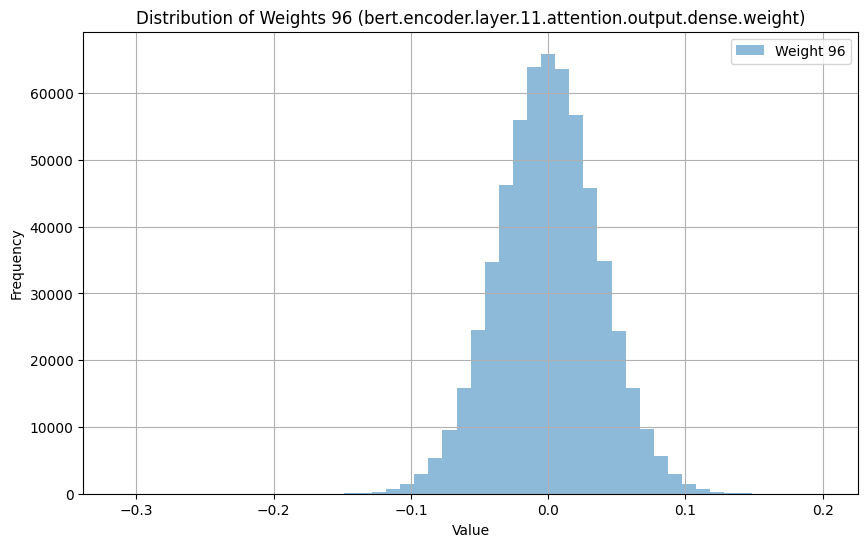

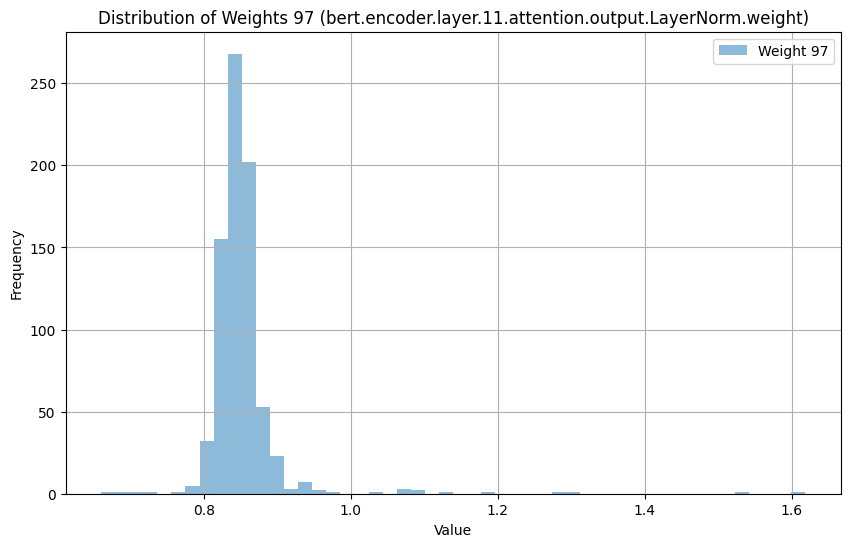

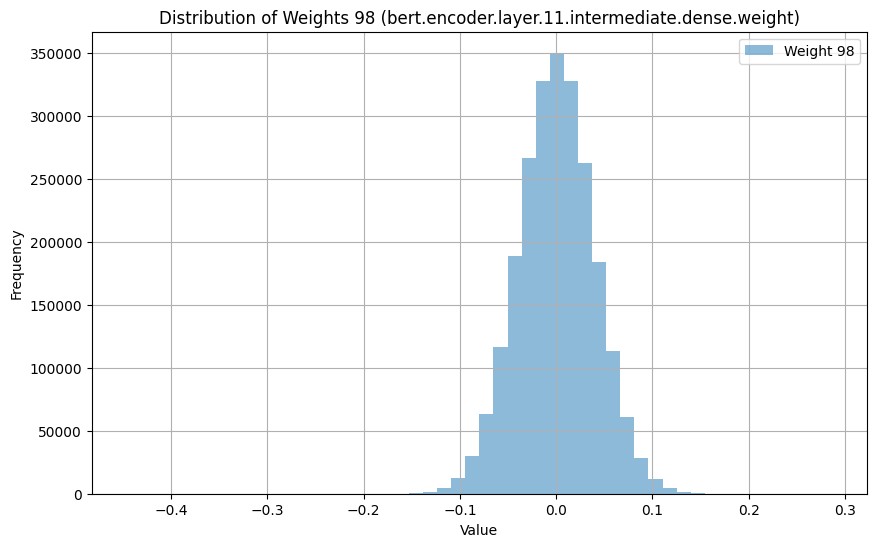

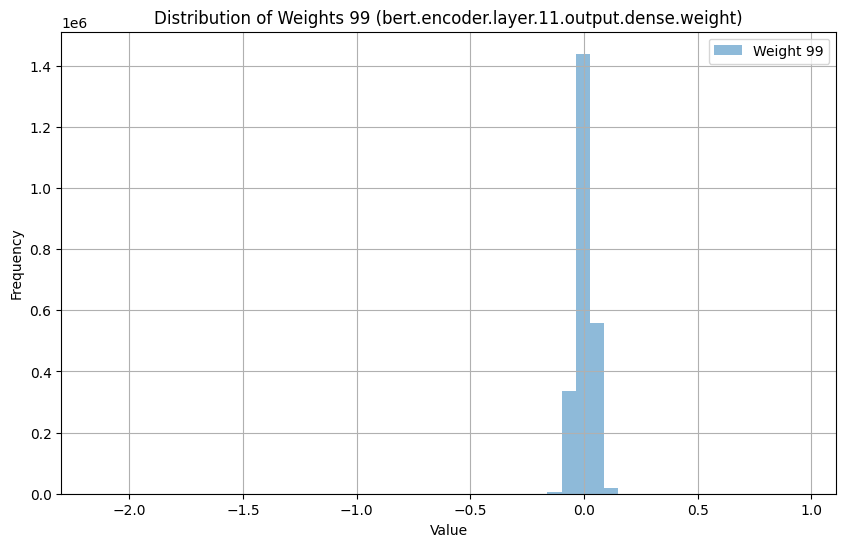

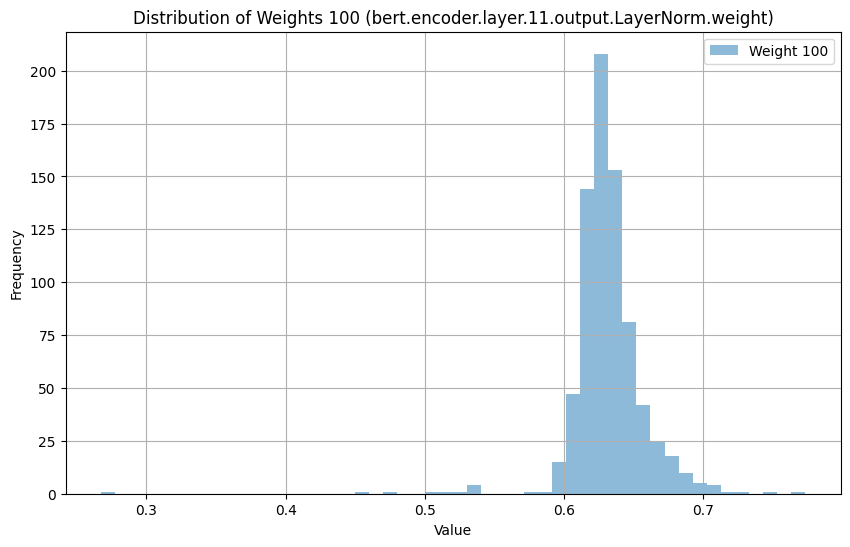

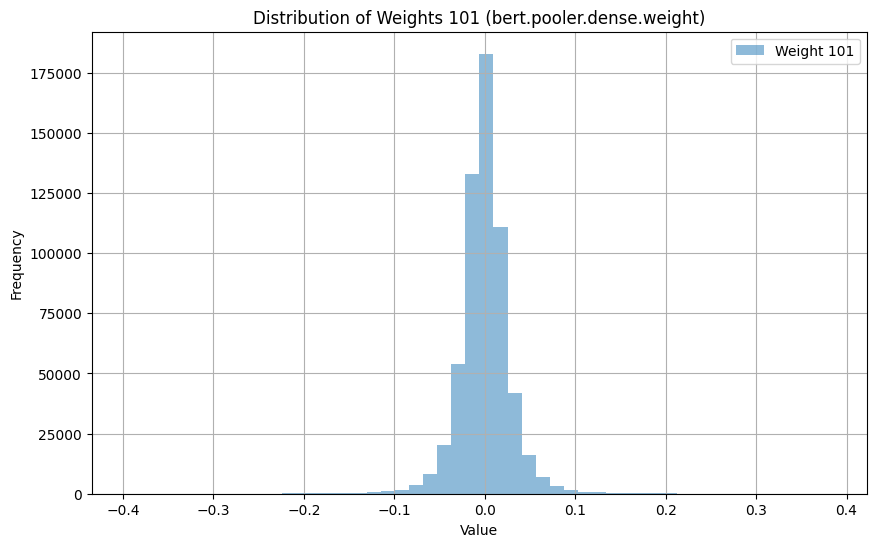

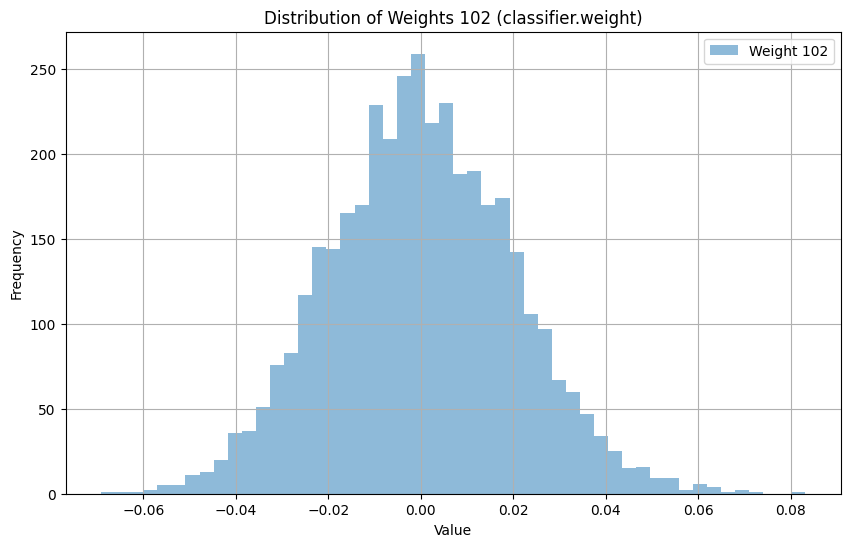

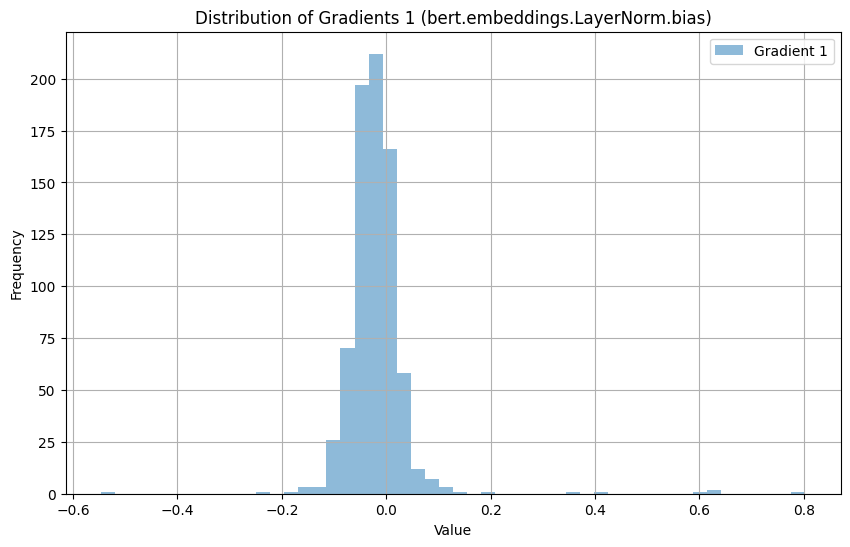

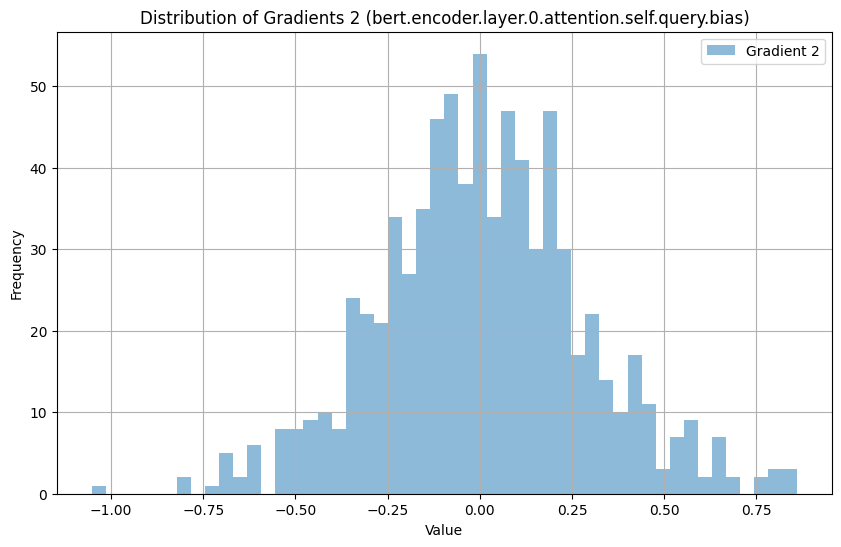

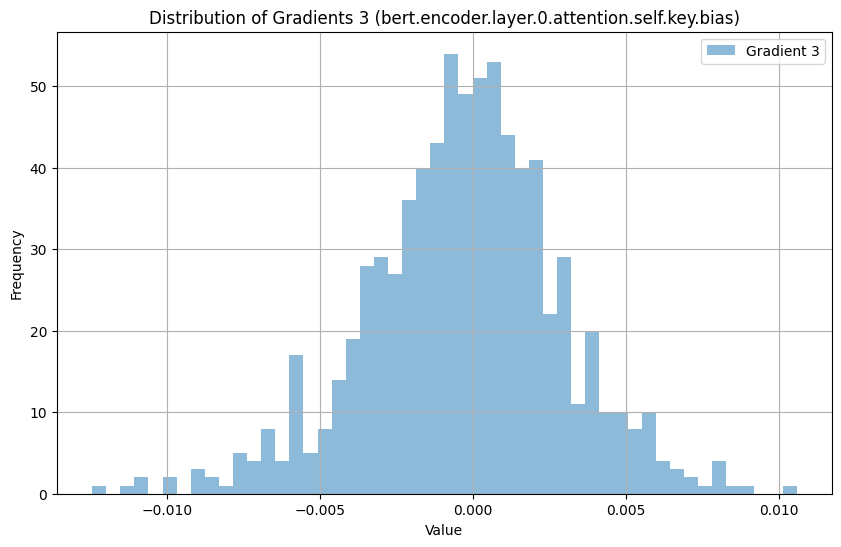

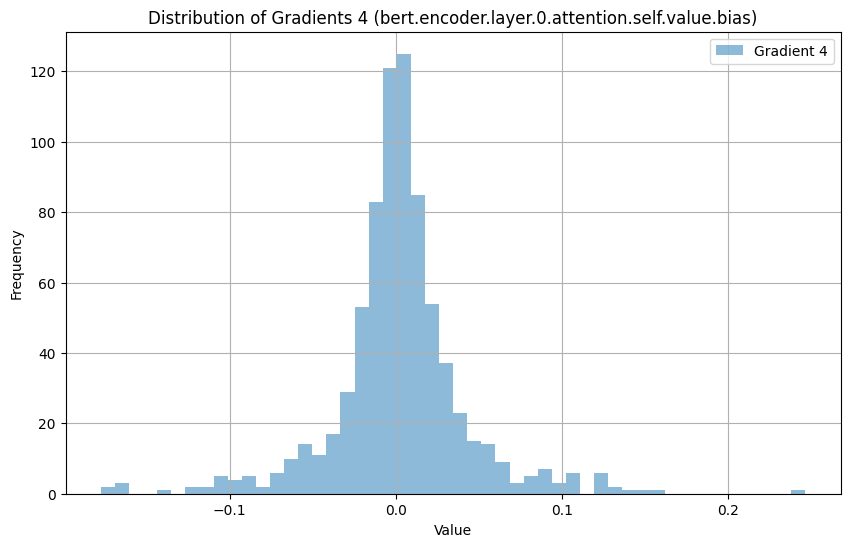

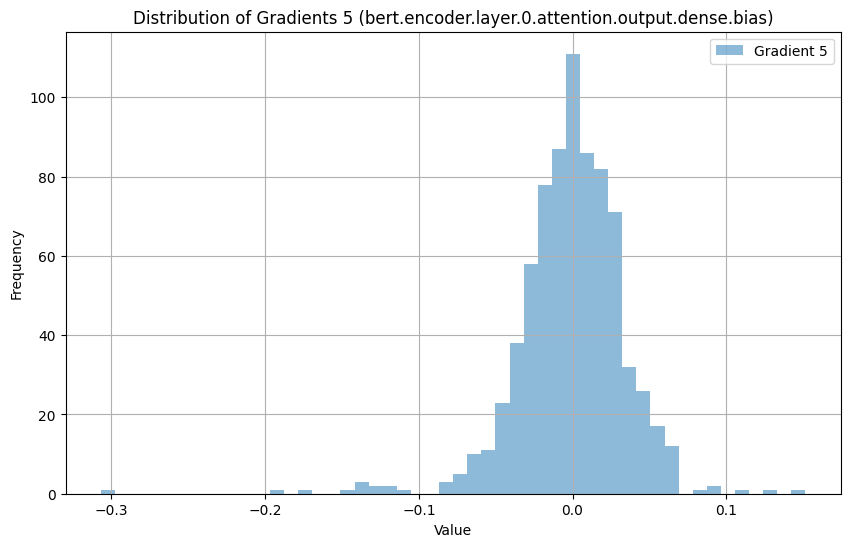

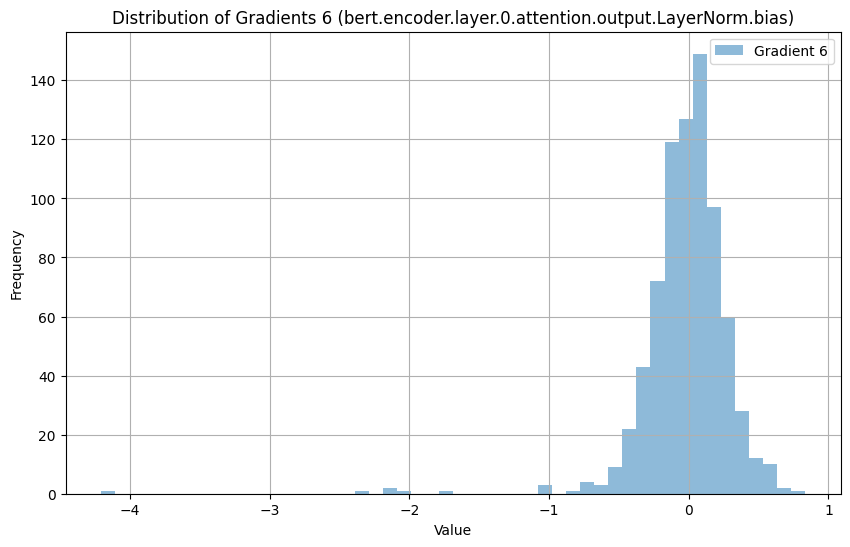

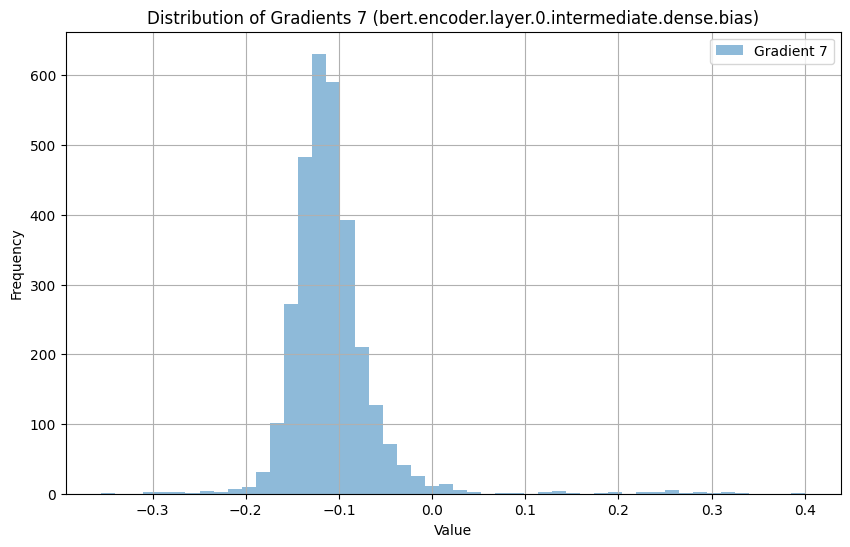

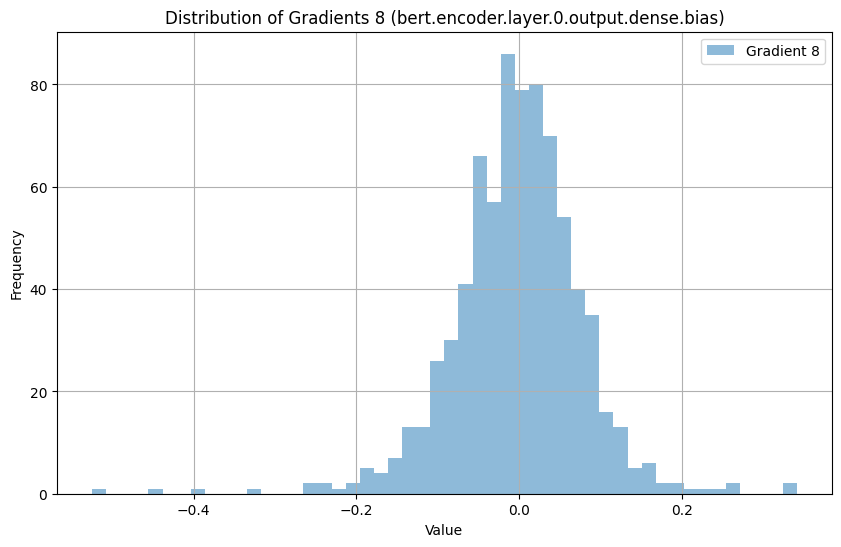

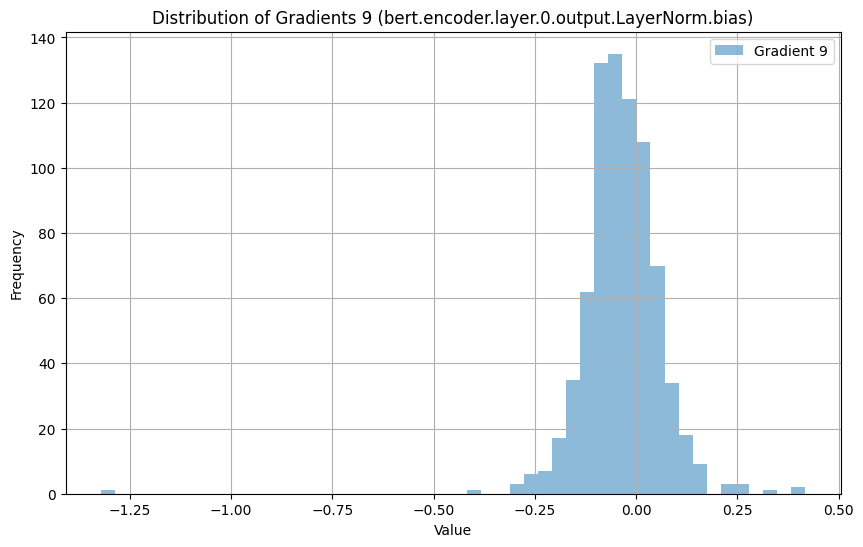

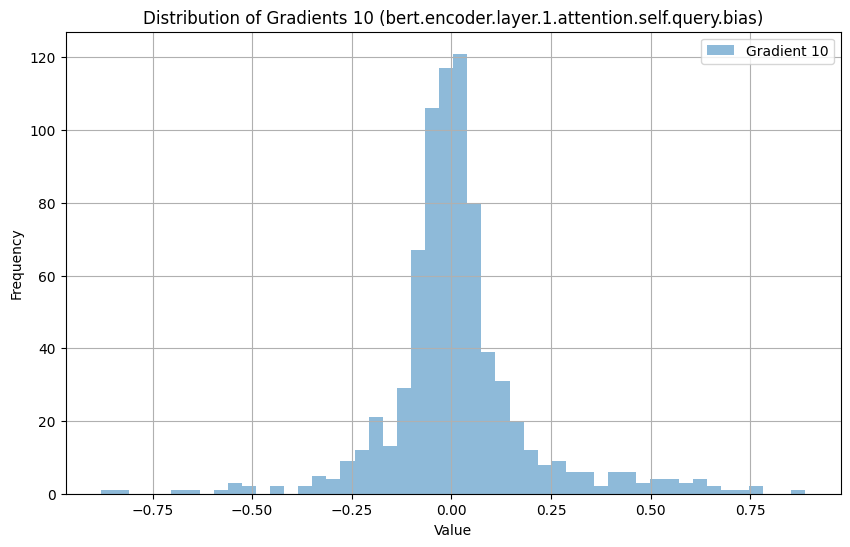

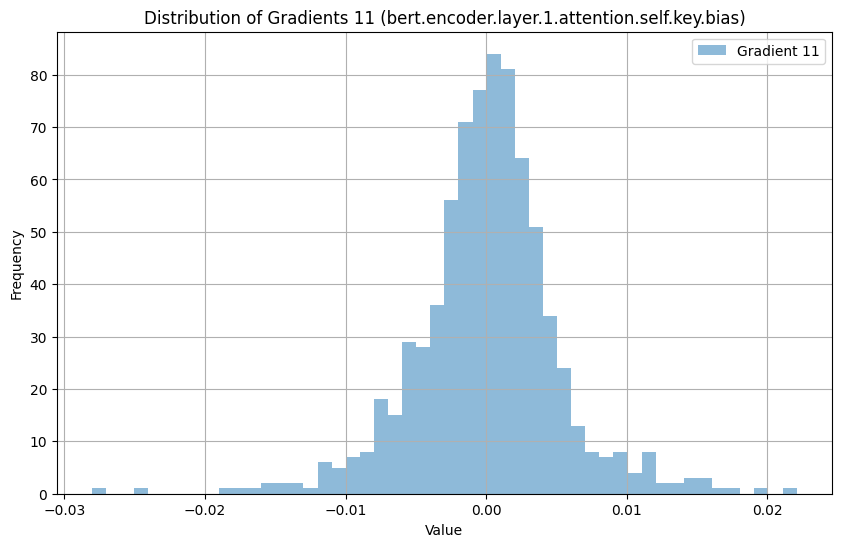

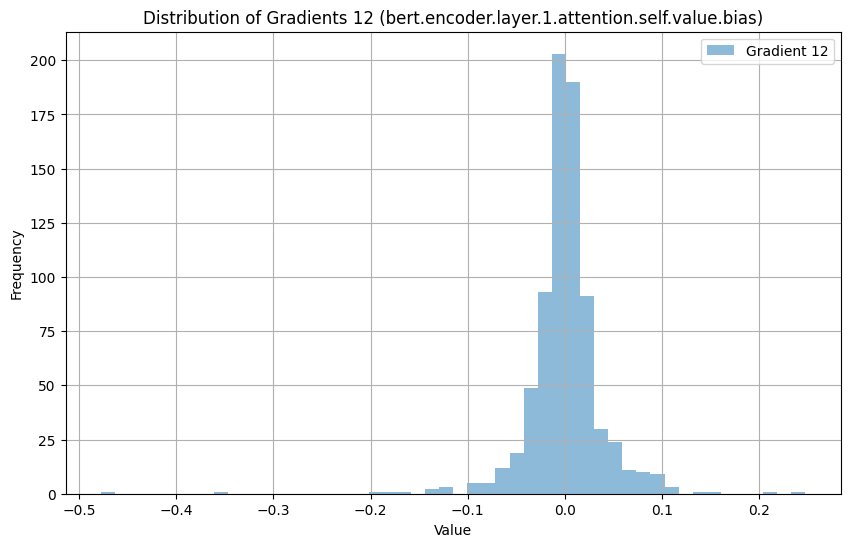

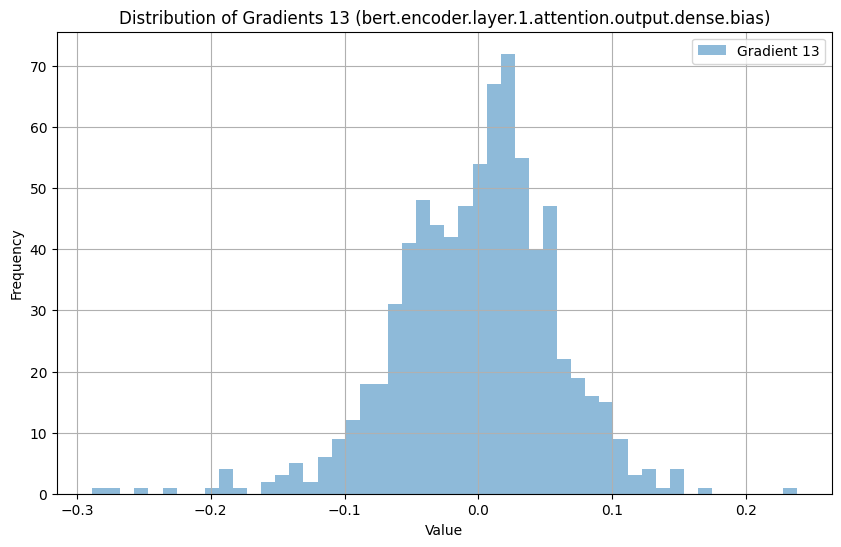

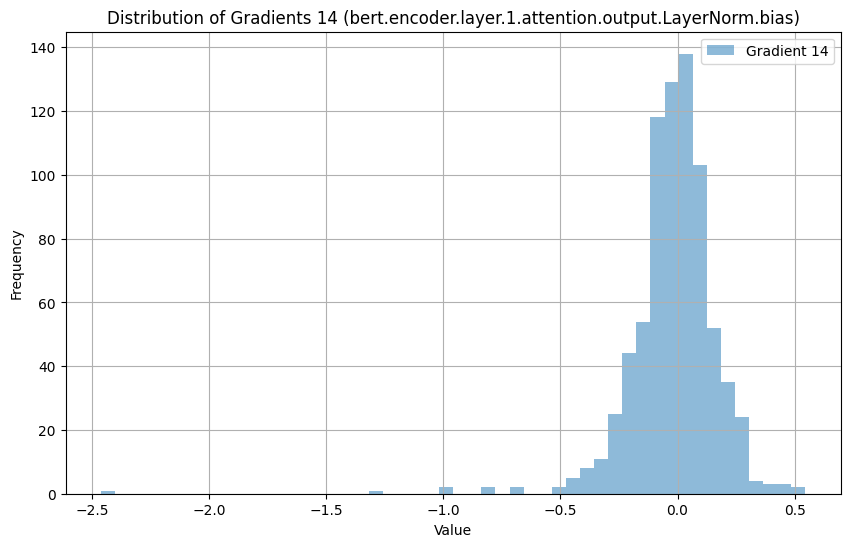

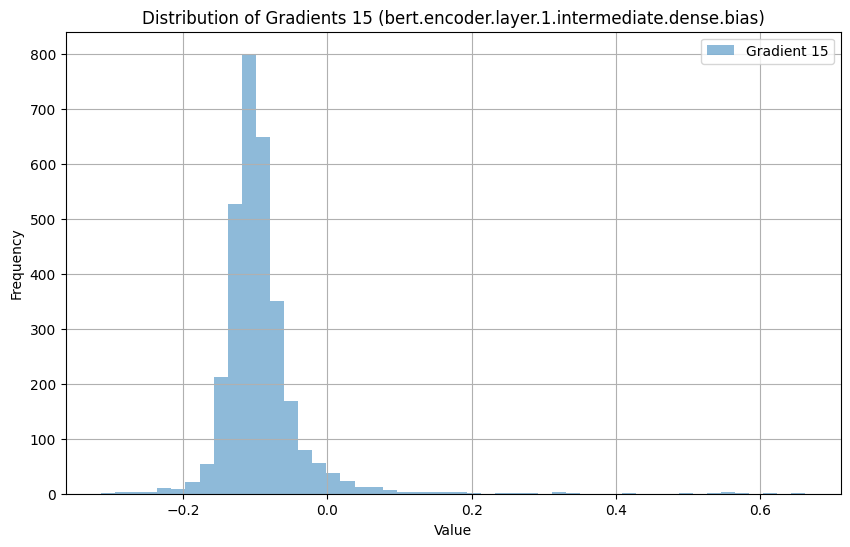

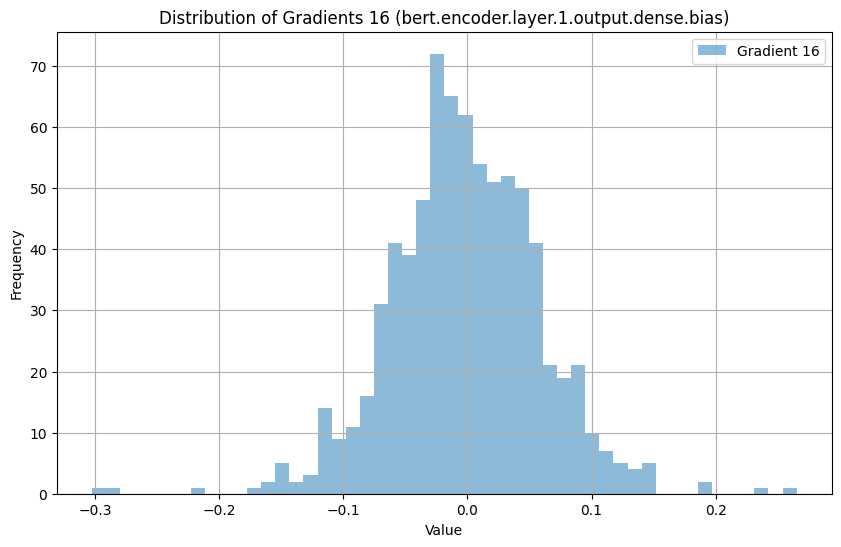

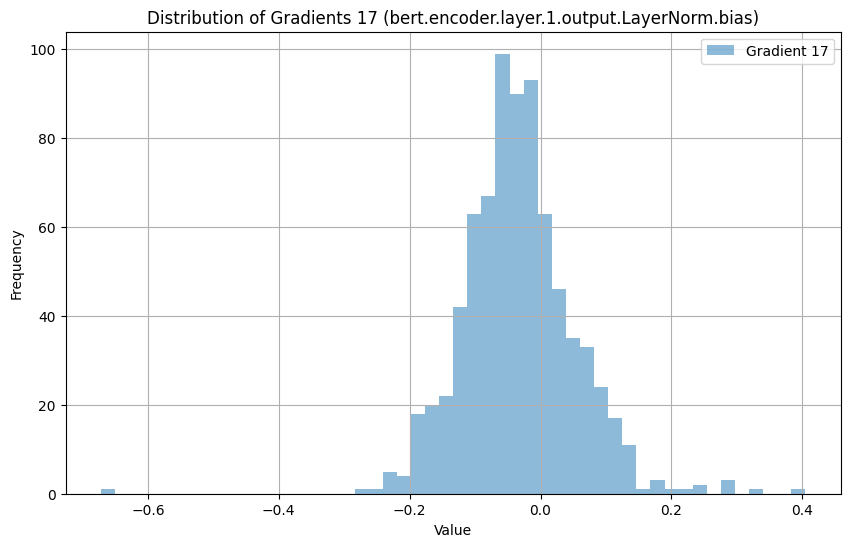

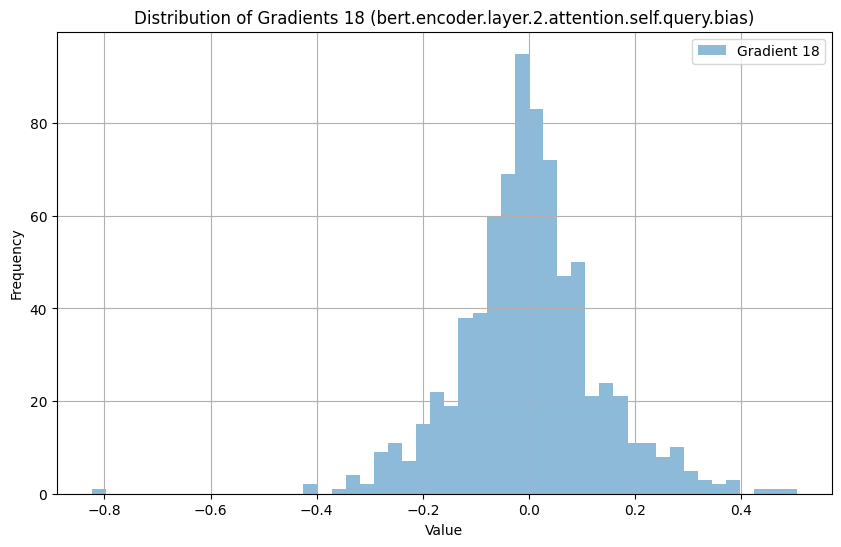

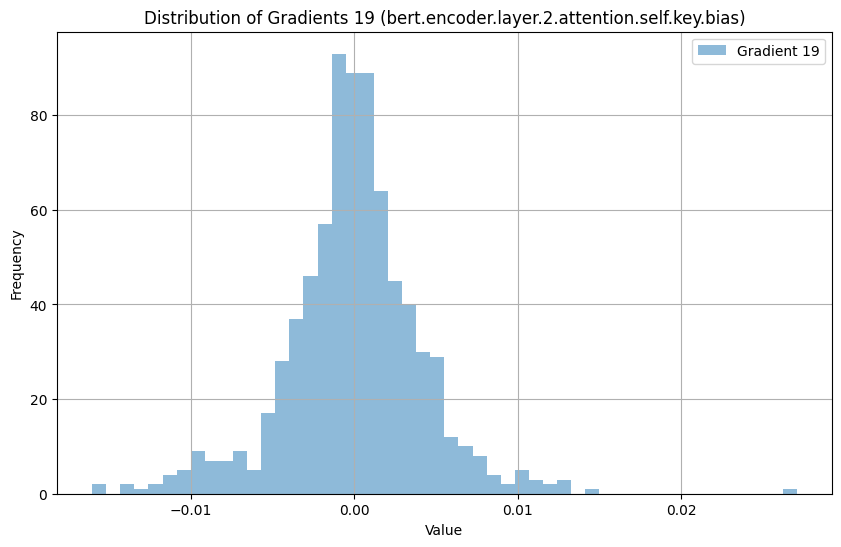

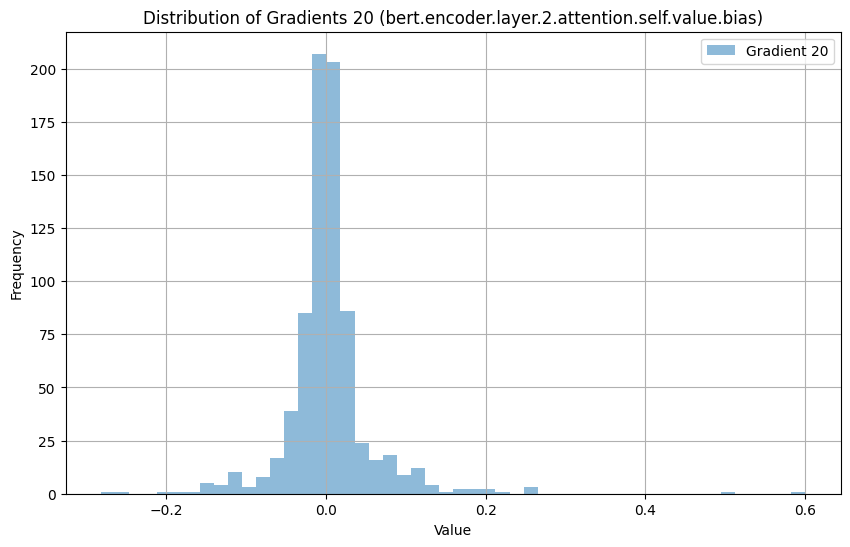

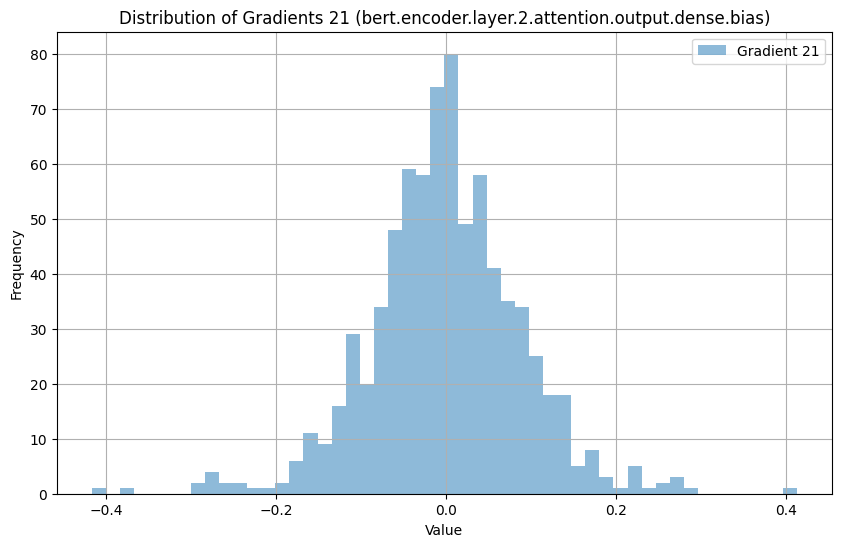

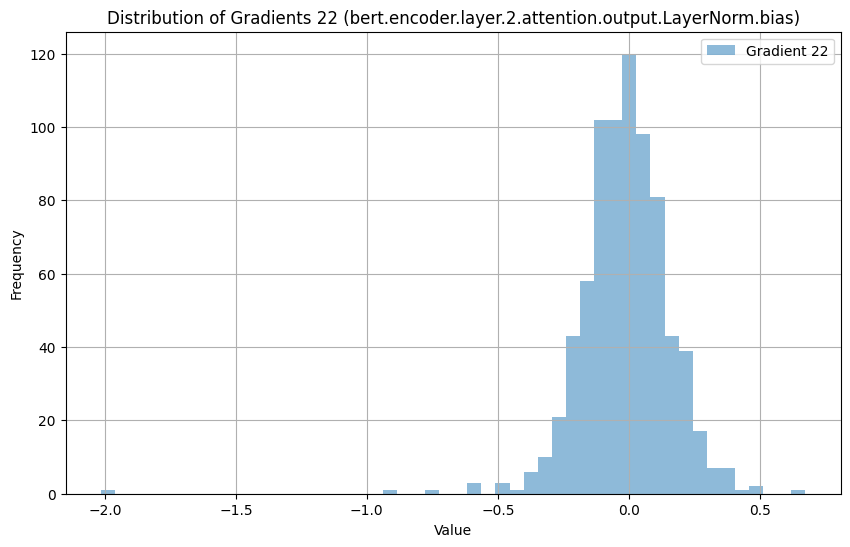

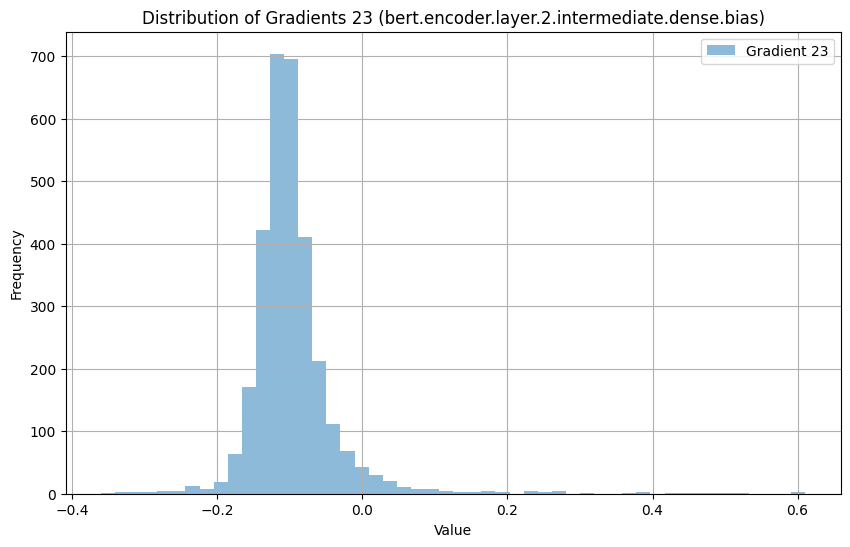

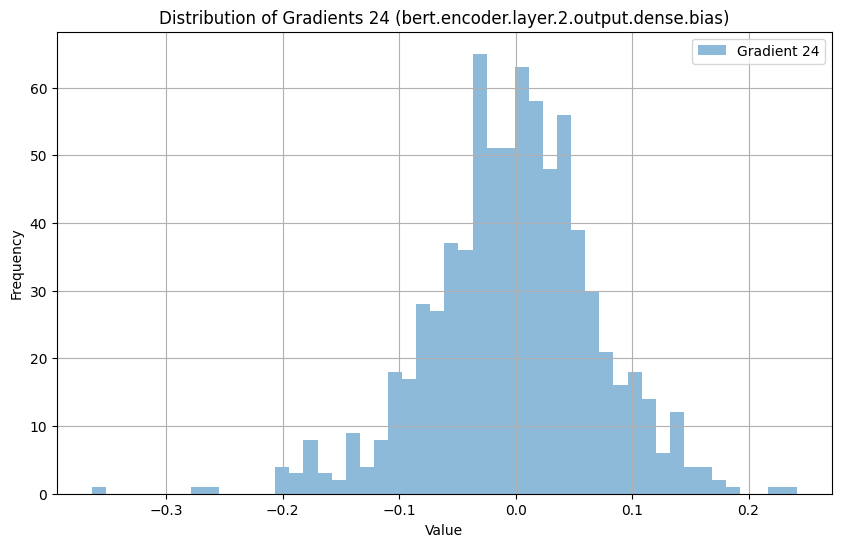

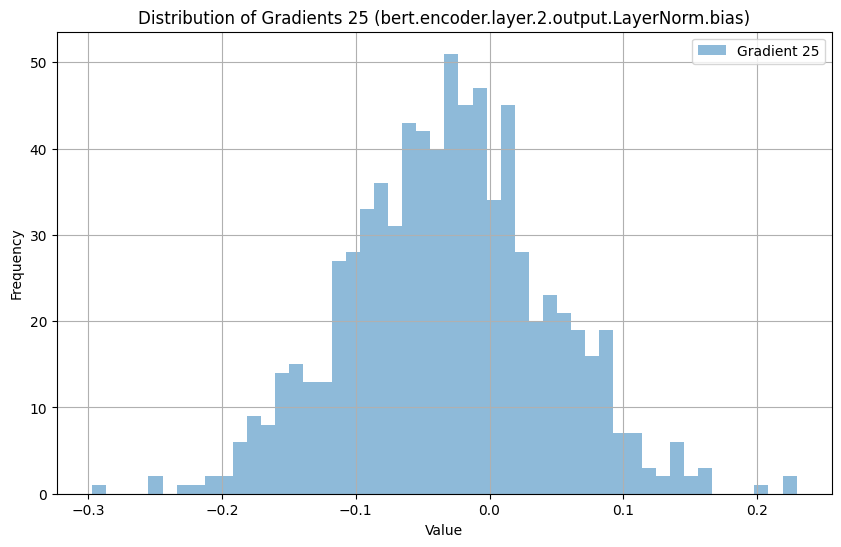

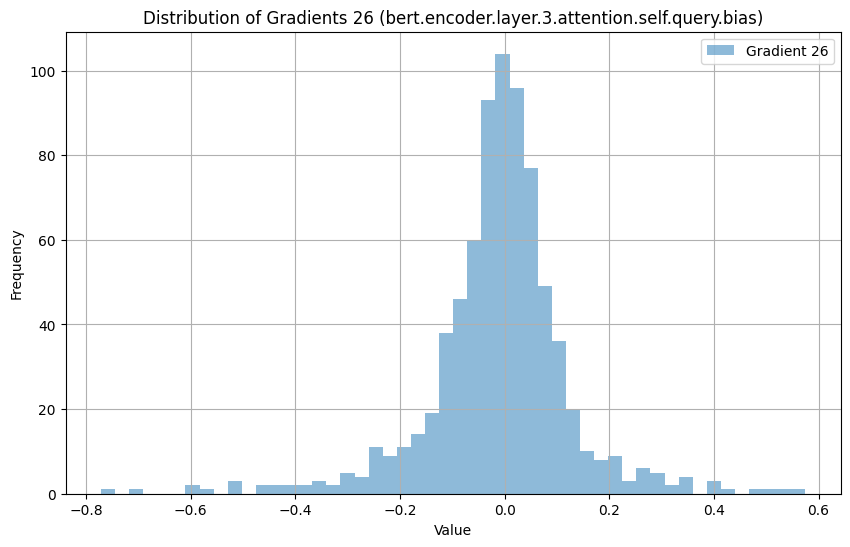

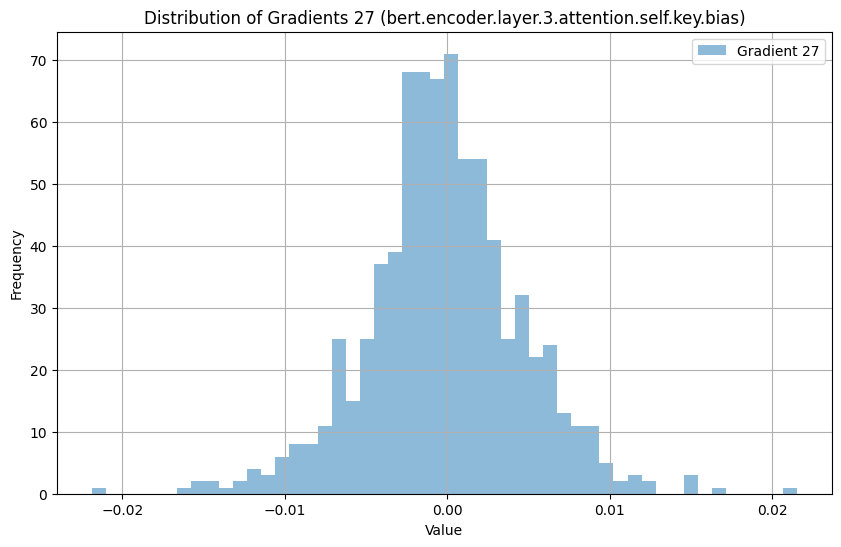

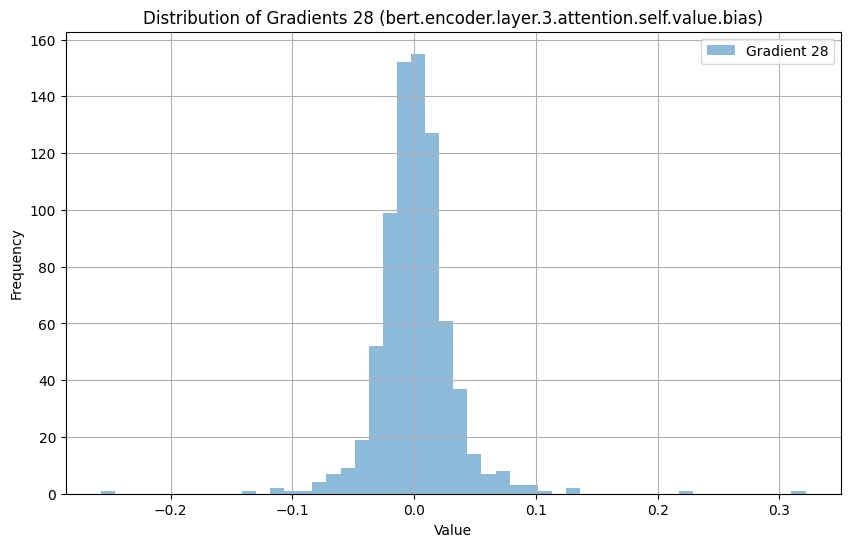

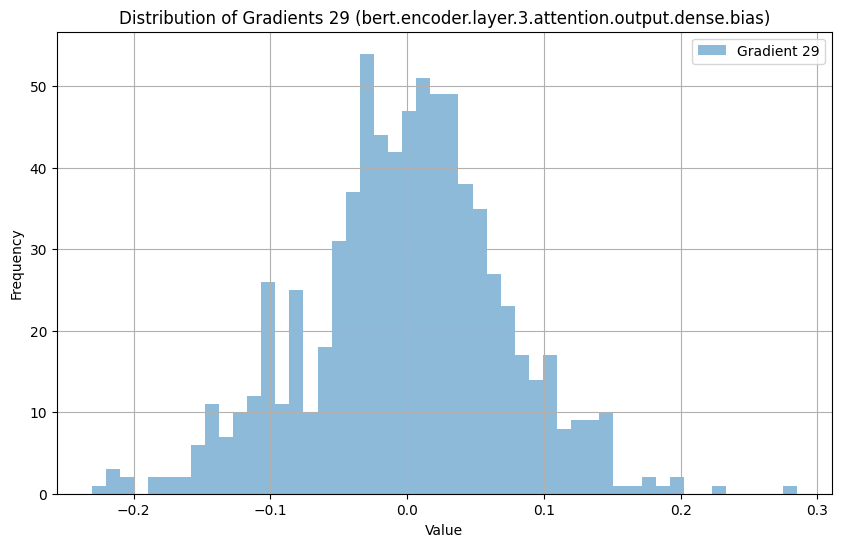

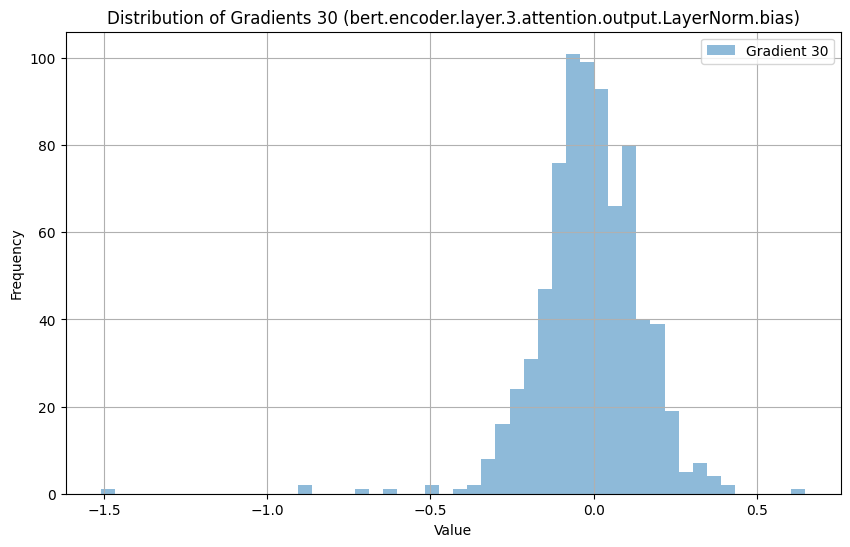

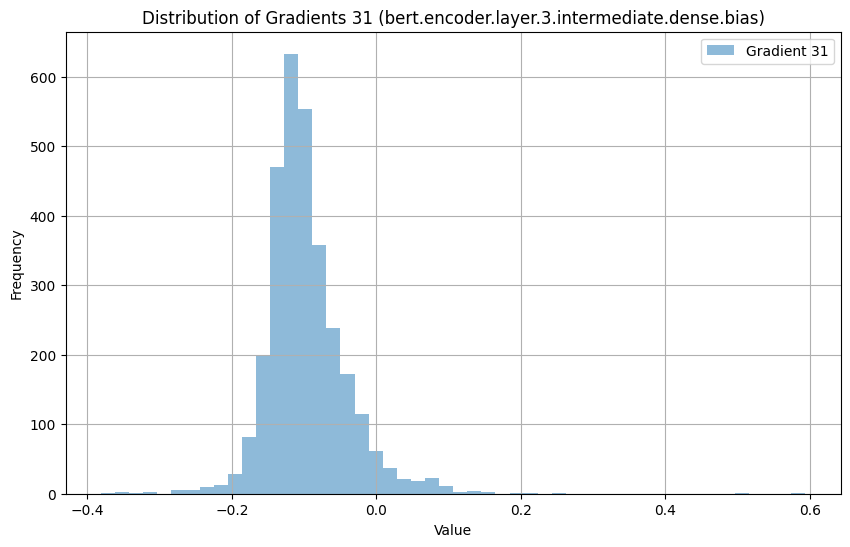

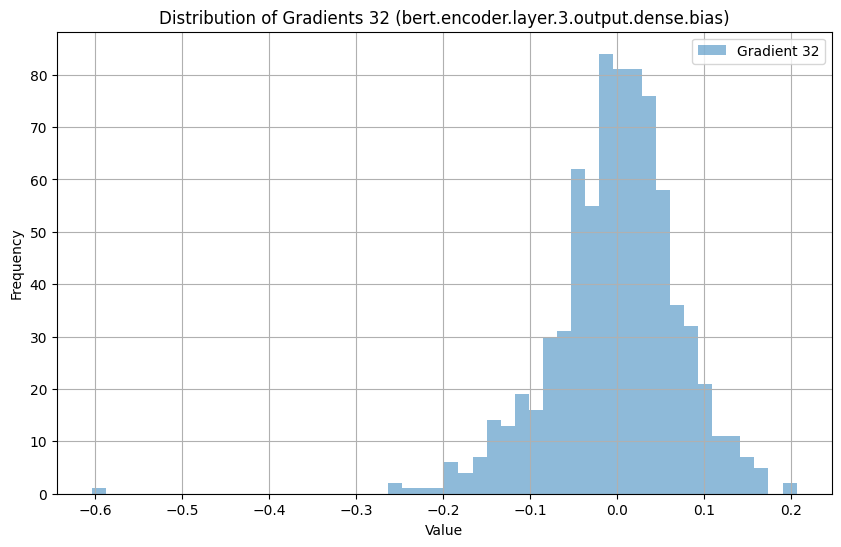

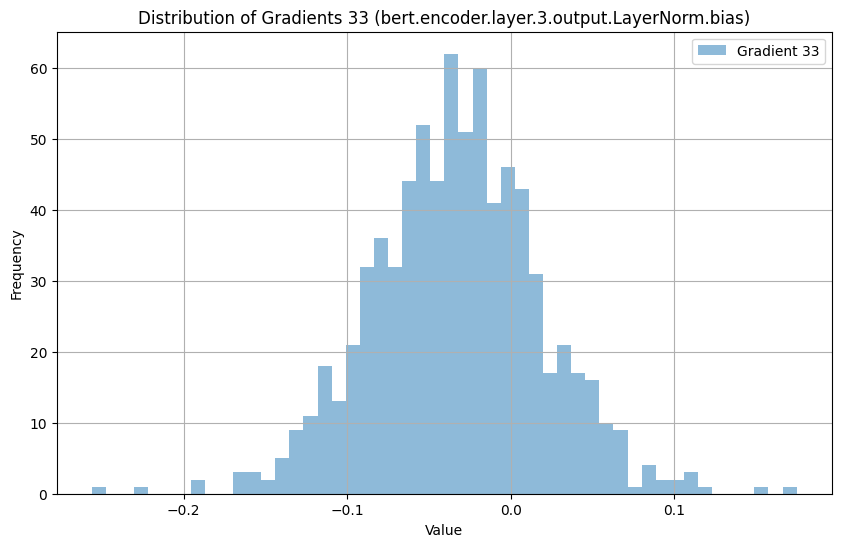

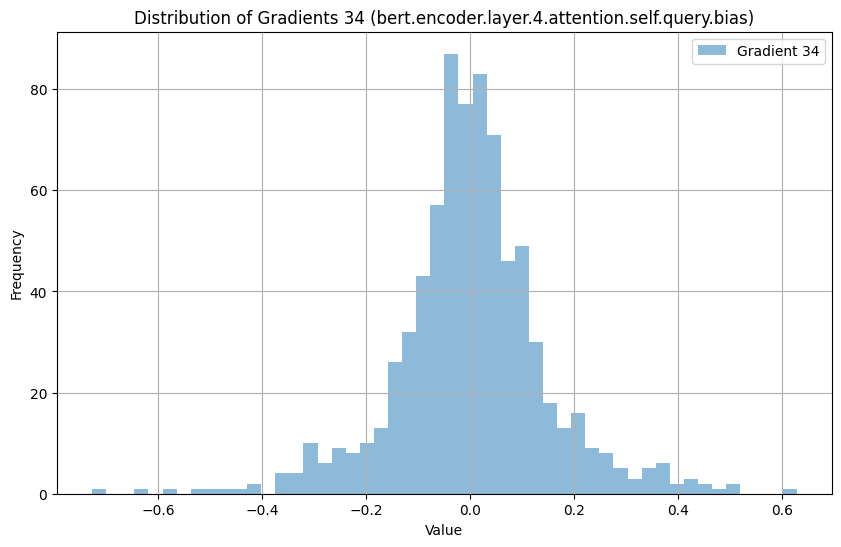

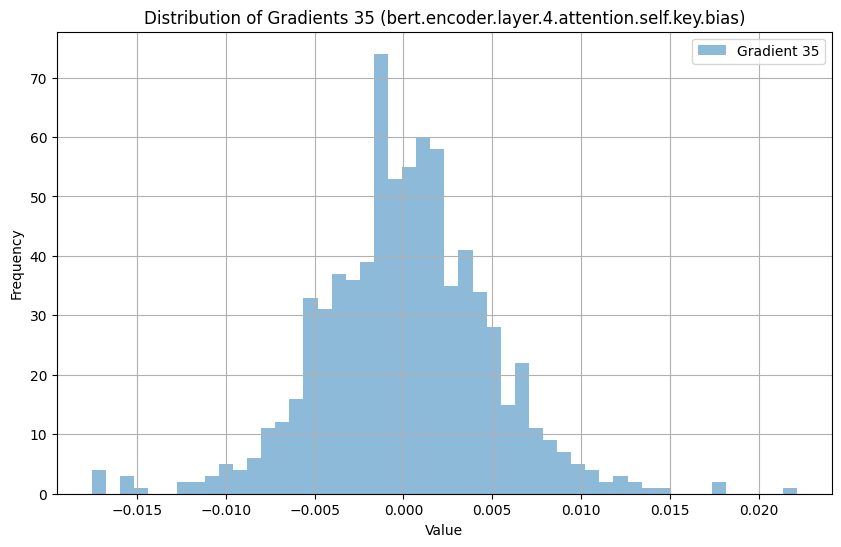

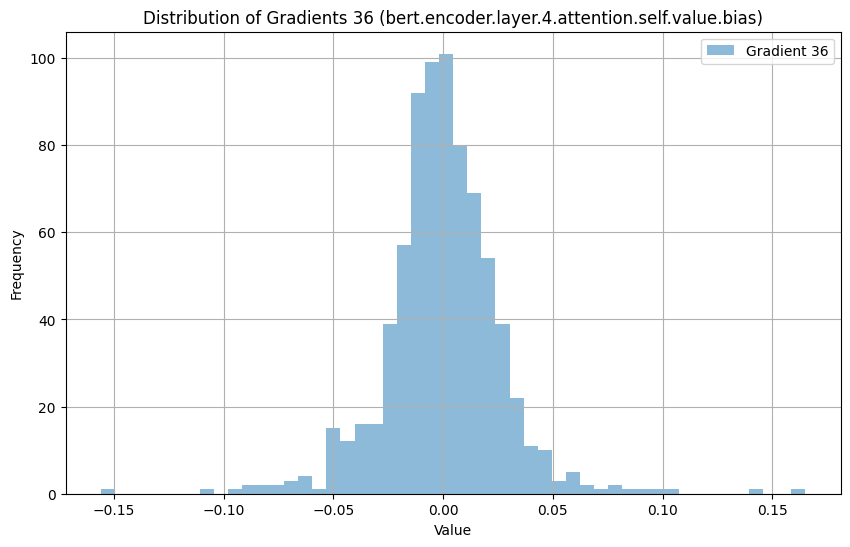

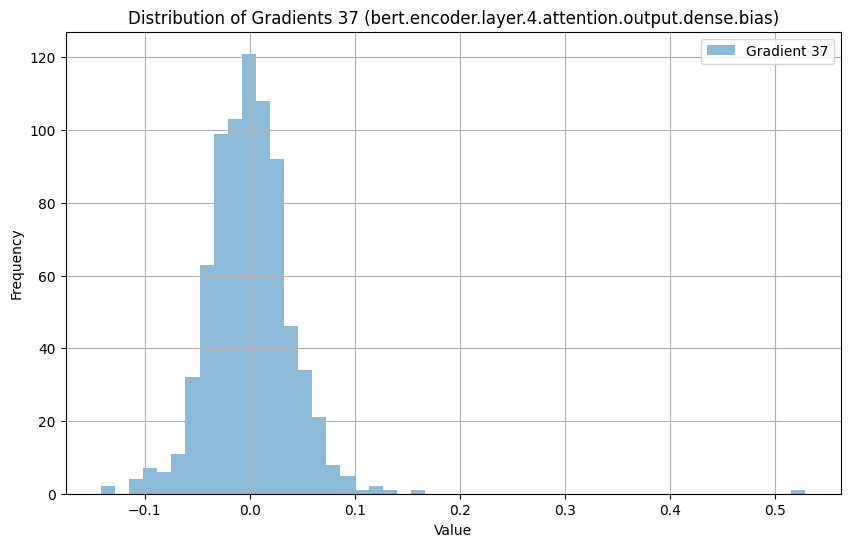

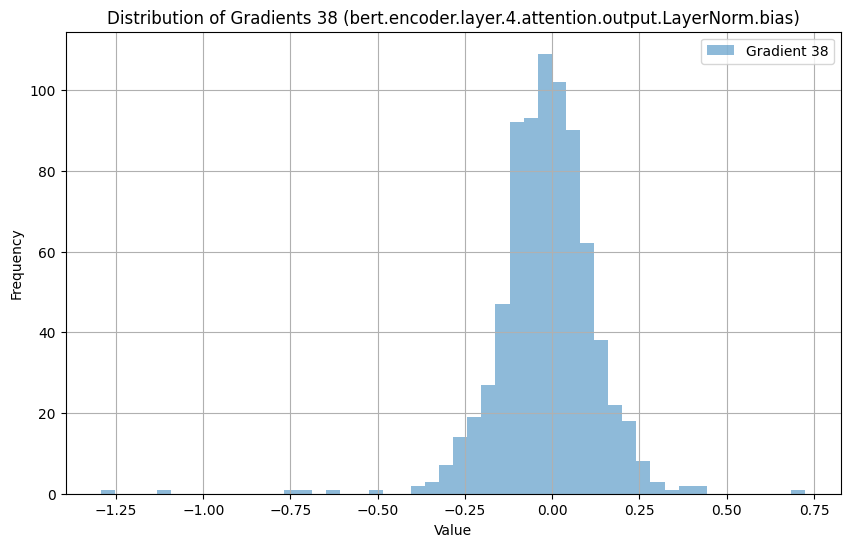

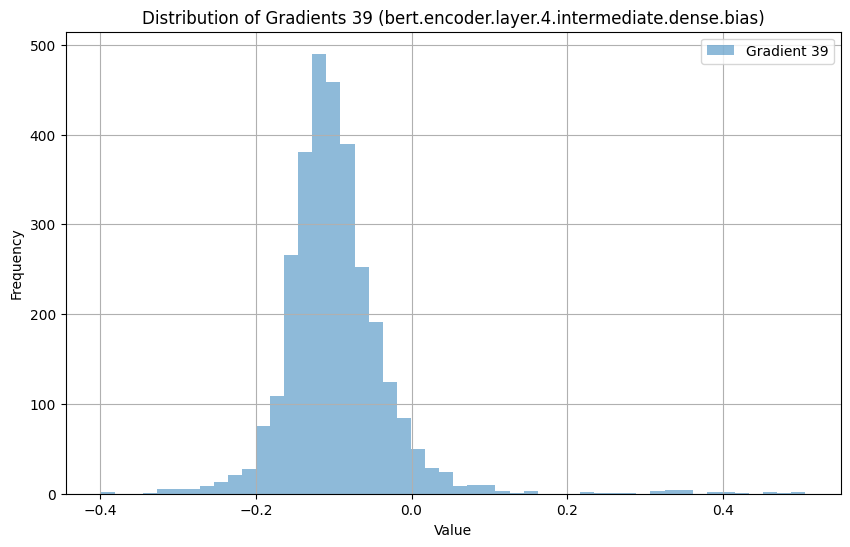

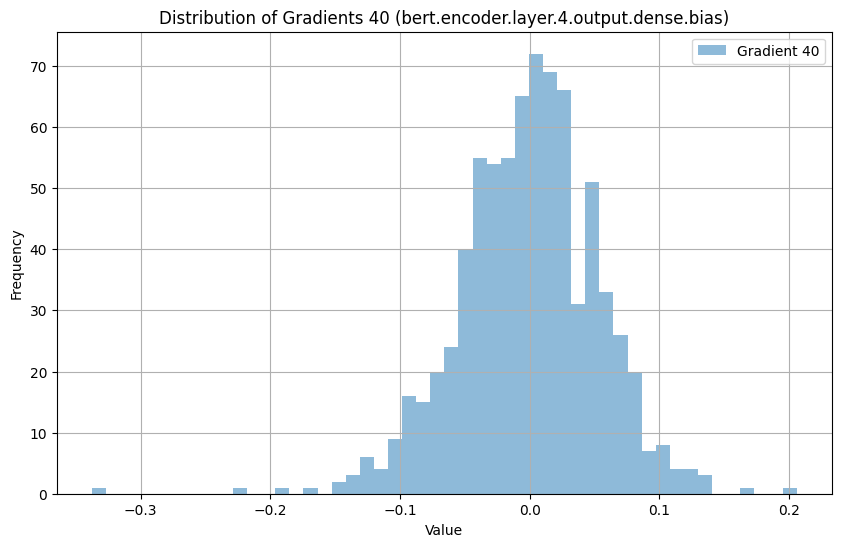

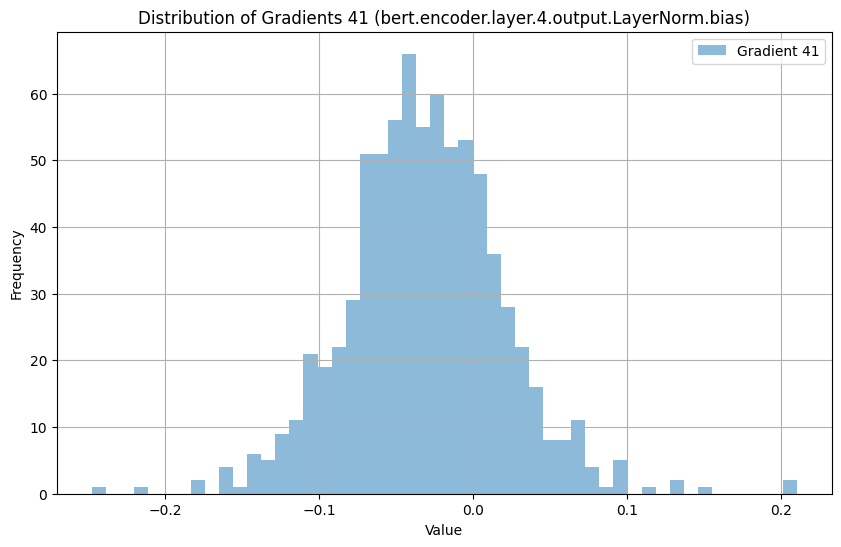

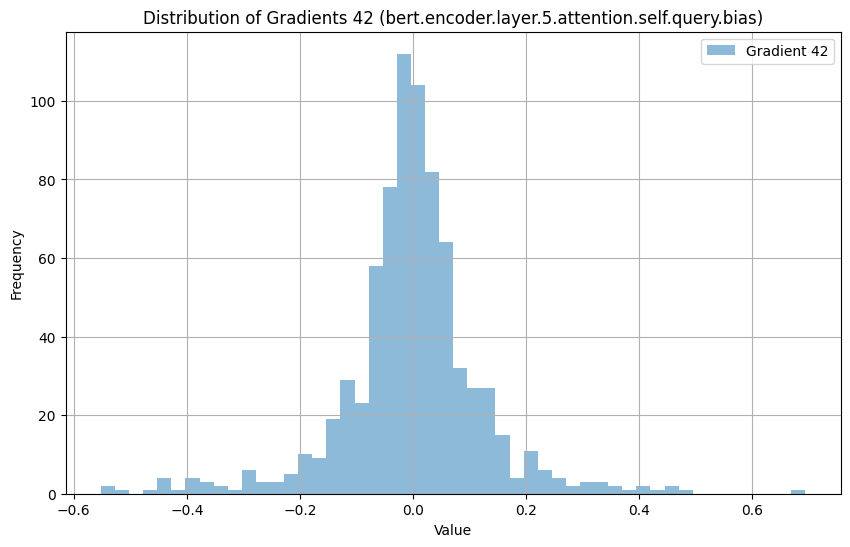

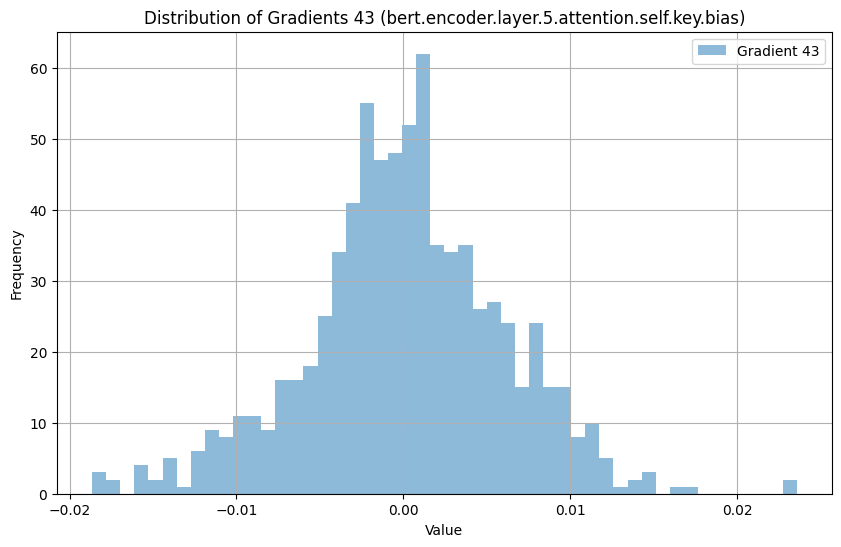

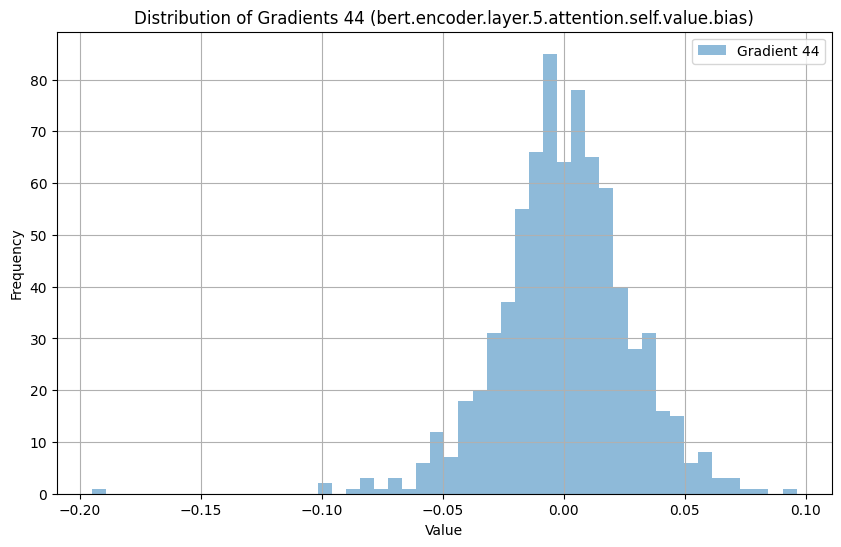

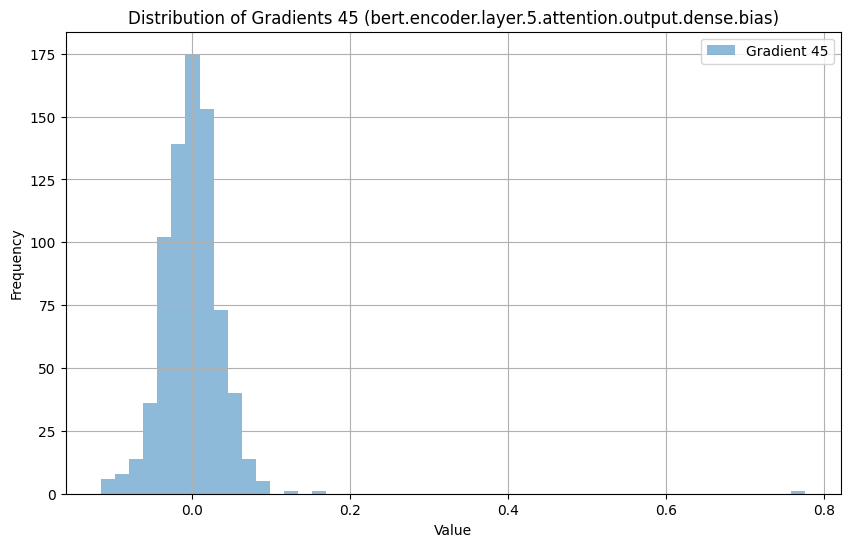

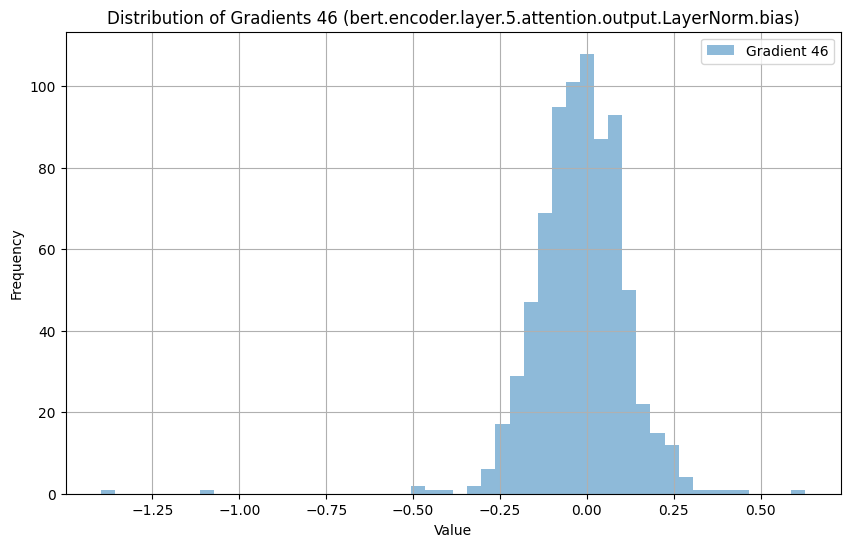

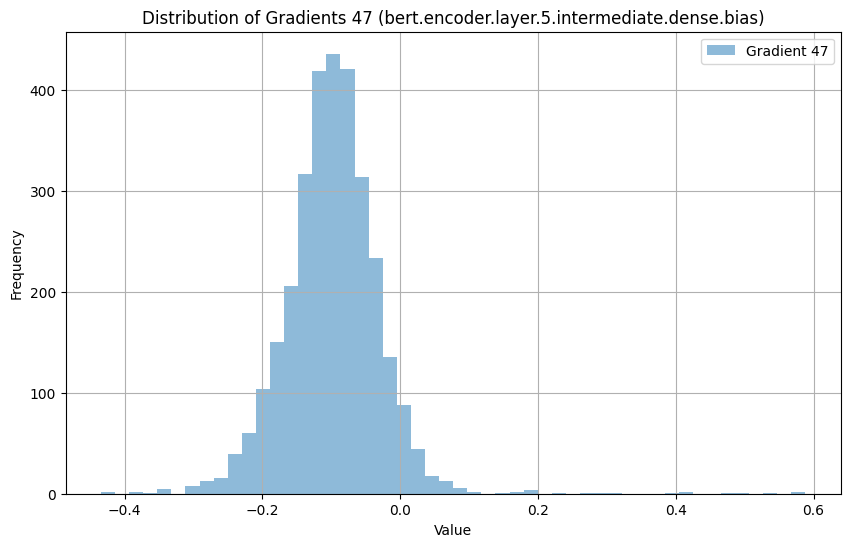

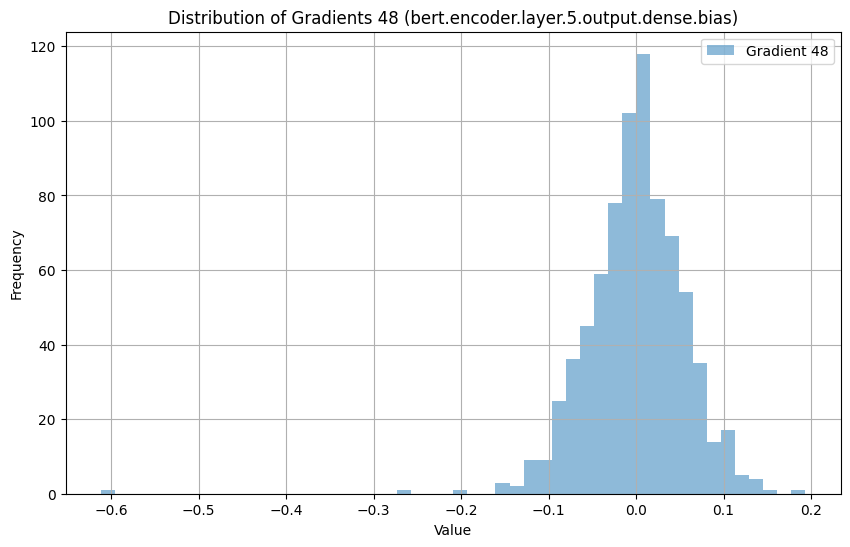

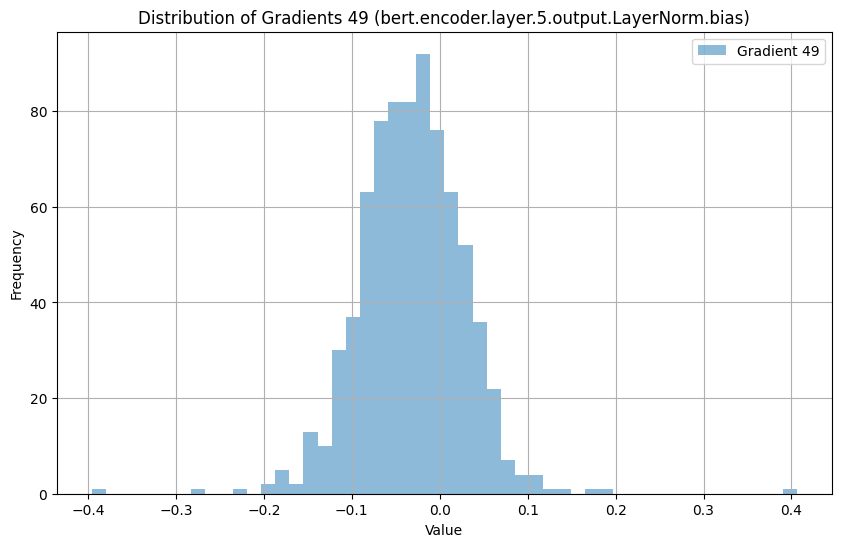

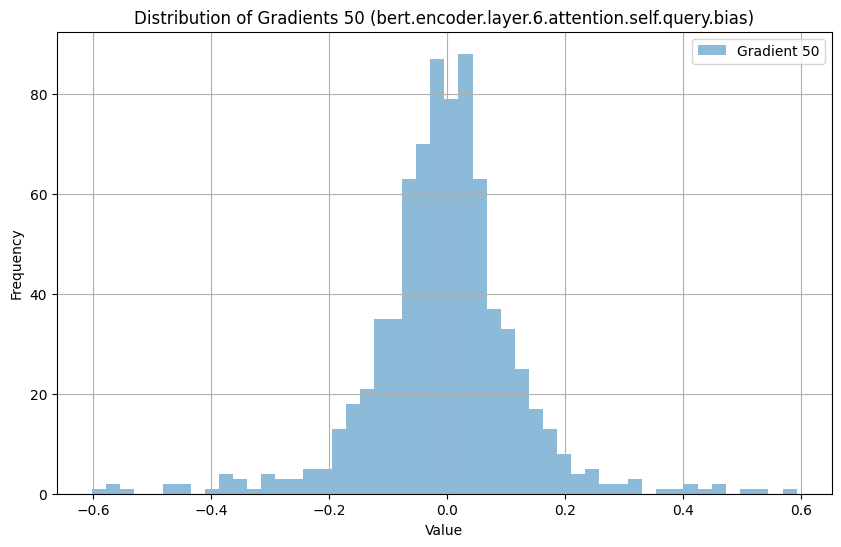

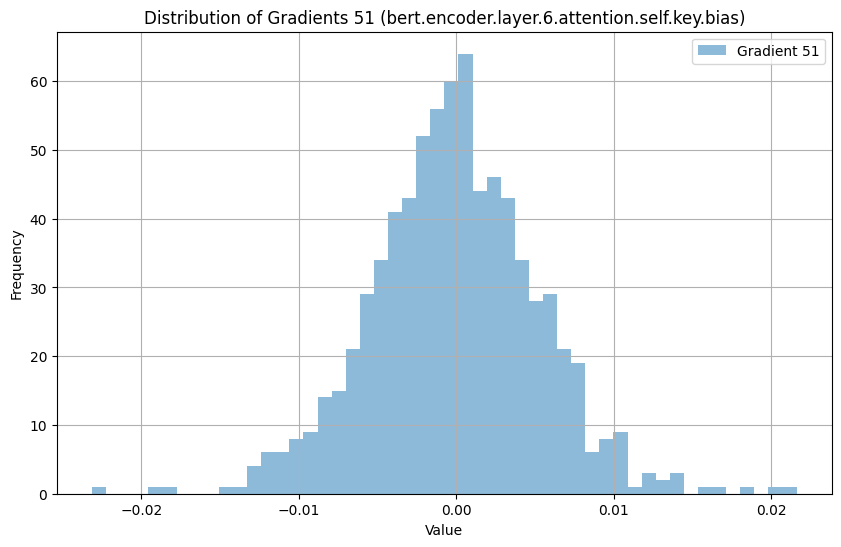

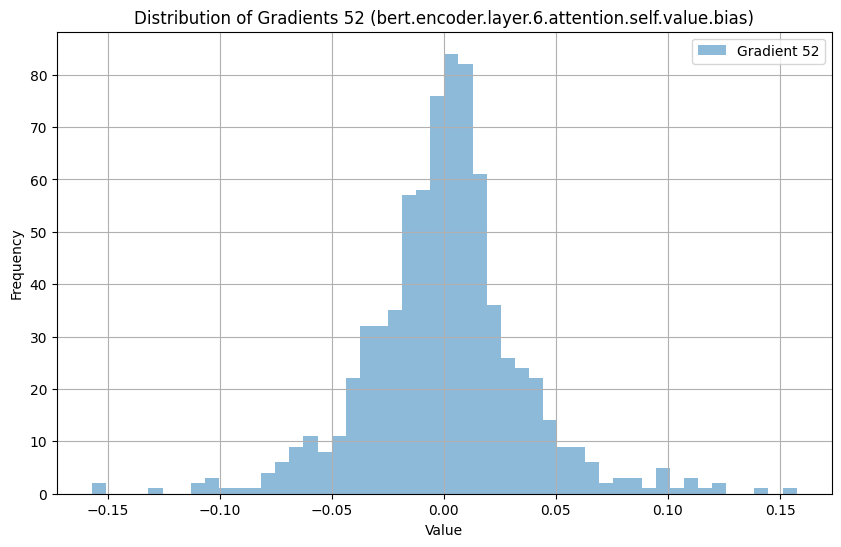

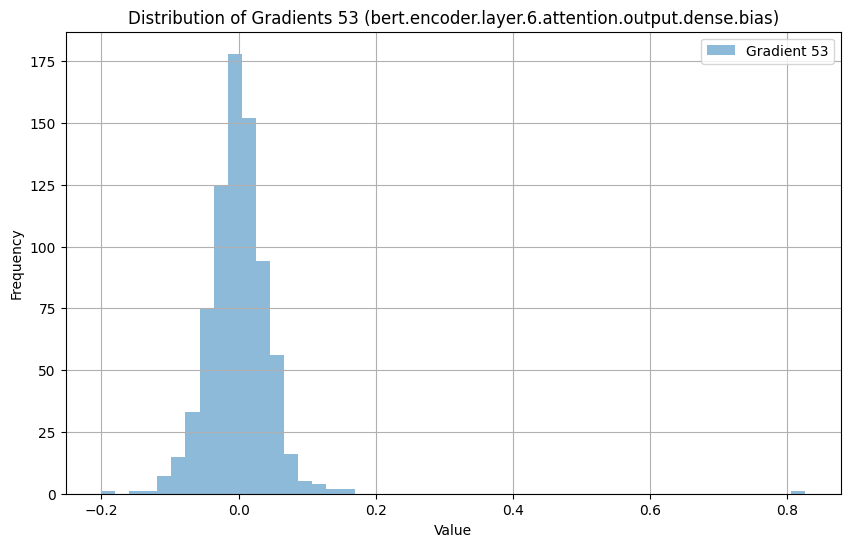

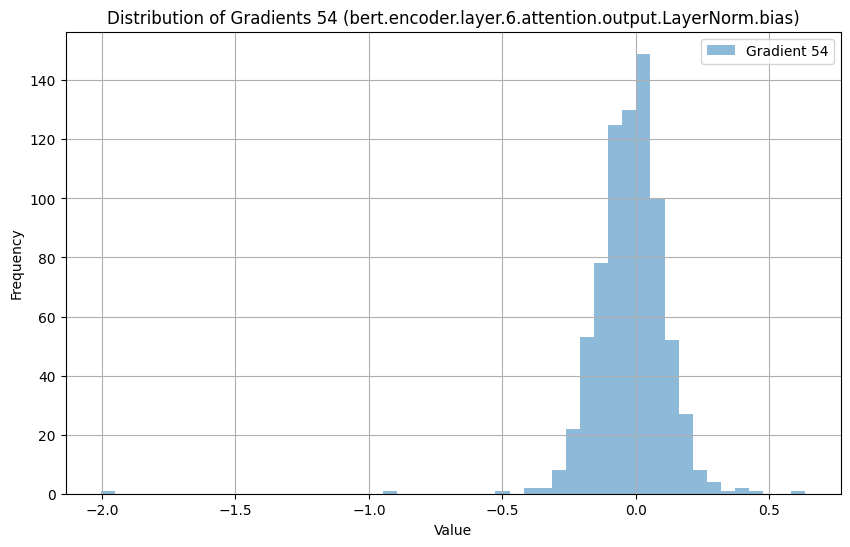

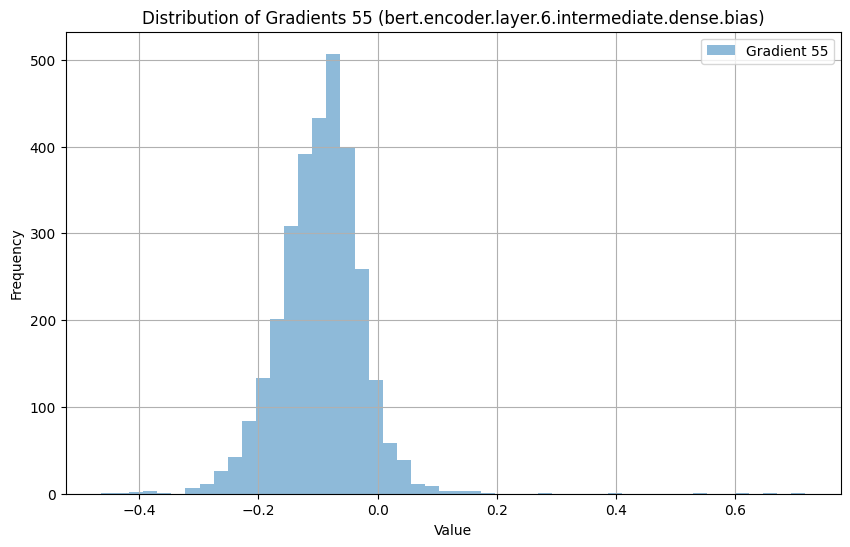

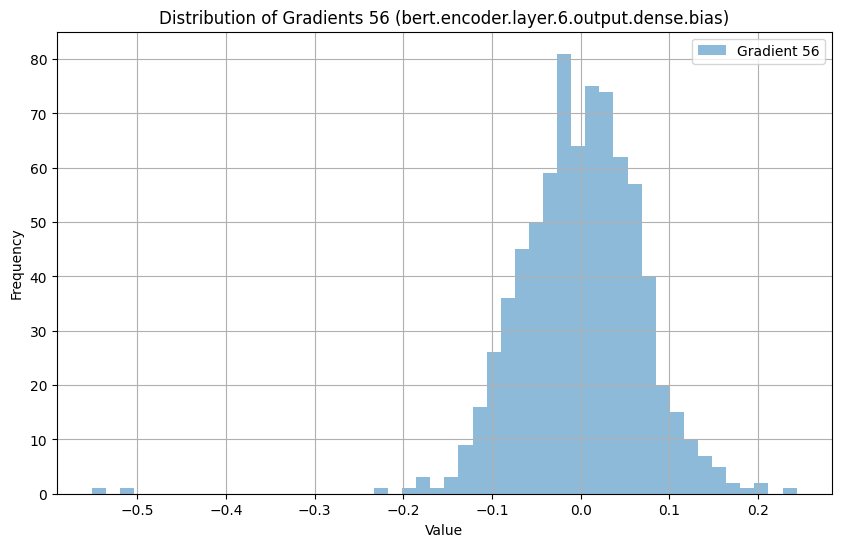

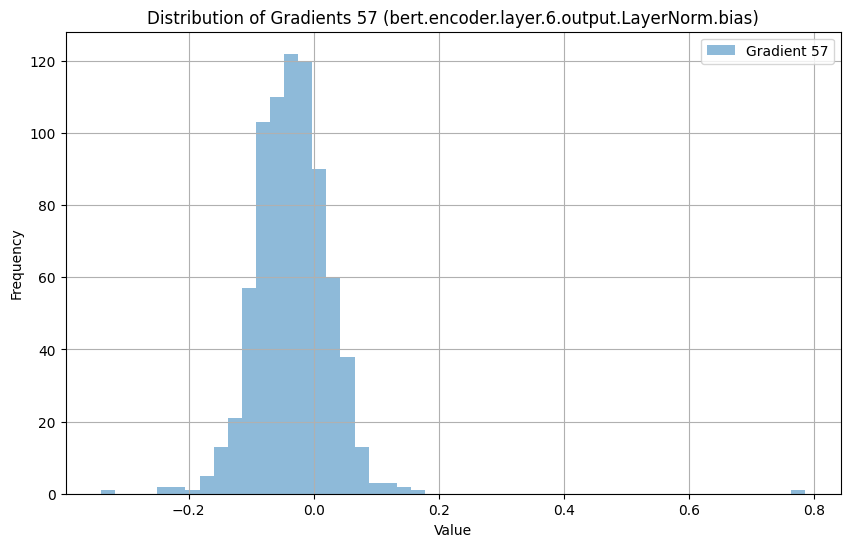

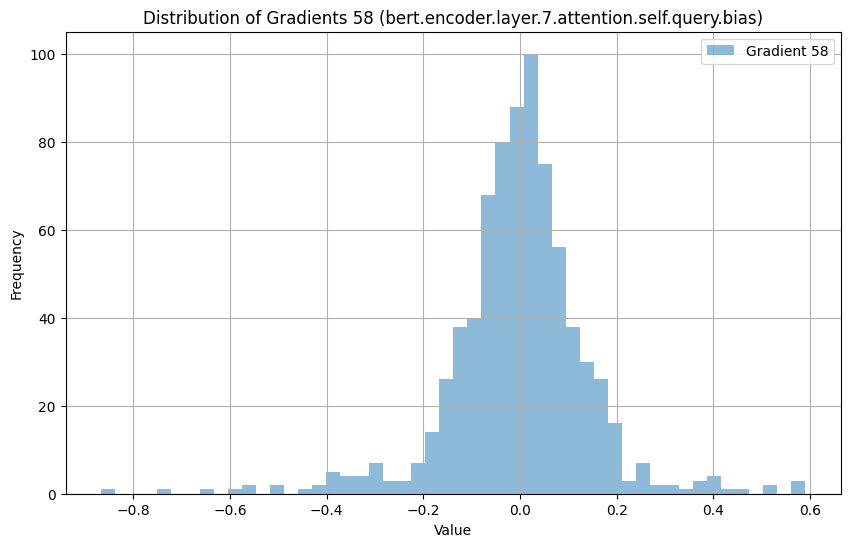

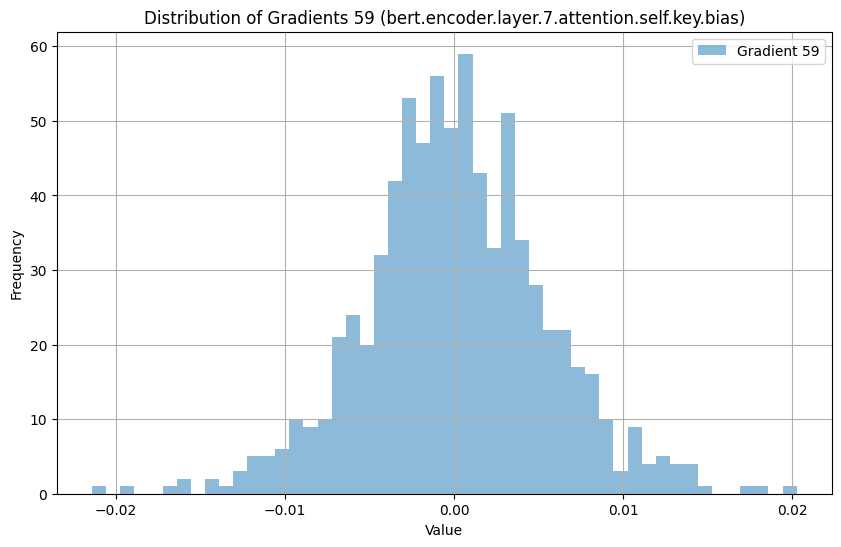

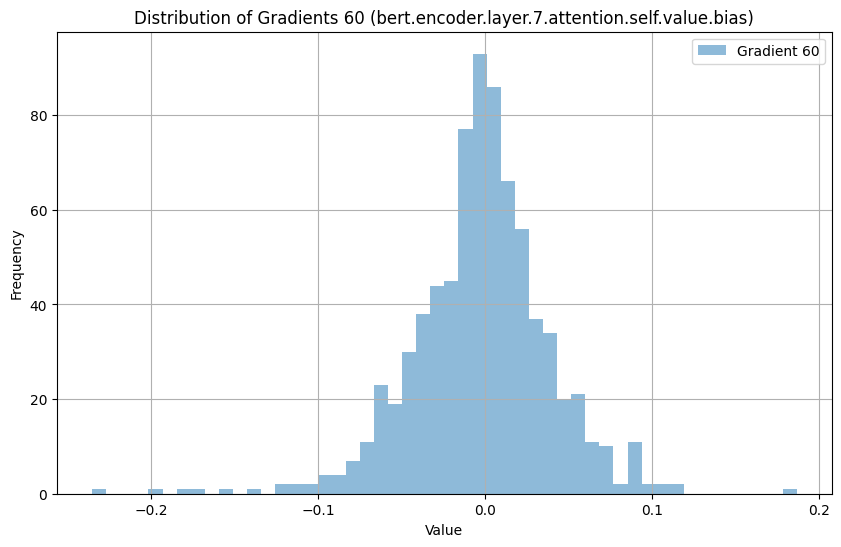

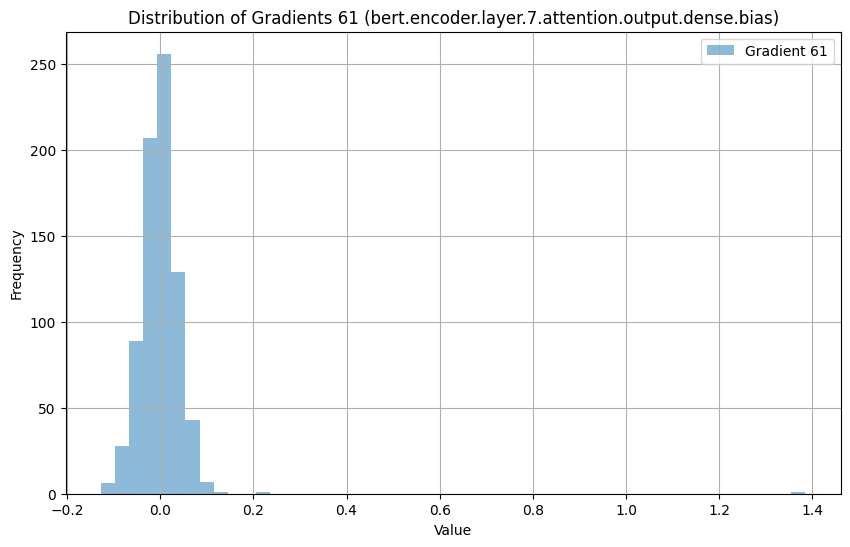

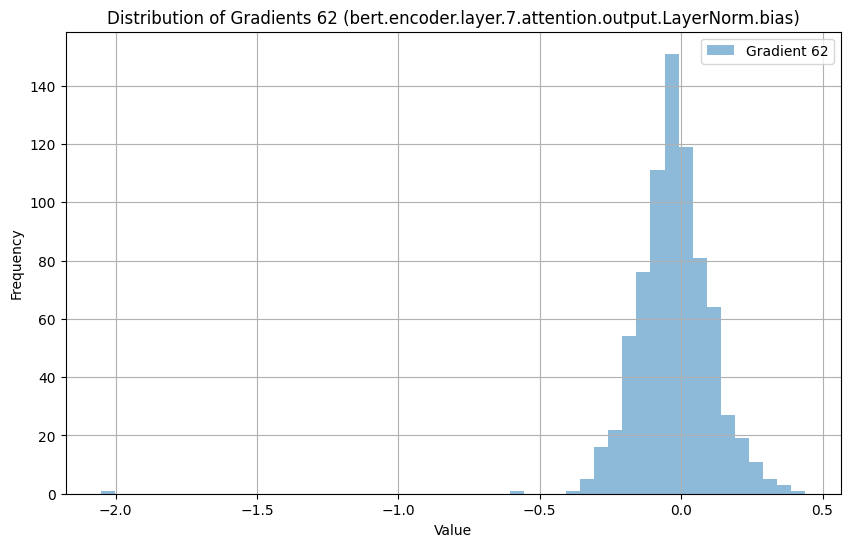

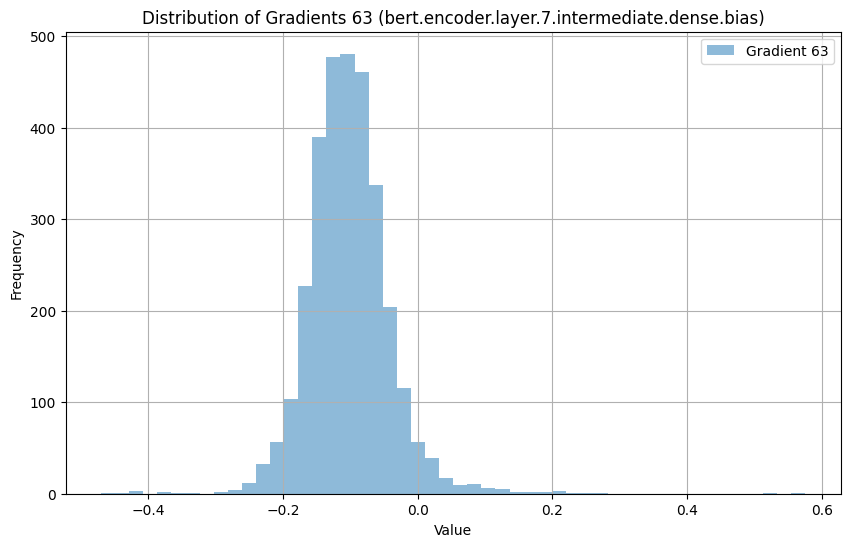

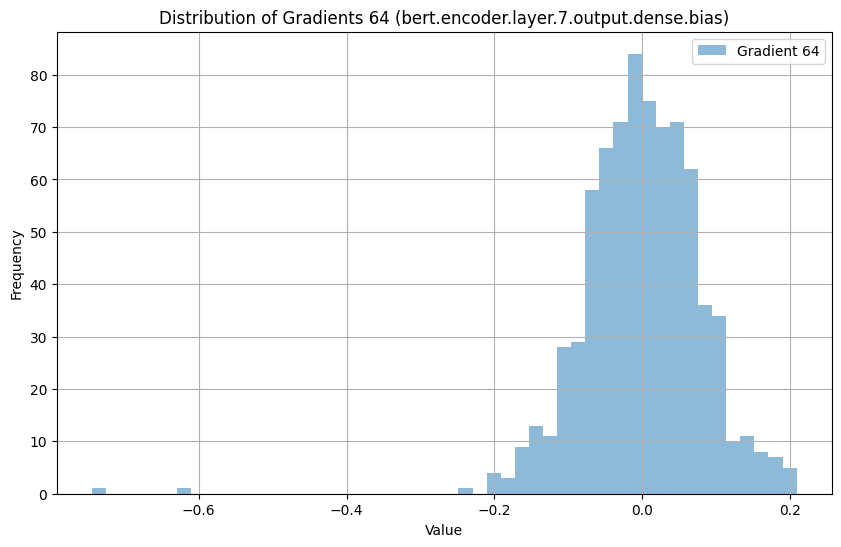

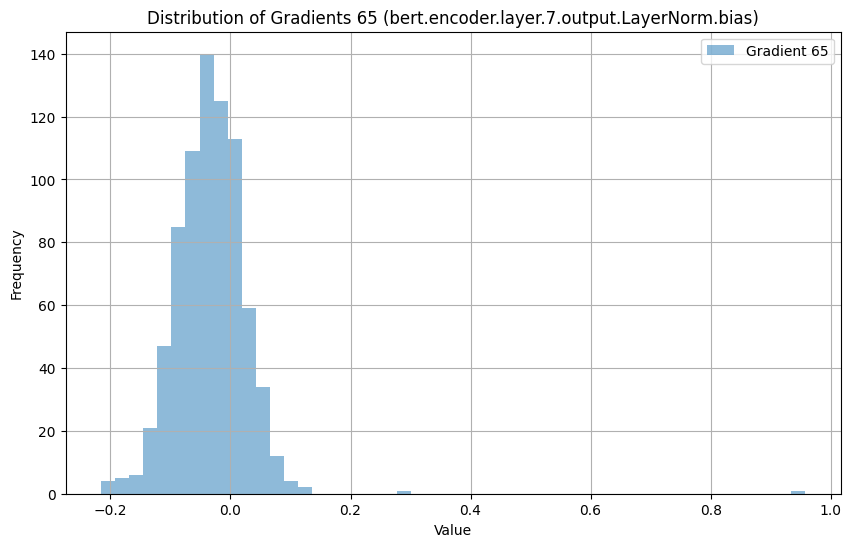

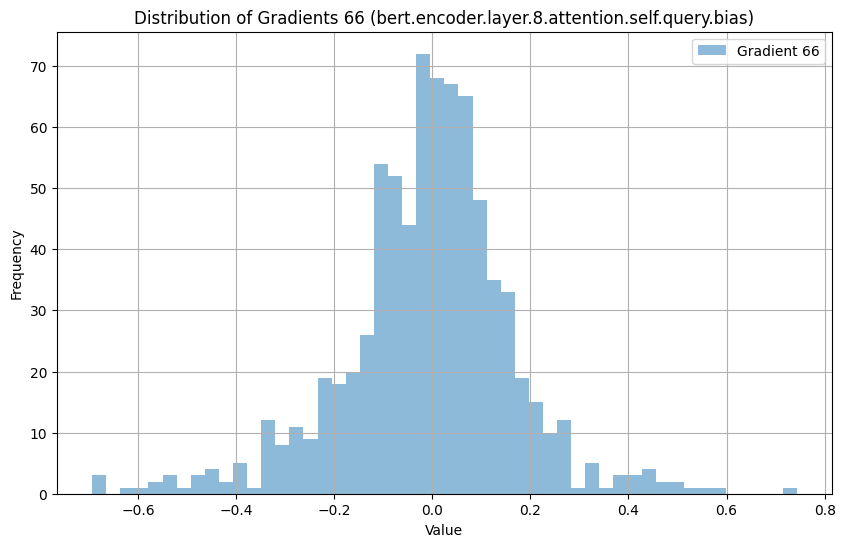

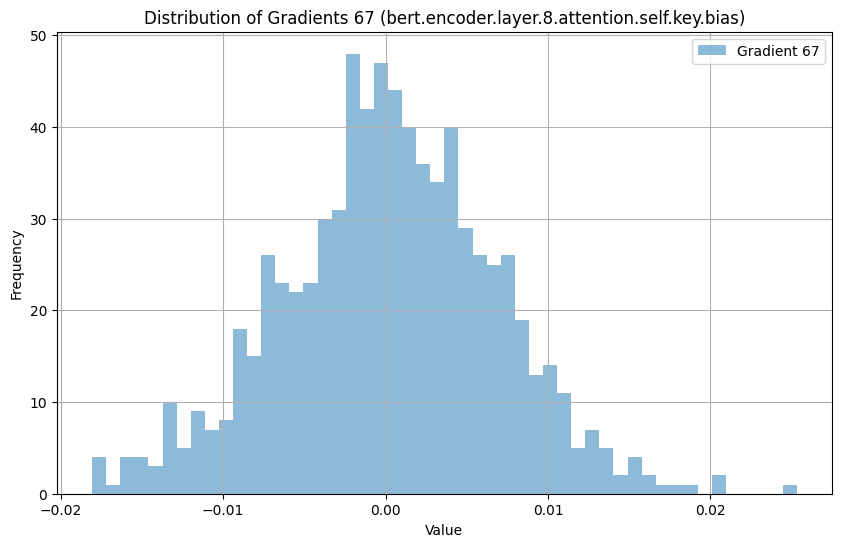

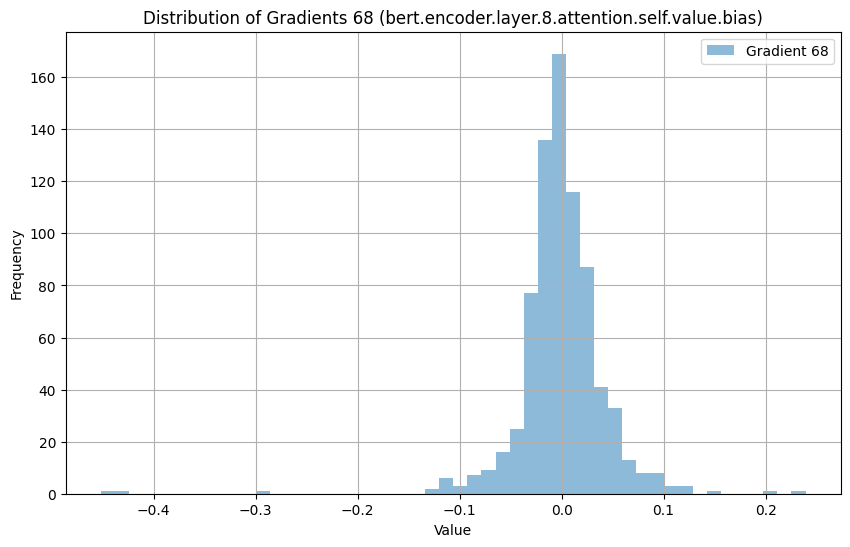

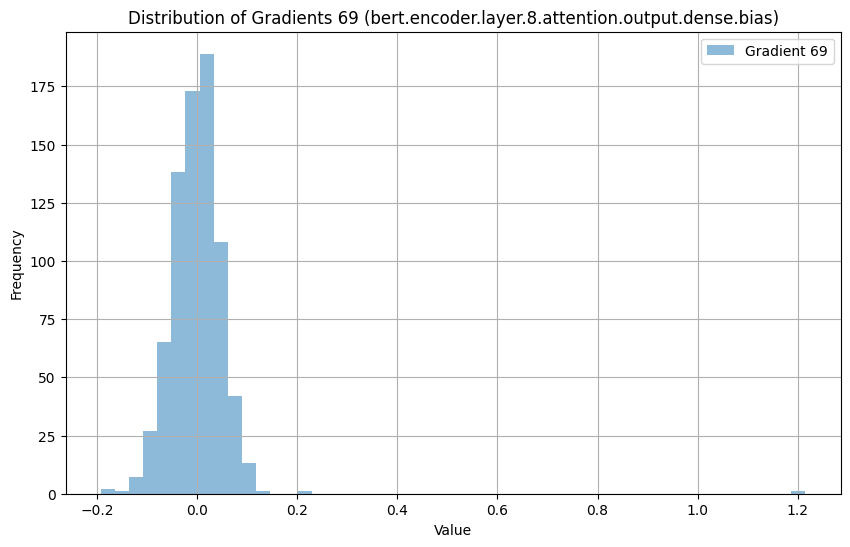

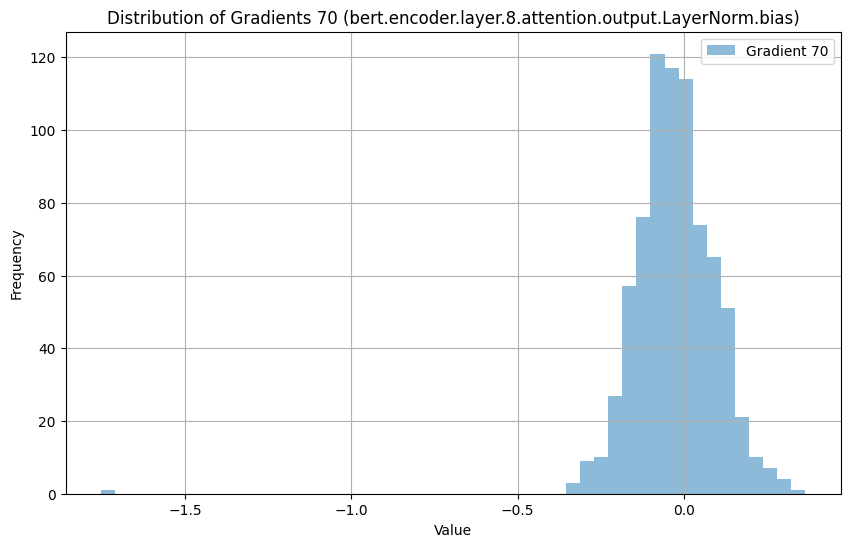

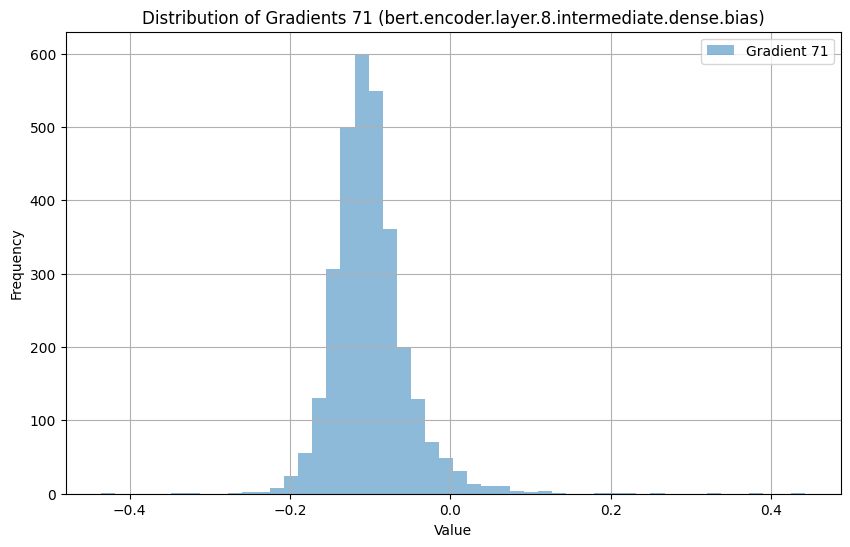

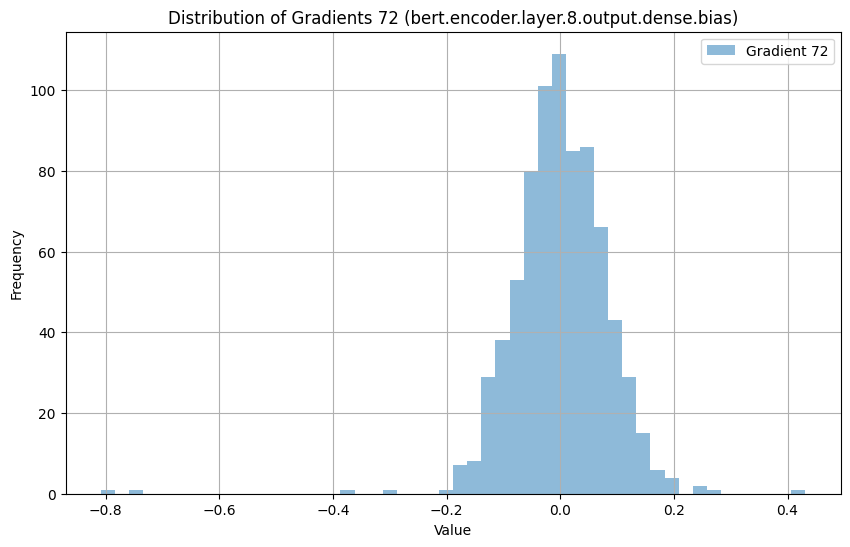

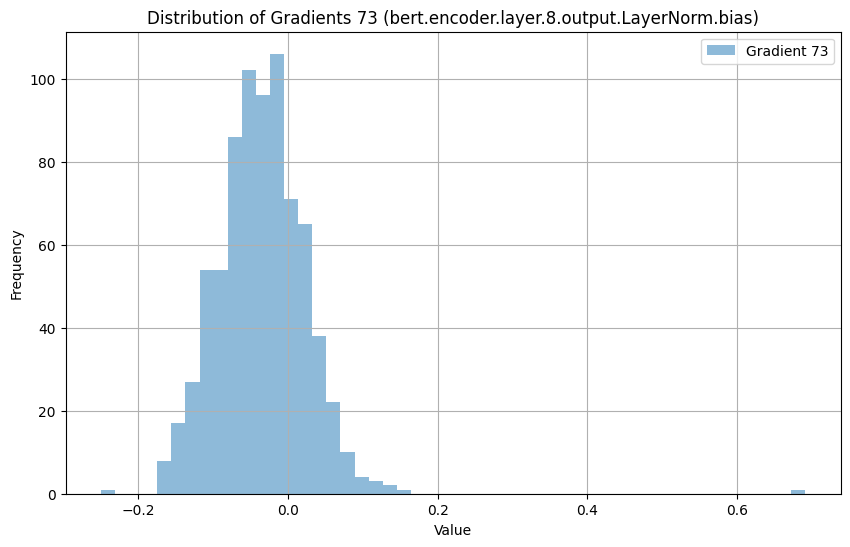

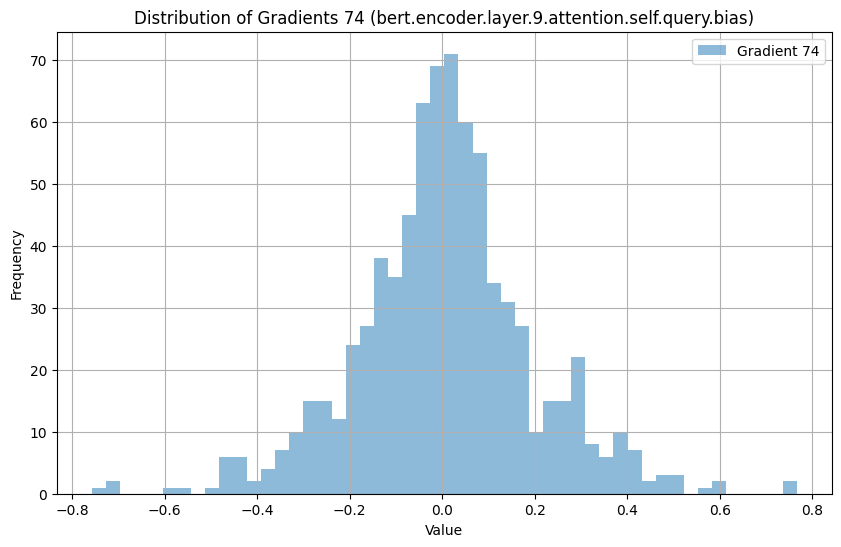

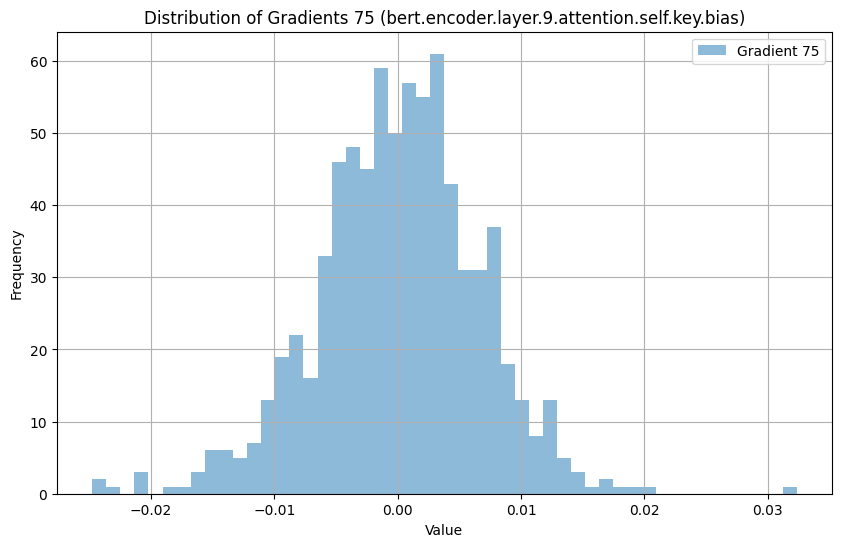

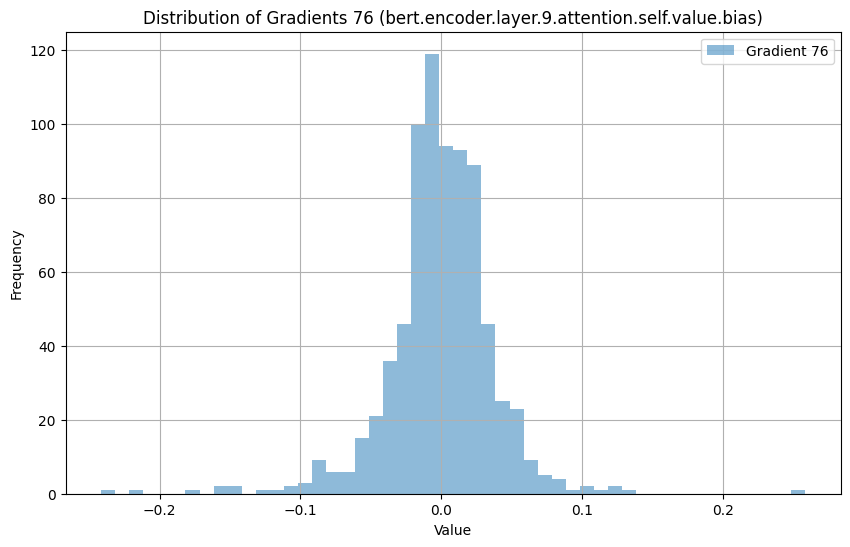

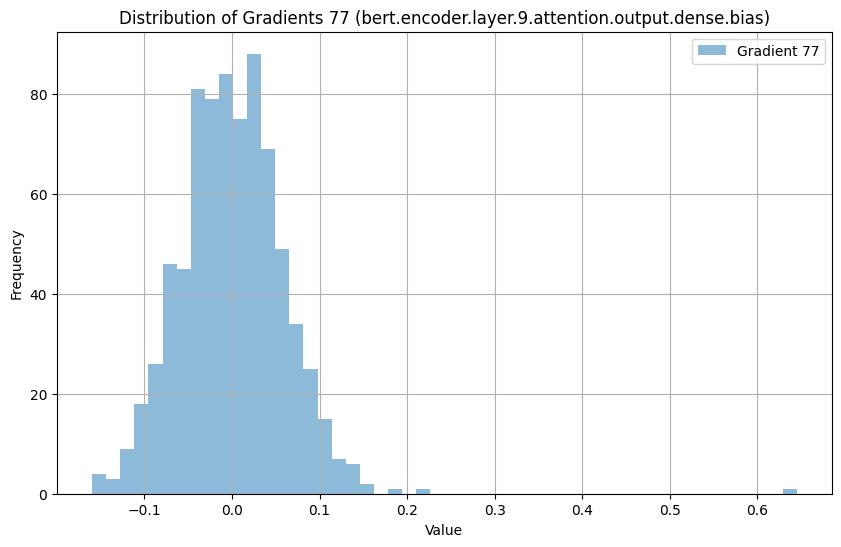

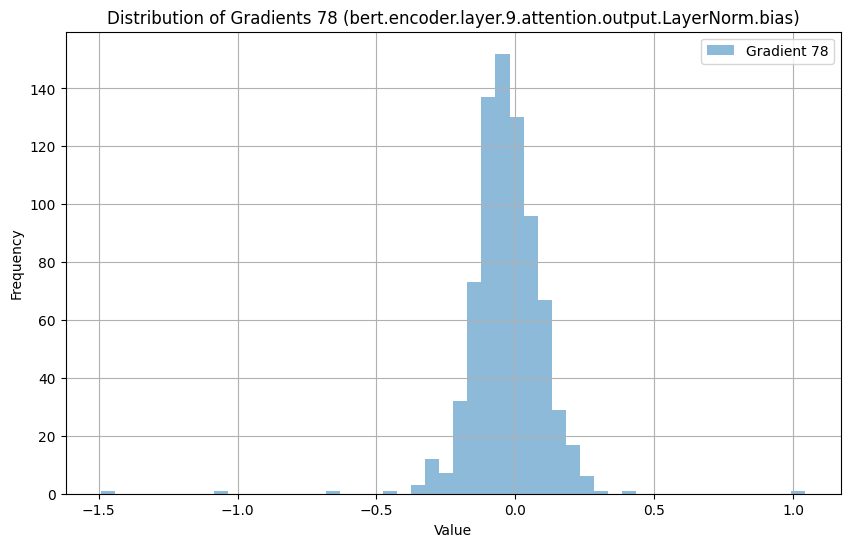

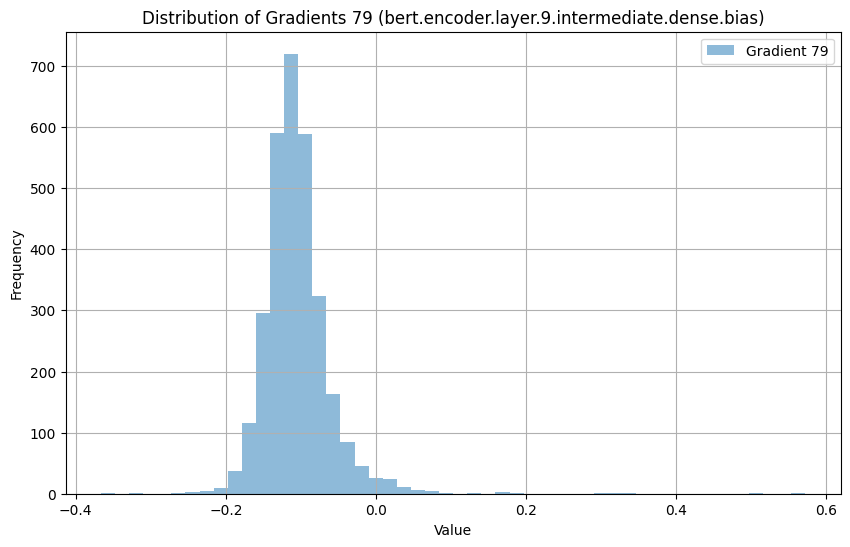

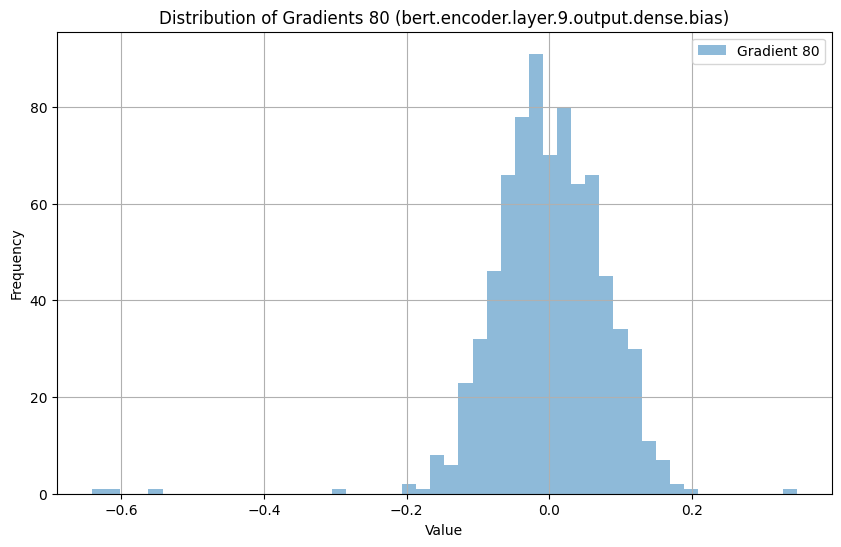

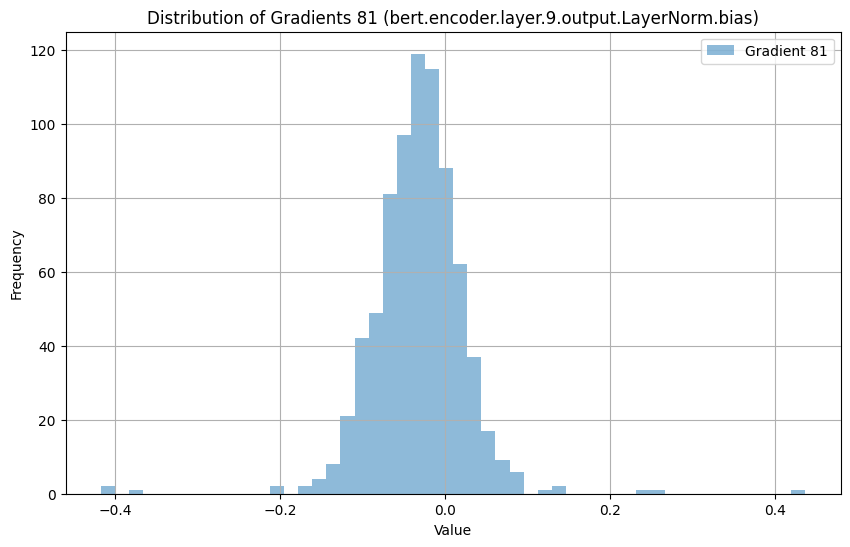

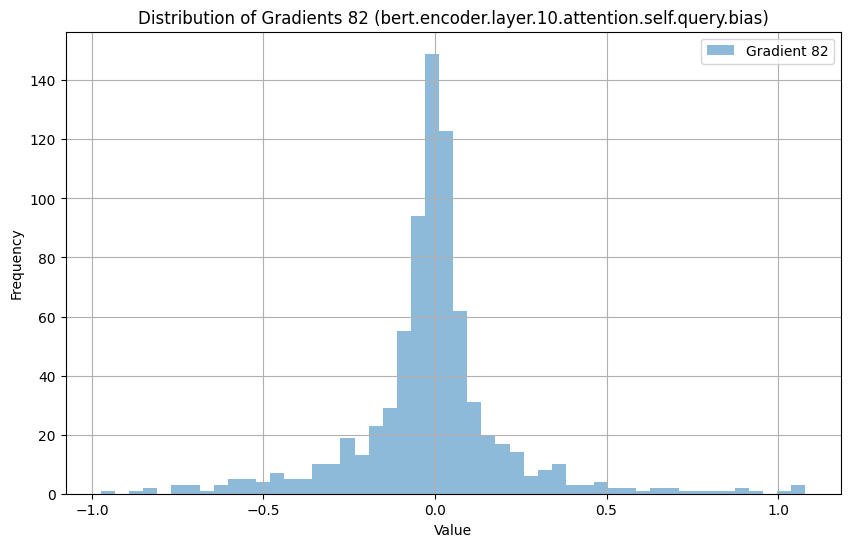

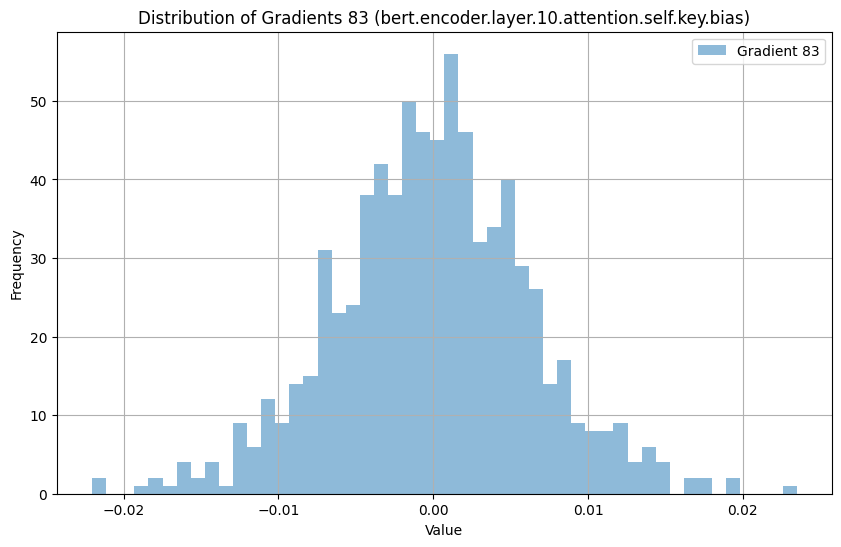

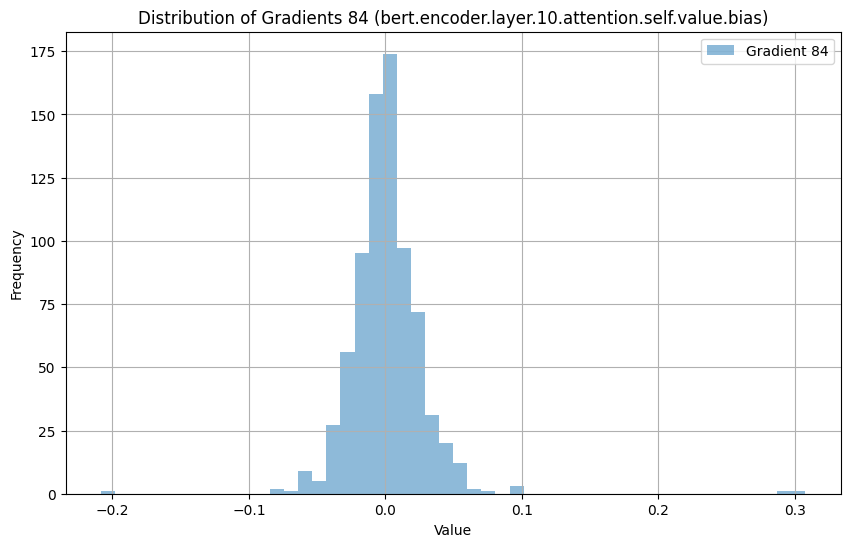

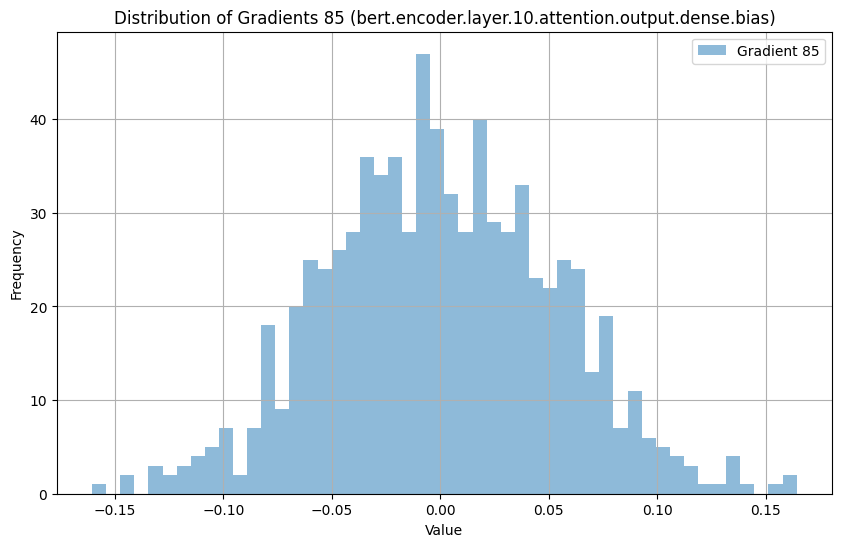

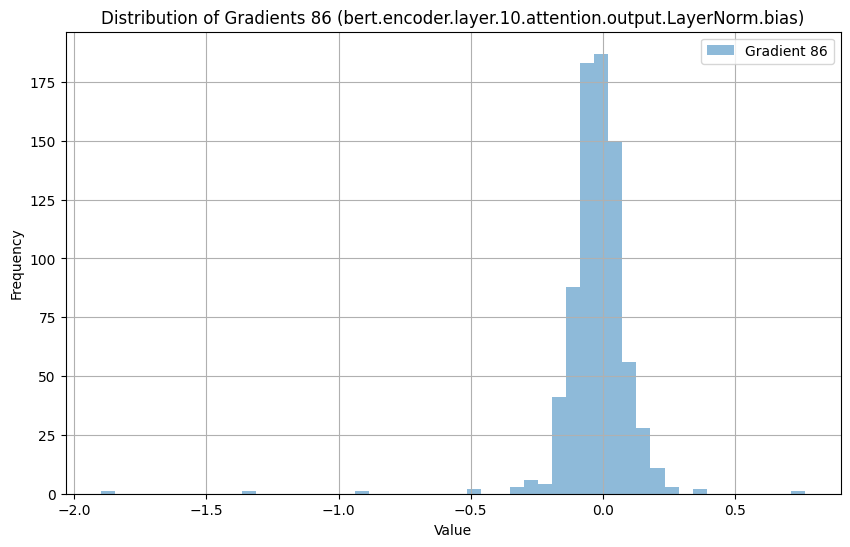

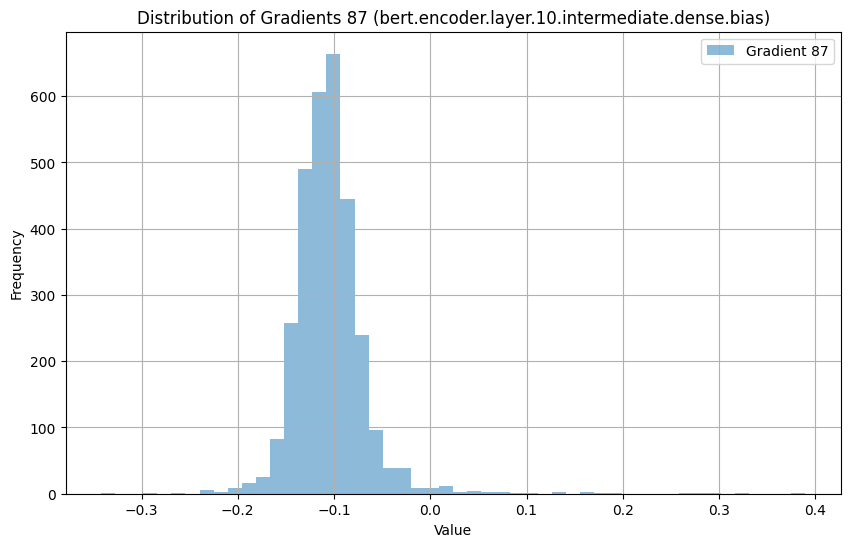

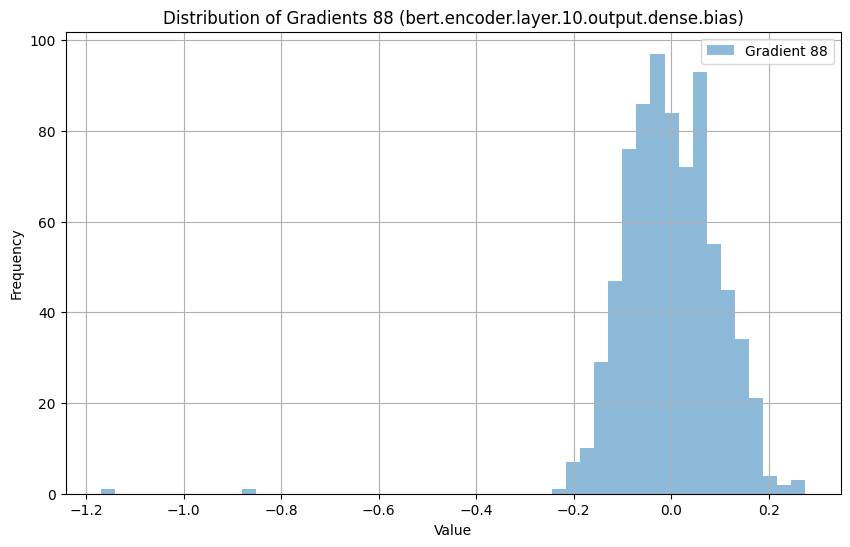

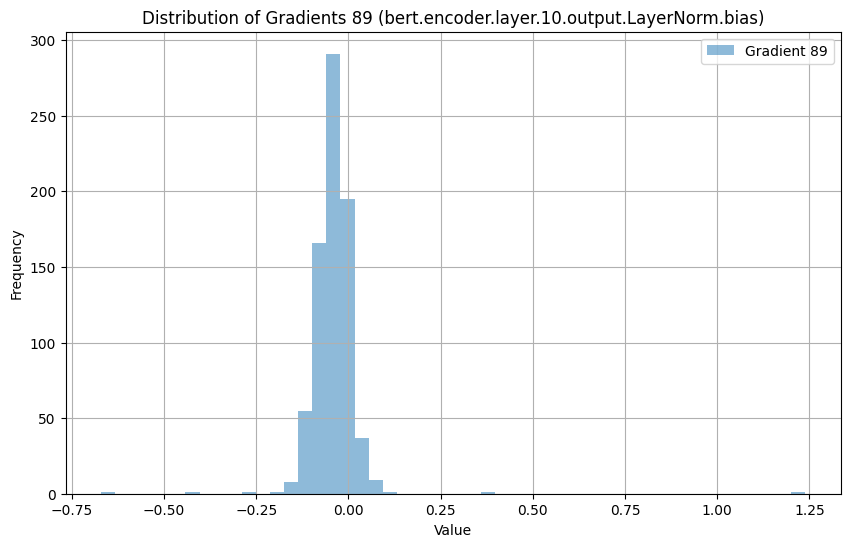

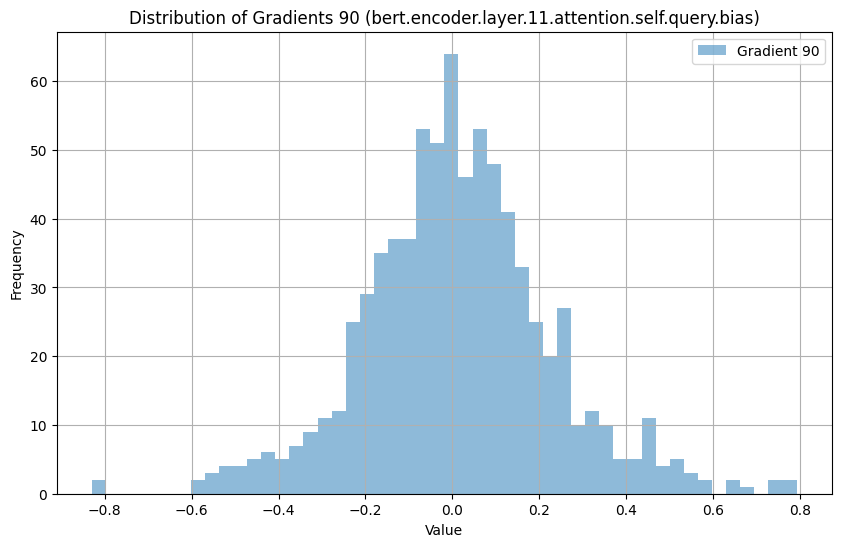

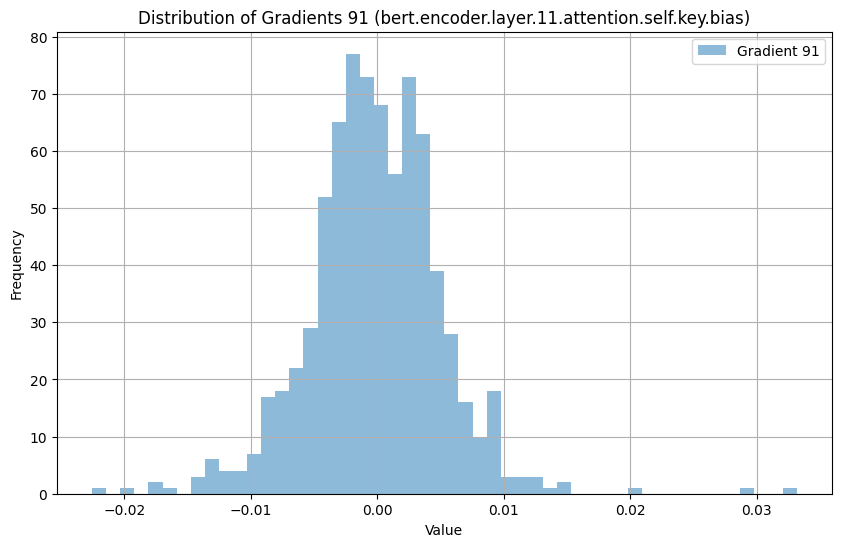

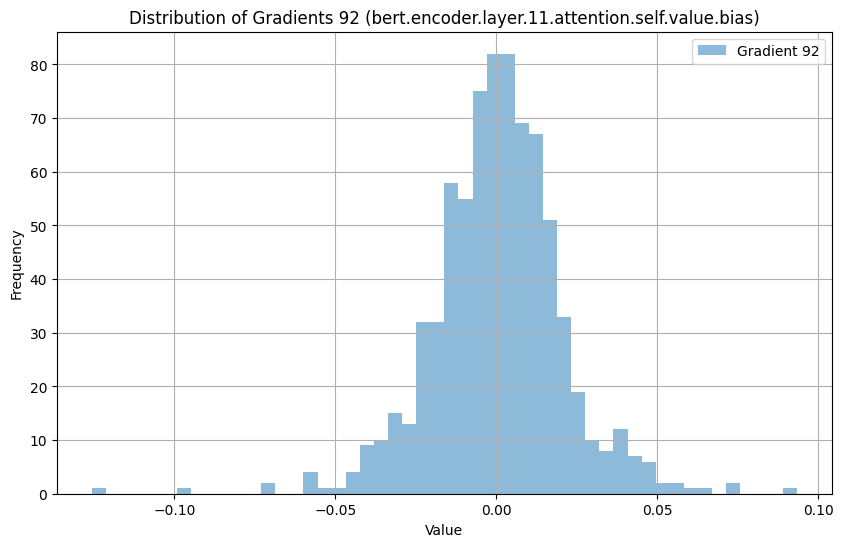

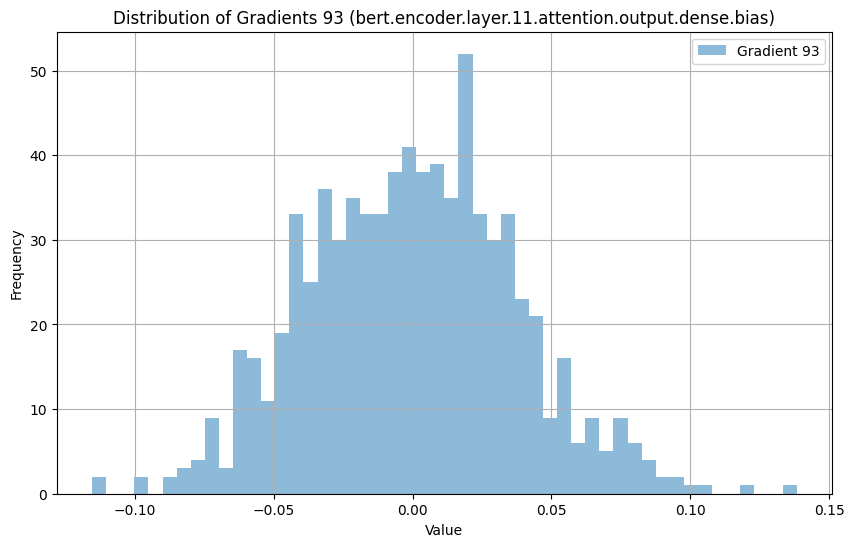

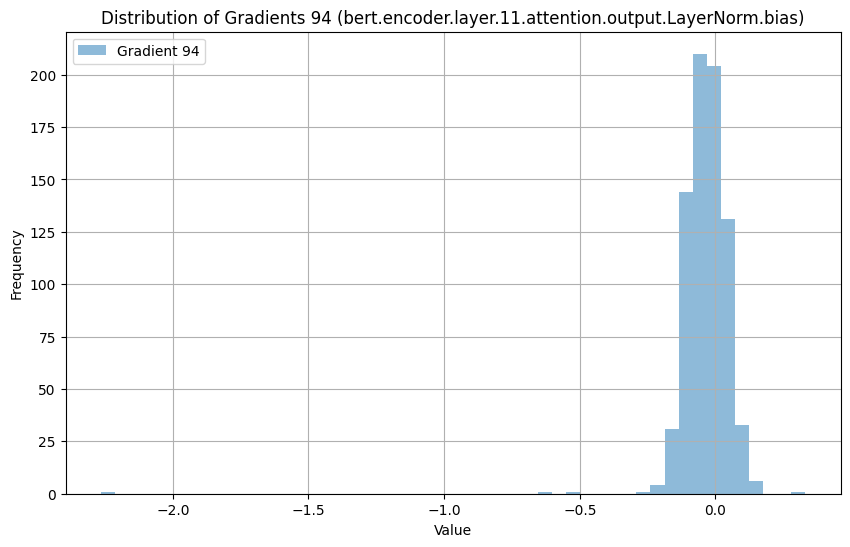

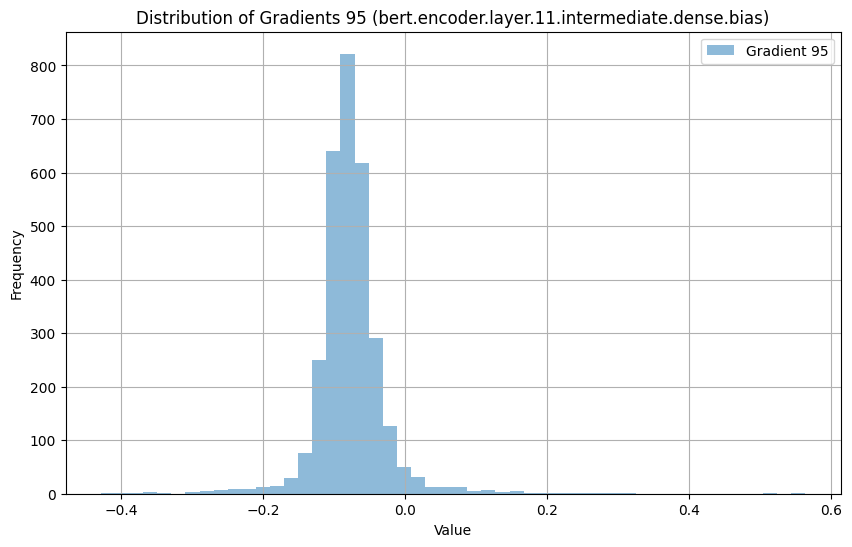

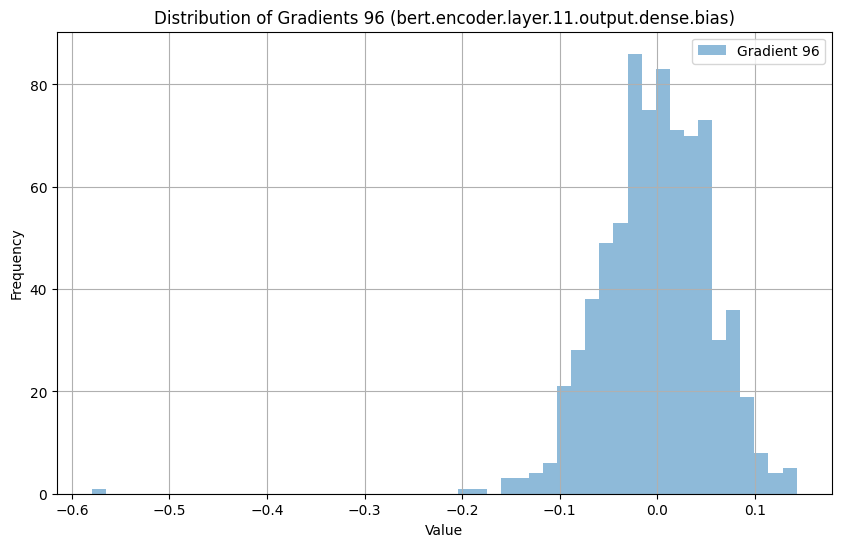

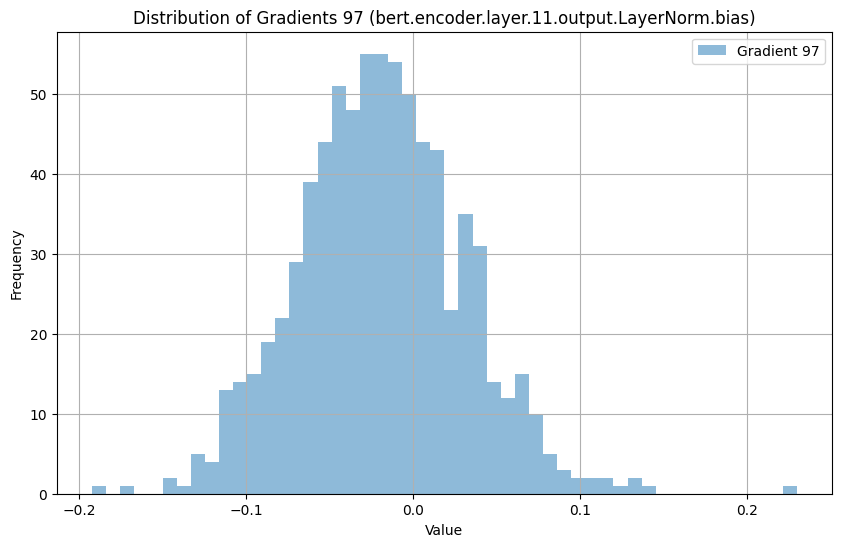

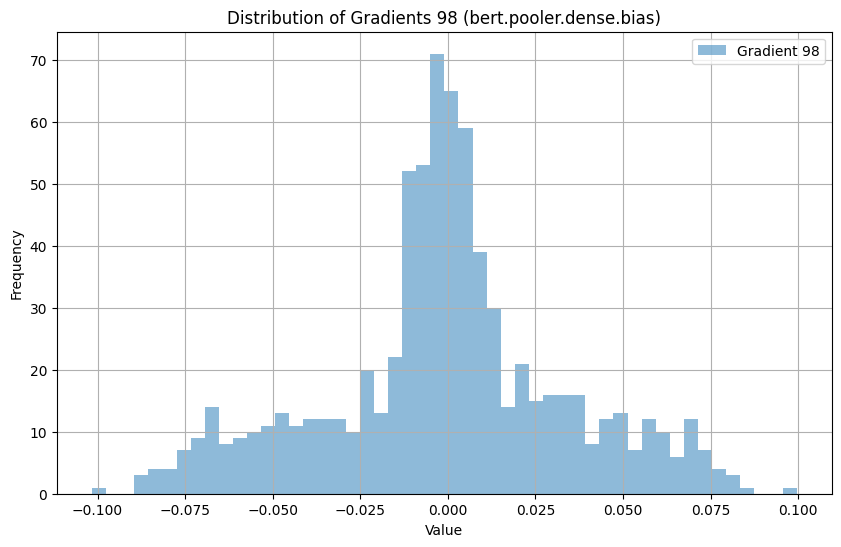

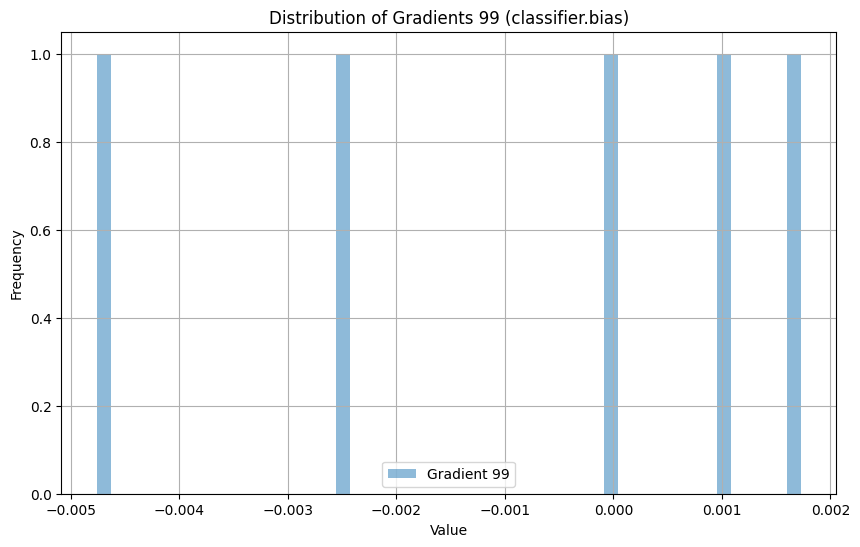

In [13]:
import matplotlib.pyplot as plt

# Function to plot histogram of weights or gradients
def plot_histogram(data, title, label):
    plt.figure(figsize=(10, 6))
    plt.hist(data.flatten(), bins=50, alpha=0.5, label=label)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Extract weights and gradients for visualization
weights = []
gradients = []

for key, value in model.items():
    if 'weight' in key:
        weights.append((key, value.cpu().detach().numpy()))
    elif 'bias' in key:
        gradients.append((key, value.cpu().detach().numpy()))

# Plot histograms for weights
for i, (key, weight) in enumerate(weights):
    plot_histogram(weight, f'Distribution of Weights {i+1} ({key})', f'Weight {i+1}')

# Plot histograms for gradients
for i, (key, gradient) in enumerate(gradients):
    plot_histogram(gradient, f'Distribution of Gradients {i+1} ({key})', f'Gradient {i+1}')


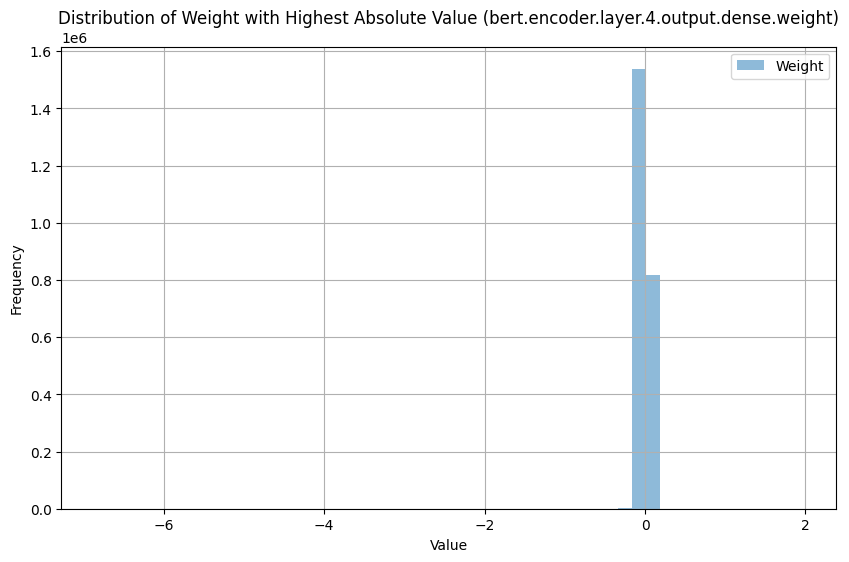

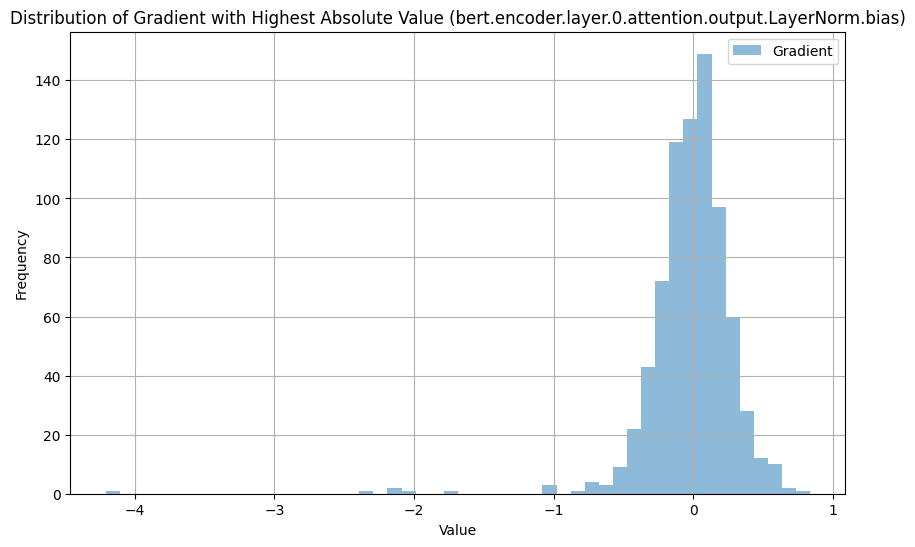

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot histogram of weights or gradients
def plot_histogram(data, title, label):
    plt.figure(figsize=(10, 6))
    plt.hist(data.flatten(), bins=50, alpha=0.5, label=label)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Extract weights and gradients for visualization
weights = []
gradients = []

for key, value in model.items():
    if 'weight' in key:
        weights.append((key, value.cpu().detach().numpy()))
    elif 'bias' in key:
        gradients.append((key, value.cpu().detach().numpy()))

# Function to find the weight or gradient with the highest absolute value
def find_max_abs_value(data_list):
    max_value = -np.inf
    max_key = None
    max_data = None
    for key, data in data_list:
        abs_max = np.max(np.abs(data))
        if abs_max > max_value:
            max_value = abs_max
            max_key = key
            max_data = data
    return max_key, max_data

# Find the weight with the highest absolute value
max_weight_key, max_weight = find_max_abs_value(weights)

# Find the gradient with the highest absolute value
max_gradient_key, max_gradient = find_max_abs_value(gradients)

# Plot the histogram for the weight with the highest absolute value
plot_histogram(max_weight, f'Distribution of Weight with Highest Absolute Value ({max_weight_key})', 'Weight')

# Plot the histogram for the gradient with the highest absolute value
plot_histogram(max_gradient, f'Distribution of Gradient with Highest Absolute Value ({max_gradient_key})', 'Gradient')
